**CSE3020 DATA VISUALIZATION**

**FACULTY - DR. PATTABIRAMAN V.**

**J - COMPONENT**

**NAME - PRATYUSH PANDA**

**REG NO - 19BCE1406**

**TELECOM CHURNING**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
import plotly.express as px
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2
from sklearn.feature_selection import VarianceThreshold

In [2]:
churn = pd.read_csv("churn.csv", na_values=['','?','??'])
churn

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    WI             114        415                 No             Yes   
3329    AL             106        408                 No             Yes   
3330    VT              60        415                 No              No   
3331    WV             159        415                 No              No   
3332    CT             184        510                Yes              No   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     26              137.1               88   
3329                     29               83.6              131   
3330                      0              193.9              118   
3331                      0              169.8              114   
3332                      0              213.8              105   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             23.31              155.7              125             13.23   
3329             14.21              203.9              131             17.33   
3330             32.96               85.0              110              7.23   
3331             28.87              197.7              105             16.80   
3332             36.35              159.6               84             13.57   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                247.6                 94               11.14   
3329                229.5                 73               10.33   
3330                210.1                134                9.45   
3331                193.7                 82                8.72   
3332                139.2                137                6.26   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                11.5                 7            

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

The datatypes present in the data set are - object, int64, float64 and bool.

In [4]:
churn.shape

(3333, 20)

There are 3333 rows and 20 columns.

In [5]:
churn.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

No null values are present in any column. 

In [6]:
churn.describe(include=[float,int])

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [7]:
churn.describe(include=[object])

State International plan Voice mail plan
count   3333               3333            3333
unique    51                  2               2
top       WV                 No              No
freq     106               3010            2411

The data set contains 3333 rows of data, but their are only 51 unique states data.

In [8]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()

In [9]:
le_encoder.fit(churn['International plan'].drop_duplicates())
churn['International plan']=le_encoder.transform(churn['International plan'])
churn.head()

State  Account length  Area code  International plan Voice mail plan  \
0    KS             128        415                   0             Yes   
1    OH             107        415                   0             Yes   
2    NJ             137        415                   0              No   
3    OH              84        408                   1              No   
4    OK              75        415                   1              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

For the column 'International plan', 'No' was encoded as 0 and 'Yes was encoded as 1.

In [10]:
le_encoder.fit(churn['Voice mail plan'].drop_duplicates())
churn['Voice mail plan']=le_encoder.transform(churn['Voice mail plan'])
churn.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

For the column 'Voice mail plan', 'No' was encoded as 0 and 'Yes was encoded as 1.

In [11]:
newChurn = churn.copy()

### Data distribution plot - Histogram:

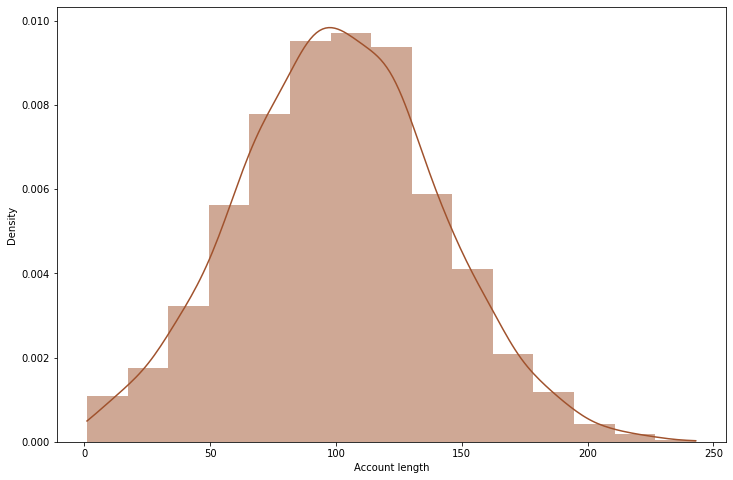

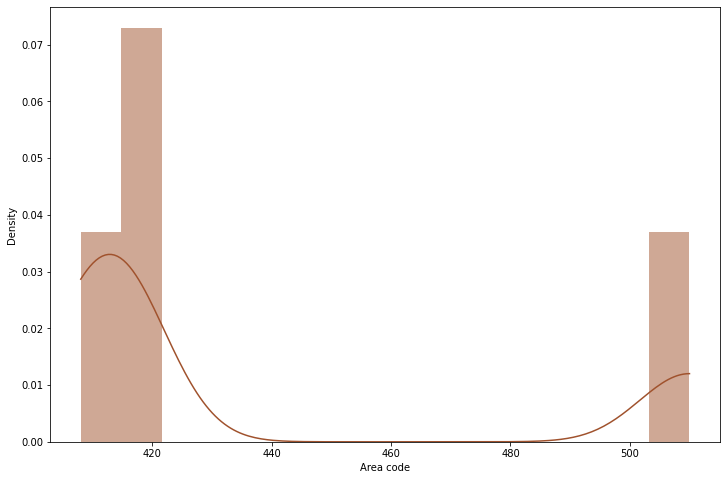

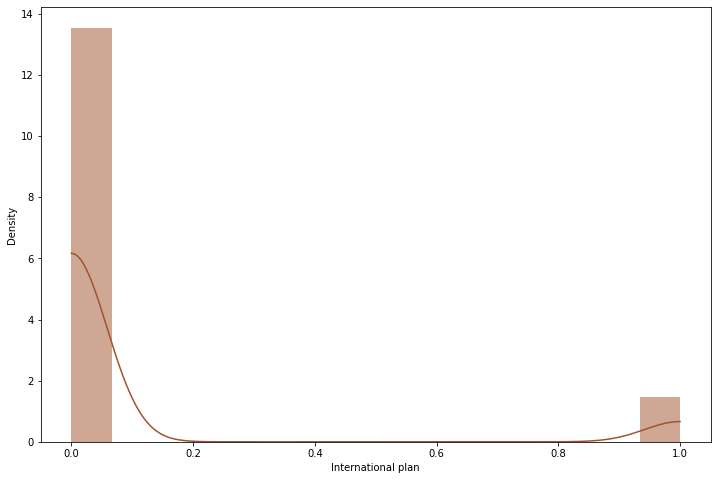

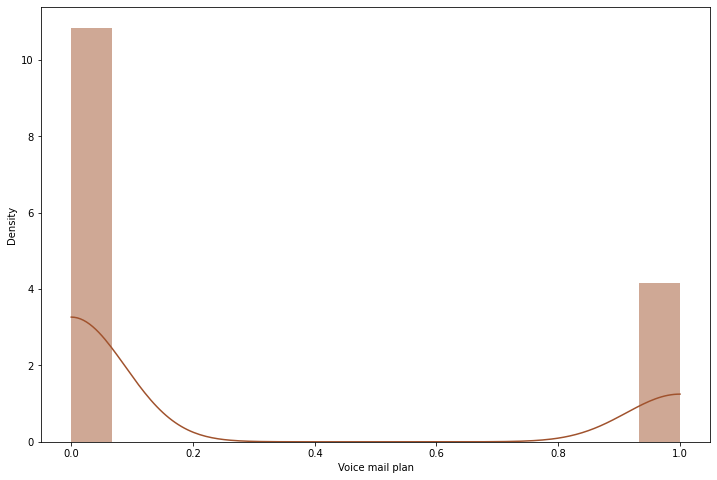

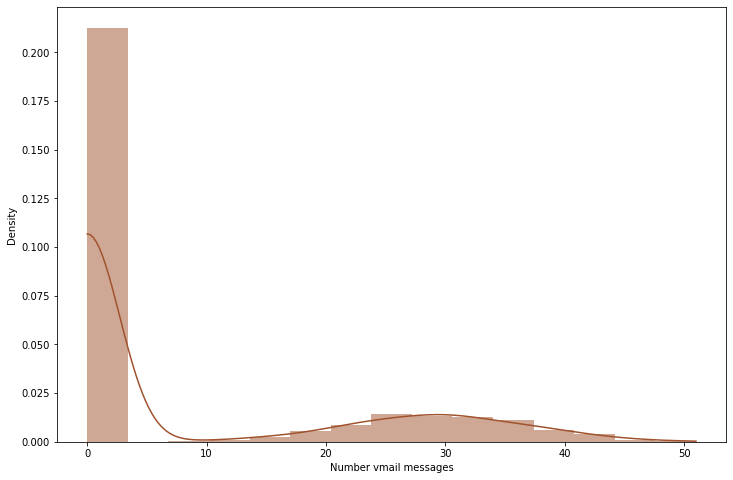

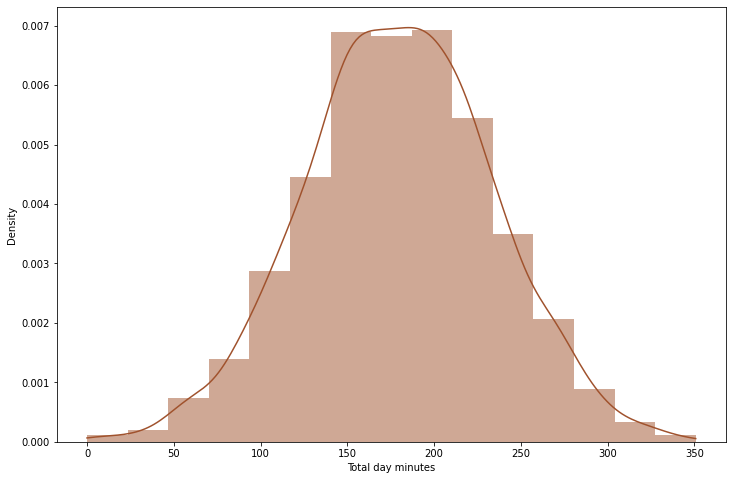

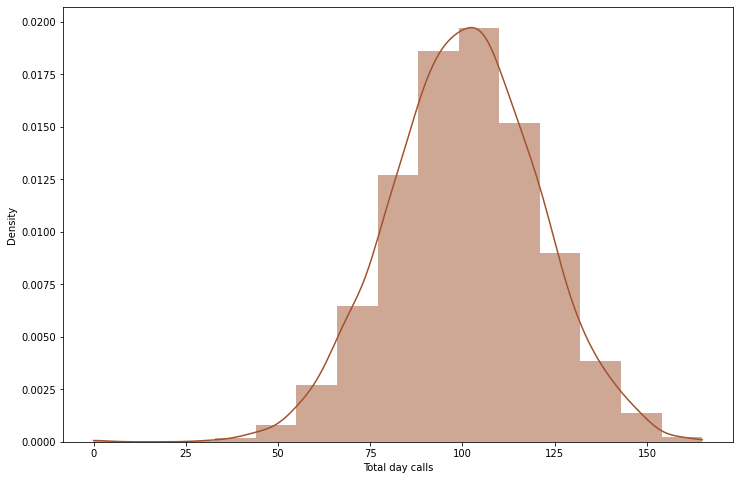

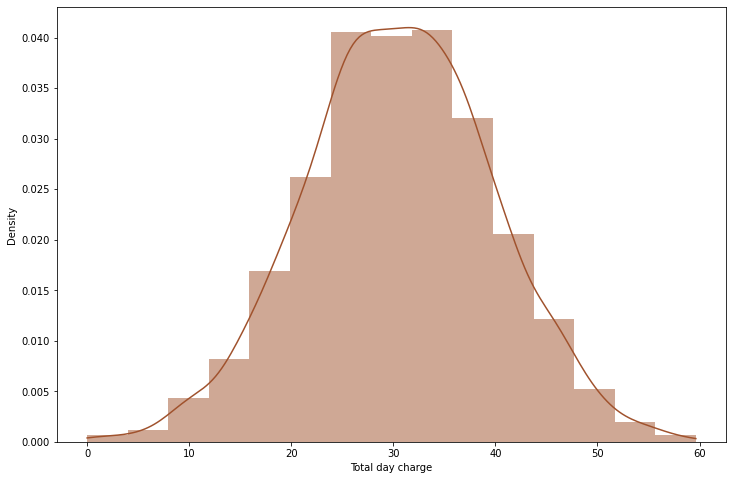

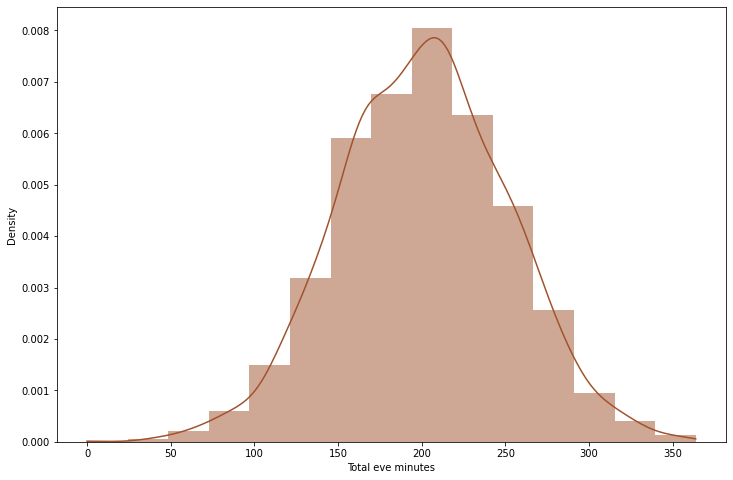

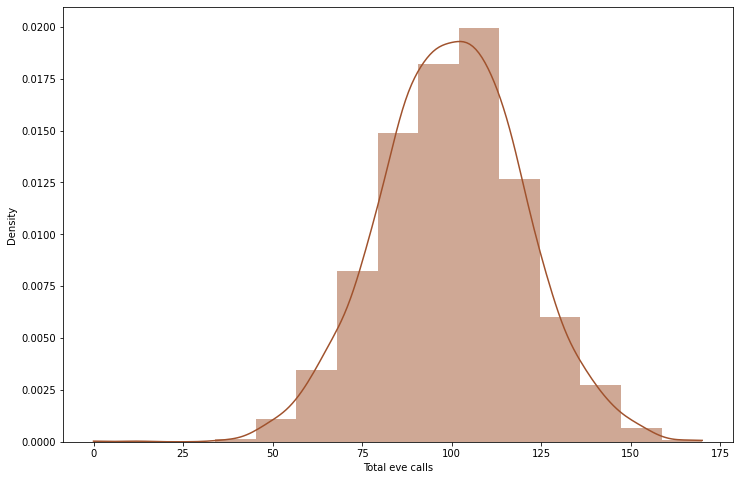

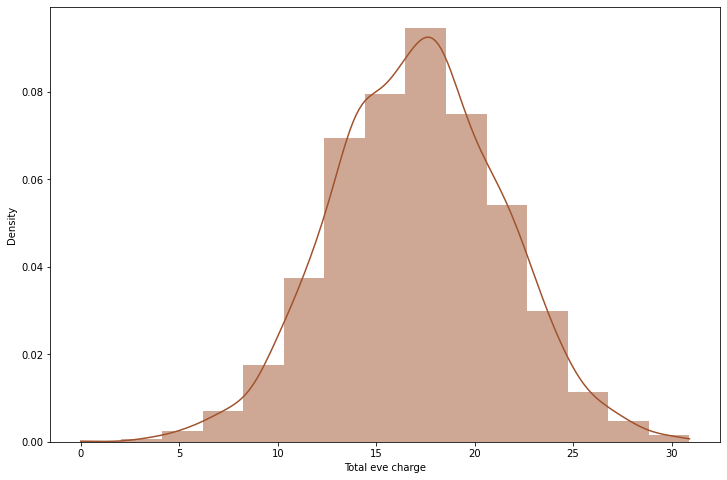

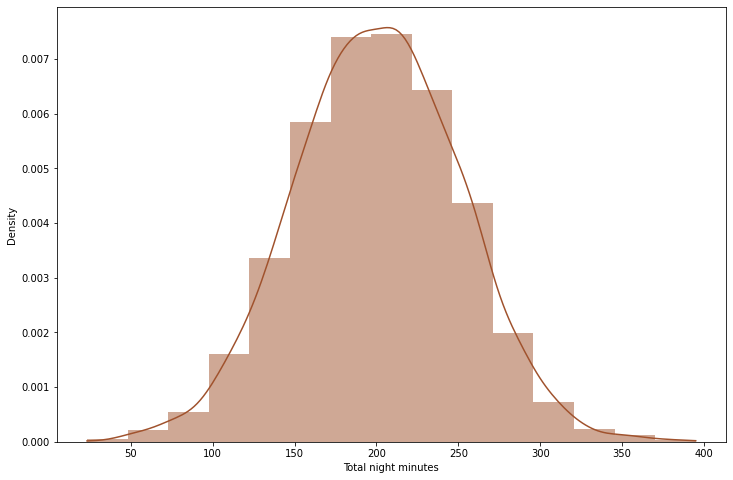

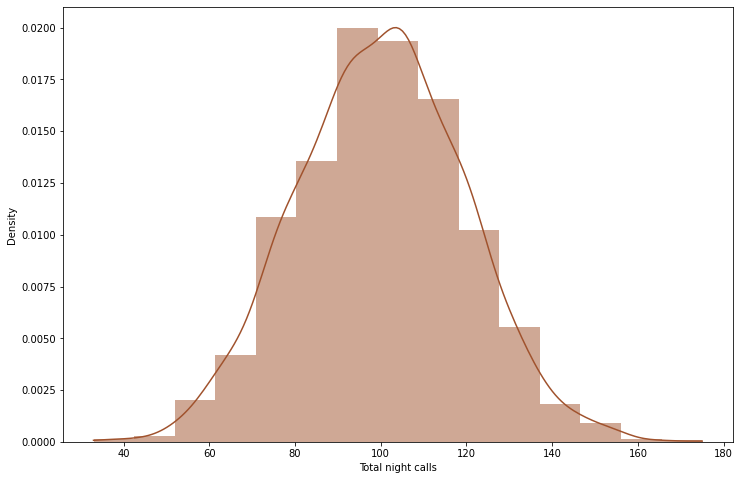

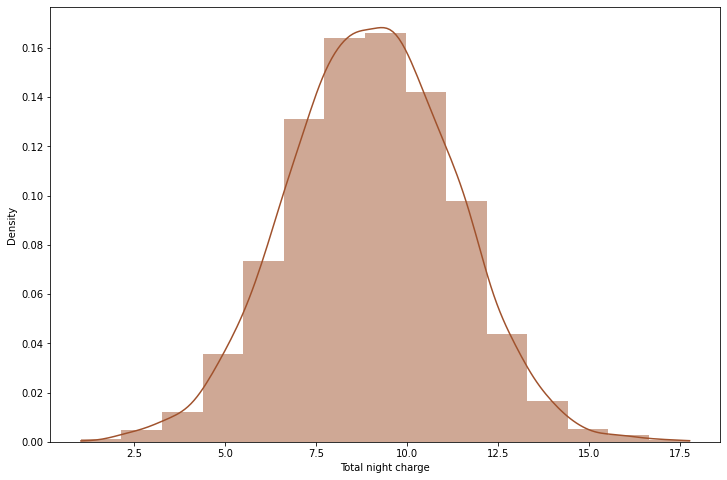

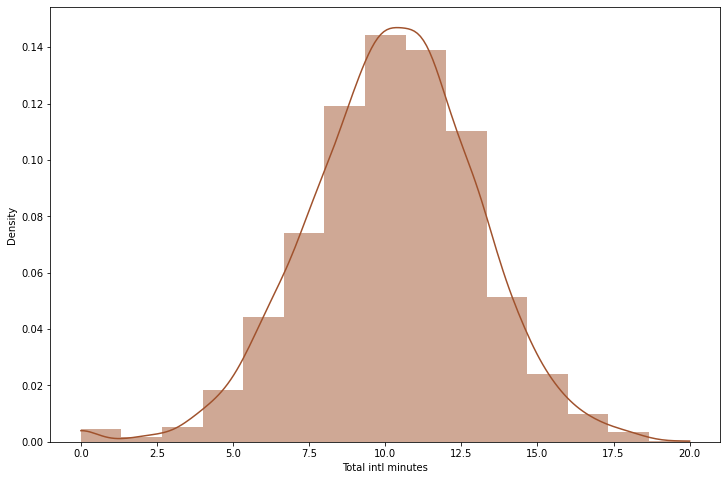

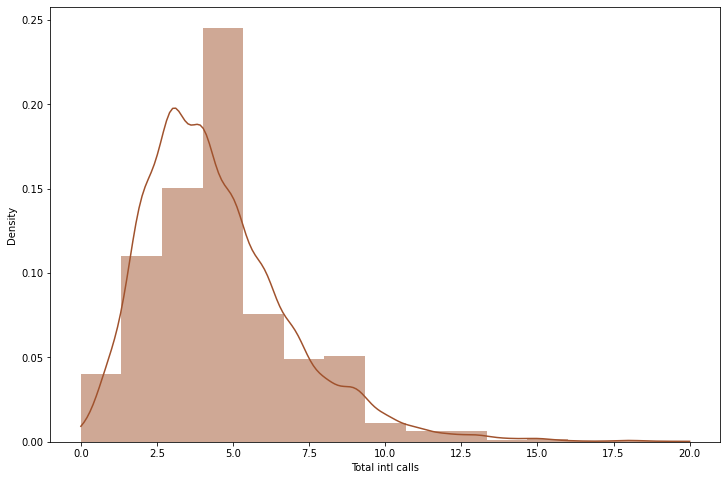

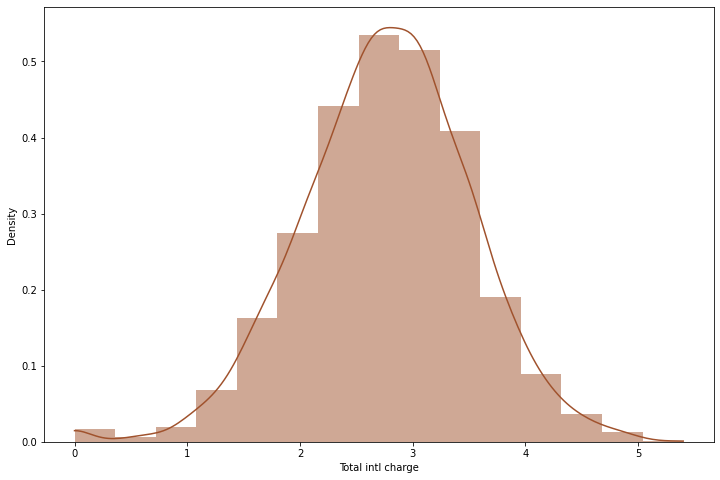

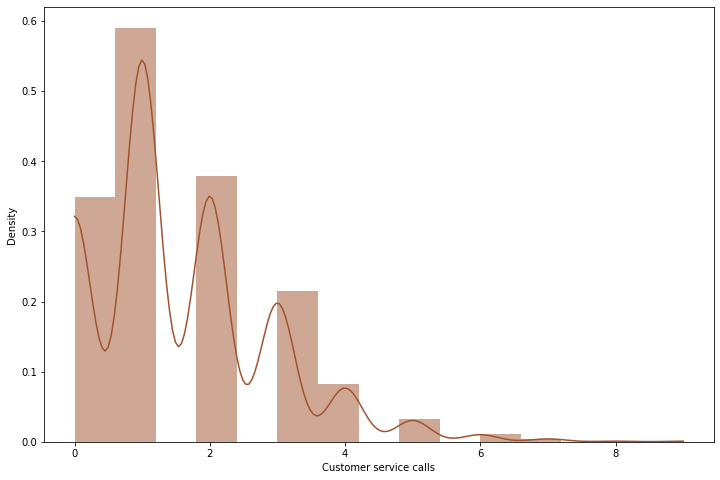

In [12]:
for col in churn.columns:
  if churn[col].dtype == np.float64 or churn[col].dtype == np.int64:
    plt.figure(figsize=(12,8))
    sns.histplot(churn[col],bins=15,color='sienna',kde=True, stat="density", linewidth=0)

### Interactive plots are not visible in the downloaded files.

### Outlier Removal - Box Plot:

Text(0.5, 1.0, 'Box Plot for Account length')

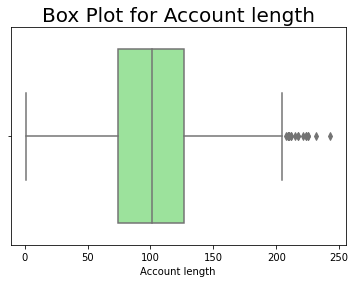

In [13]:
sns.boxplot(x=churn['Account length'],orient='h',color='lightgreen').set_title('Box Plot for Account length',fontsize=20)

In [14]:
fig = px.box(churn, y="Account length")
fig.show()

In [15]:
Q1=churn['Account length'].quantile(0.25)
Q3=churn['Account length'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

53.0


In [16]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

206.5 -5.5


In [17]:
upper_outlier = churn[churn['Account length']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
246     SD             209        415                   0                0   
338     DE             224        510                   1                0   
644     UT             243        510                   0                0   
864     VA             210        408                   0                0   
1092    CT             212        415                   0                0   
1231    MI             225        415                   0                0   
1385    WY             225        415                   0                0   
1496    ID             224        510                   0                0   
1722    SC             212        415                   0                0   
1818    NC             210        415                   0                1   
1833    DC             217        415                   0                0   
2578    SD             221        510                   0                1   
2701    TX             208        510                   0                0   
2708    WY             215        510                   0                0   
2884    TX             217        408                   0                0   
2966    NM             232        408                   0                0   
3191    SC             209        510                   0                0   
3306    NY             209        415                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
246                       0              227.2              128   
338                       0              171.5               99   
644                       0               95.5               92   
864                       0              104.6              121   
1092                      0              126.0               96   
1231                      0              165.4              106   
1385                      0              182.7              142   
1496                      0              111.4              133   
1722                      0              226.0              127   
1818                     31              313.8               87   
1833                      0              123.7              138   
2578                     24              180.5               85   
2701                      0              326.5               67   
2708                      0               83.6              148   
2884                      0              176.4              115   
2966                      0              165.6              104   
3191                      0              255.1              124   
3306                      0              153.7              105   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
246              38.62              258.4               92             21.96   
338              29.16              160.0              103             13.60   
644              16.24              163.7               63             13.91   
864              17.78              149.5               71             12.71   
1092             21.42              144.3               80             12.27   
1231             28.12              273.7              109             23.26   
1385             31.06              246.5               63             20.95   
1496             18.94              175.0               66             14.88   
1722             38.42              304.6               83             25.89   
1818             53.35              147.7              103             12.55   
1833             21.03              248.5              105             21.12   
2578             30.69              224.1               92             19.05   
2701             55.51              176.3              113             14.99   
2708             14.21              120.9               91             10.28   
2884             29.99              158.8       

In [18]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 18


In [19]:
lower_outlier = churn[churn['Account length']<lower_limit]
lower_outlier

Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []

In [20]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 0


In [21]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 18


Text(0.5, 1.0, 'Box Plot for Area code')

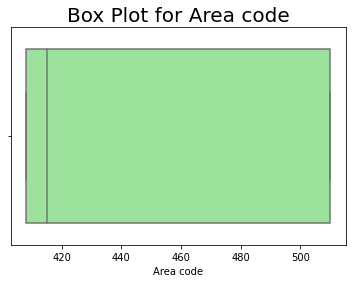

In [22]:
sns.boxplot(x=churn['Area code'],orient='h',color='lightgreen').set_title('Box Plot for Area code',fontsize=20)

In [23]:
fig = px.box(churn, y="Area code")
fig.show()

In [24]:
Q1=churn['Area code'].quantile(0.25)
Q3=churn['Area code'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

102.0


In [25]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

663.0 255.0


In [26]:
upper_outlier = churn[churn['Area code']>upper_limit]
upper_outlier

Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []

In [27]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 0


In [28]:
lower_outlier = churn[churn['Area code']<lower_limit]
lower_outlier

Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []

In [29]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 0


In [30]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 0


Text(0.5, 1.0, 'Box Plot for Number vmail messages')

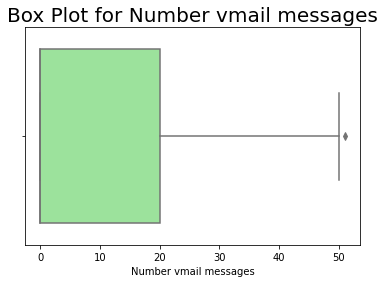

In [31]:
sns.boxplot(x=churn['Number vmail messages'],orient='h',color='lightgreen').set_title('Box Plot for Number vmail messages',fontsize=20)

In [32]:
fig = px.box(churn, y="Number vmail messages")
fig.show()

In [33]:
Q1=churn['Number vmail messages'].quantile(0.25)
Q3=churn['Number vmail messages'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

20.0


In [34]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

50.0 -30.0


In [35]:
upper_outlier = churn[churn['Number vmail messages']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
2843    FL             144        415                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
2843                     51              283.9               98   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
2843             48.26              192.0              109             16.32   

      Total night minutes  Total night calls  Total night charge  \
2843                196.3                 85                8.83   

      Total intl minutes  Total intl calls  Total intl charge  \
2843                10.0                 4                2.7   

      Customer service calls  Churn  
2843                       1  False

In [36]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 1


In [37]:
lower_outlier = churn[churn['Number vmail messages']<lower_limit]
lower_outlier

Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []

In [38]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 0


In [39]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 1


In [40]:
churn['Number vmail messages']=np.where(
    churn['Number vmail messages']>upper_limit,
    upper_limit,
    np.where(
        churn['Number vmail messages']<lower_limit,
        lower_limit,
        churn['Number vmail messages']
    )
)

Text(0.5, 1.0, 'Box Plot for Total day minutes')

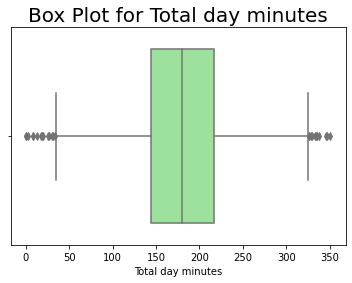

In [41]:
sns.boxplot(x=churn['Total day minutes'],orient='h',color='lightgreen').set_title('Box Plot for Total day minutes',fontsize=20)

In [42]:
fig = px.box(churn, y="Total day minutes")
fig.show()

In [43]:
Q1=churn['Total day minutes'].quantile(0.25)
Q3=churn['Total day minutes'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

72.70000000000002


In [44]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

325.45000000000005 34.64999999999996


In [45]:
upper_outlier = churn[churn['Total day minutes']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
128     OH              83        415                   0                0   
296     CO             154        415                   0                0   
485     MO             112        415                   0                0   
780     NY              64        415                   1                0   
1333    OK              82        510                   0                0   
1612    SD              93        510                   0                0   
1949    WI              89        415                   0                0   
2087    OH             115        510                   1                0   
2668    NY             161        415                   0                0   
2701    TX             208        510                   0                0   
2869    DE             129        510                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
128                     0.0              337.4              120   
296                     0.0              350.8               75   
485                     0.0              335.5               77   
780                     0.0              346.8               55   
1333                    0.0              329.8               73   
1612                    0.0              328.1              106   
1949                    0.0              326.3              112   
2087                    0.0              345.3               81   
2668                    0.0              332.9               67   
2701                    0.0              326.5               67   
2869                    0.0              334.3              118   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
128              57.36              227.4              116             19.33   
296              59.64              216.5               94             18.40   
485              57.04              212.5              109             18.06   
780              58.96              249.5               79             21.21   
1333             56.07              208.3              120             17.71   
1612             55.78              151.7               89             12.89   
1949             55.47              165.1              110             14.03   
2087             58.70              203.4              106             17.29   
2668             56.59              317.8               97             27.01   
2701             55.51              176.3              113             14.99   
2869             56.83              192.1              104             16.33   

      Total night minutes  Total night calls  Total night charge  \
128                 153.9                114                6.93   
296                 253.9                100               11.43   
485                 265.0                132               11.93   
780                 275.4                102               12.39   
1333                267.1                102               12.02   
1612                303.5                114               13.66   
1949                162.9                 97                7.33   
2087                217.5                107                9.79   
2668                160.6                128                7.23   
2701                181.7                102                8.18   
2869                191.0                 83                8.59   

      Total intl minutes  Total intl calls  Total intl charge  \
128                 15.8                 7               4.27   
296                 10.1                 9               2.73   
485                 12.7                 8               3.43   
780                 13.3                 9               3.59   
1333                10.6                 6               2.86   
1612                 8.7                 3               2.35   
1949                 7.5      

In [46]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 11


In [47]:
lower_outlier = churn[churn['Total day minutes']<lower_limit]
lower_outlier

State  Account length  Area code  International plan  Voice mail plan  \
540     CO              63        415                   0                1   
582     NE              66        415                   0                0   
833     OR              98        415                   1                0   
1057    SD              98        415                   0                0   
1100    VT             101        510                   0                0   
1285    SC             138        510                   0                1   
1575    WI              70        415                   0                0   
1698    KS              43        415                   0                0   
1812    NH             148        408                   0                0   
2206    OK             127        510                   0                1   
2218    OH             134        415                   0                0   
2442    MI             110        510                   0                0   
2548    SC              36        408                   0                1   
2890    WY              53        415                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
540                    32.0               30.9              113   
582                     0.0               34.0              133   
833                     0.0               12.5               67   
1057                    0.0                0.0                0   
1100                    0.0                0.0                0   
1285                   21.0               19.5              149   
1575                    0.0                7.9              100   
1698                    0.0               27.0              117   
1812                    0.0               17.6              121   
2206                   27.0                2.6              113   
2218                    0.0                7.8               86   
2442                    0.0               18.9               92   
2548                   43.0               29.9              123   
2890                   27.0               25.9              119   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
540               5.25              187.0              113             15.90   
582               5.78              278.6               61             23.68   
833               2.13              256.6               90             21.81   
1057              0.00              159.6              130             13.57   
1100              0.00              192.1              119             16.33   
1285              3.32              140.9              109             11.98   
1575              1.34              136.4               83             11.59   
1698              4.59              160.9               97             13.68   
1812              2.99              161.7              125             13.74   
2206              0.44              254.0              102             21.59   
2218              1.33              171.4              100             14.57   
2442              3.21              258.4               81             21.96   
2548              5.08              129.1              117             10.97   
2890              4.40              206.5               96             17.55   

      Total night minutes  Total night calls  Total night charge  \
540                 230.8                101               10.39   
582                 129.6                120                5.83   
833                 169.4                 88                7.62   
1057                167.1                 88                7.52   
1100                168.8                 95                7.60   
1285                179.7                111                8.09   
1575                156.6                 89                7.05   
1698                279.5                 96               12.58   
1812           

In [48]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 14


In [49]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 25


In [50]:
churn['Total day minutes']=np.where(
    churn['Total day minutes']>upper_limit,
    upper_limit,
    np.where(
        churn['Total day minutes']<lower_limit,
        lower_limit,
        churn['Total day minutes']
    )
)

Text(0.5, 1.0, 'Box Plot for Total day calls')

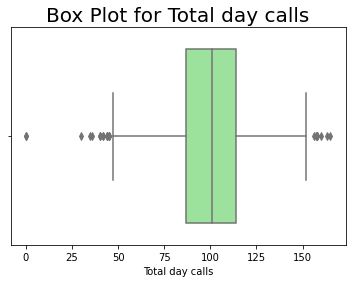

In [51]:
sns.boxplot(x=churn['Total day calls'],orient='h',color='lightgreen').set_title('Box Plot for Total day calls',fontsize=20)

In [52]:
fig = px.box(churn, y="Total day calls")
fig.show()

In [53]:
Q1=churn['Total day calls'].quantile(0.25)
Q3=churn['Total day calls'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

27.0


In [54]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

154.5 46.5


In [55]:
upper_outlier = churn[churn['Total day calls']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
252     MA              39        408                   0                0   
836     WV              86        415                   0                1   
1151    MT              80        415                   0                0   
1481    MS             101        408                   0                0   
1932    WY              90        510                   0                0   
1934    IN              57        415                   0                0   
2757    AZ              86        415                   0                1   
2904    MI              91        415                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
252                     0.0               60.4              158   
836                    38.0              123.0              158   
1151                    0.0              198.1              160   
1481                    0.0              239.0              156   
1932                    0.0              125.4              158   
1934                    0.0              189.3              157   
2757                   32.0               70.9              163   
2904                    0.0              154.4              165   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
252              10.27              306.2              120             26.03   
836              20.91              133.9              119             11.38   
1151             33.68              156.7               87             13.32   
1481             40.63              273.0              106             23.21   
1932             21.32              269.1               83             22.87   
1934             32.18              174.9               70             14.87   
2757             12.05              166.7              121             14.17   
2904             26.25              168.3              121             14.31   

      Total night minutes  Total night calls  Total night charge  \
252                 123.9                 46                5.58   
836                 138.2                103                6.22   
1151                182.1                 76                8.19   
1481                278.2                 93               12.52   
1932                238.6                103               10.74   
1934                221.9                117                9.99   
2757                244.9                105               11.02   
2904                239.9                 81               10.80   

      Total intl minutes  Total intl calls  Total intl charge  \
252                 12.4                 3               3.35   
836                 13.3                 4               3.59   
1151                 9.3                 3               2.51   
1481                13.5                 8               3.65   
1932                11.0                 7               2.97   
1934                11.2                 5               3.02   
2757                11.1                 5               3.00   
2904                11.7                 4               3.16   

      Customer service calls  Churn  
252                        1  False  
836                        1  False  
1151                       3  False  
1481                       1   True  
1932                       1  False  
1934                       3  False  
2757                       3  False  
2904                       5   True

In [56]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 8


In [57]:
lower_outlier = churn[churn['Total day calls']<lower_limit]
lower_outlier

State  Account length  Area code  International plan  Voice mail plan  \
544     NE              82        408                   0                0   
581     UT              67        510                   0                1   
1040    DE               2        415                   1                0   
1057    SD              98        415                   0                0   
1058    PA             106        408                   1                0   
1100    VT             101        510                   0                0   
1119    WY             107        510                   0                1   
1782    CA             137        415                   0                1   
2008    SC              73        415                   0                0   
2321    UT             170        415                   0                0   
2322    HI             135        415                   0                0   
2380    OR              99        408                   0                0   
2909    NH             155        408                   0                0   
3077    MT             124        415                   0                1   
3296    WV              58        408                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
544                     0.0             185.80               36   
581                    20.0             230.60               40   
1040                    0.0             132.10               42   
1057                    0.0              34.65                0   
1058                    0.0             133.70               45   
1100                    0.0              34.65                0   
1119                   31.0             160.30               45   
1782                   22.0             189.60               42   
2008                    0.0             203.30               45   
2321                    0.0             285.70               44   
2322                    0.0             190.90               44   
2380                    0.0             256.40               44   
2909                    0.0             216.70               30   
3077                   30.0             144.50               35   
3296                   39.0             211.90               40   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
544              31.59              276.5              134             23.50   
581              39.20              189.1               58             16.07   
1040             22.46              138.9               88             11.81   
1057              0.00              159.6              130             13.57   
1058             22.73              187.8              107             15.96   
1100              0.00              192.1              119             16.33   
1119             27.25              221.5               70             18.83   
1782             32.23              179.0              137             15.22   
2008             34.56              141.9               87             12.06   
2321             48.57              167.5              144             14.24   
2322             32.45              161.4              109             13.72   
2380             43.59              214.5              105             18.23   
2909             36.84              144.3              125             12.27   
3077             24.57              262.3              101             22.30   
3296             36.02              274.4               76             23.32   

      Total night minutes  Total night calls  Total night charge  \
544                 192.1                104                8.64   
581                 162.2                115                7.30   
1040                192.6                119                8.67   
1057                167.1                 88                7.52   
1058                181.9                 89                8.

In [58]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 15


In [59]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 23


In [60]:
churn['Total day calls']=np.where(
    churn['Total day calls']>upper_limit,
    upper_limit,
    np.where(
        churn['Total day calls']<lower_limit,
        lower_limit,
        churn['Total day calls']
    )
)

Text(0.5, 1.0, 'Box Plot for Total day charge')

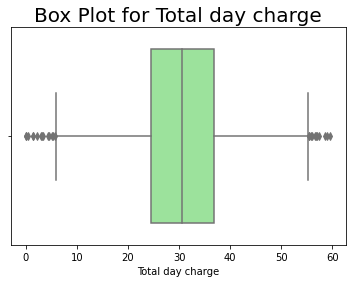

In [61]:
sns.boxplot(x=churn['Total day charge'],orient='h',color='lightgreen').set_title('Box Plot for Total day charge',fontsize=20)

In [62]:
fig = px.box(churn, y="Total day charge")
fig.show()

In [63]:
Q1=churn['Total day charge'].quantile(0.25)
Q3=churn['Total day charge'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

12.36


In [64]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

55.33 5.890000000000001


In [65]:
upper_outlier = churn[churn['Total day charge']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
128     OH              83        415                   0                0   
296     CO             154        415                   0                0   
485     MO             112        415                   0                0   
780     NY              64        415                   1                0   
1333    OK              82        510                   0                0   
1612    SD              93        510                   0                0   
1949    WI              89        415                   0                0   
2087    OH             115        510                   1                0   
2668    NY             161        415                   0                0   
2701    TX             208        510                   0                0   
2869    DE             129        510                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
128                     0.0             325.45            120.0   
296                     0.0             325.45             75.0   
485                     0.0             325.45             77.0   
780                     0.0             325.45             55.0   
1333                    0.0             325.45             73.0   
1612                    0.0             325.45            106.0   
1949                    0.0             325.45            112.0   
2087                    0.0             325.45             81.0   
2668                    0.0             325.45             67.0   
2701                    0.0             325.45             67.0   
2869                    0.0             325.45            118.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
128              57.36              227.4              116             19.33   
296              59.64              216.5               94             18.40   
485              57.04              212.5              109             18.06   
780              58.96              249.5               79             21.21   
1333             56.07              208.3              120             17.71   
1612             55.78              151.7               89             12.89   
1949             55.47              165.1              110             14.03   
2087             58.70              203.4              106             17.29   
2668             56.59              317.8               97             27.01   
2701             55.51              176.3              113             14.99   
2869             56.83              192.1              104             16.33   

      Total night minutes  Total night calls  Total night charge  \
128                 153.9                114                6.93   
296                 253.9                100               11.43   
485                 265.0                132               11.93   
780                 275.4                102               12.39   
1333                267.1                102               12.02   
1612                303.5                114               13.66   
1949                162.9                 97                7.33   
2087                217.5                107                9.79   
2668                160.6                128                7.23   
2701                181.7                102                8.18   
2869                191.0                 83                8.59   

      Total intl minutes  Total intl calls  Total intl charge  \
128                 15.8                 7               4.27   
296                 10.1                 9               2.73   
485                 12.7                 8               3.43   
780                 13.3                 9               3.59   
1333                10.6                 6               2.86   
1612                 8.7                 3               2.35   
1949                 7.5      

In [66]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 11


In [67]:
lower_outlier = churn[churn['Total day charge']<lower_limit]
lower_outlier

State  Account length  Area code  International plan  Voice mail plan  \
540     CO              63        415                   0                1   
582     NE              66        415                   0                0   
833     OR              98        415                   1                0   
1057    SD              98        415                   0                0   
1100    VT             101        510                   0                0   
1285    SC             138        510                   0                1   
1575    WI              70        415                   0                0   
1698    KS              43        415                   0                0   
1812    NH             148        408                   0                0   
2206    OK             127        510                   0                1   
2218    OH             134        415                   0                0   
2442    MI             110        510                   0                0   
2548    SC              36        408                   0                1   
2890    WY              53        415                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
540                    32.0              34.65            113.0   
582                     0.0              34.65            133.0   
833                     0.0              34.65             67.0   
1057                    0.0              34.65             46.5   
1100                    0.0              34.65             46.5   
1285                   21.0              34.65            149.0   
1575                    0.0              34.65            100.0   
1698                    0.0              34.65            117.0   
1812                    0.0              34.65            121.0   
2206                   27.0              34.65            113.0   
2218                    0.0              34.65             86.0   
2442                    0.0              34.65             92.0   
2548                   43.0              34.65            123.0   
2890                   27.0              34.65            119.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
540               5.25              187.0              113             15.90   
582               5.78              278.6               61             23.68   
833               2.13              256.6               90             21.81   
1057              0.00              159.6              130             13.57   
1100              0.00              192.1              119             16.33   
1285              3.32              140.9              109             11.98   
1575              1.34              136.4               83             11.59   
1698              4.59              160.9               97             13.68   
1812              2.99              161.7              125             13.74   
2206              0.44              254.0              102             21.59   
2218              1.33              171.4              100             14.57   
2442              3.21              258.4               81             21.96   
2548              5.08              129.1              117             10.97   
2890              4.40              206.5               96             17.55   

      Total night minutes  Total night calls  Total night charge  \
540                 230.8                101               10.39   
582                 129.6                120                5.83   
833                 169.4                 88                7.62   
1057                167.1                 88                7.52   
1100                168.8                 95                7.60   
1285                179.7                111                8.09   
1575                156.6                 89                7.05   
1698                279.5                 96               12.58   
1812           

In [68]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 14


In [69]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 25


In [70]:
churn['Total day charge']=np.where(
    churn['Total day charge']>upper_limit,
    upper_limit,
    np.where(
        churn['Total day charge']<lower_limit,
        lower_limit,
        churn['Total day charge']
    )
)

Text(0.5, 1.0, 'Box Plot for Total eve minutes')

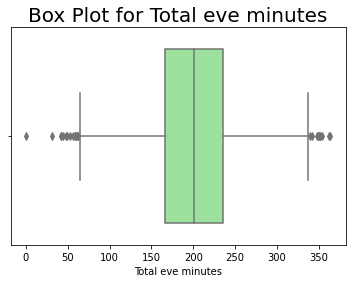

In [71]:
sns.boxplot(x=churn['Total eve minutes'],orient='h',color='lightgreen').set_title('Box Plot for Total eve minutes',fontsize=20)

In [72]:
fig = px.box(churn, y="Total eve minutes")
fig.show()

In [73]:
Q1=churn['Total eve minutes'].quantile(0.25)
Q3=churn['Total eve minutes'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

68.70000000000002


In [74]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

338.35 63.54999999999997


In [75]:
upper_outlier = churn[churn['Total eve minutes']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
6       MA             121        510                   0                1   
465     IN             113        415                   0                0   
1269    AR              99        510                   1                0   
1731    NV              94        408                   1                0   
2054    MD             102        415                   0                0   
2202    NC             130        408                   1                0   
2467    CO             181        510                   0                1   
2666    LA             117        408                   0                0   
2727    RI             121        408                   0                0   
3119    IN              46        415                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
6                      24.0              218.2             88.0   
465                     0.0              209.4            151.0   
1269                    0.0              242.3            102.0   
1731                    0.0               89.5             94.0   
2054                    0.0              129.5             56.0   
2202                    0.0              216.2            106.0   
2467                   40.0              105.2             61.0   
2666                    0.0              184.5             97.0   
2727                    0.0              170.4            108.0   
3119                   34.0              191.4            102.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
6                37.09              348.5              108             29.62   
465              35.60              347.3              113             29.52   
1269             41.19              350.9              102             29.83   
1731             15.22              339.9              106             28.89   
2054             22.02              354.2              118             30.11   
2202             36.75              363.7               86             30.91   
2467             17.88              341.3               79             29.01   
2666             31.37              351.6               80             29.89   
2727             28.97              350.5               68             29.79   
3119             32.54              361.8               96             30.75   

      Total night minutes  Total night calls  Total night charge  \
6                   212.6                118                9.57   
465                 246.0                116               11.07   
1269                163.1                 93                7.34   
1731                172.9                 76                7.78   
2054                145.5                 93                6.55   
2202                126.7                123                5.70   
2467                165.7                 97                7.46   
2666                215.8                 90                9.71   
2727                297.0                 87               13.37   
3119                147.5                132                6.64   

      Total intl minutes  Total intl calls  Total intl charge  \
6                    7.5                 7               2.03   
465                  7.4                 2               2.00   
1269                11.3                 3               3.05   
1731                 7.9                 1               2.13   
2054                10.9                 3               2.94   
2202                16.9                 2               4.56   
2467                 6.3                 3               1.70   
2666                 8.7                 4               2.35   
2727                11.2                 3               3.02   
3119                 7.2                 2               1.94   

      Customer service calls  Churn  
6                       

In [76]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 10


In [77]:
lower_outlier = churn[churn['Total eve minutes']<lower_limit]
lower_outlier

State  Account length  Area code  International plan  Voice mail plan  \
3       OH              84        408                   1                0   
27      LA             172        408                   0                0   
429     OK             125        415                   0                1   
472     NH             114        415                   0                0   
647     MN              80        415                   0                0   
671     WA             166        408                   0                0   
704     MN             103        415                   0                0   
835     AK              50        408                   0                0   
938     NE             149        415                   0                0   
1555    TX              38        510                   0                0   
2358    UT              97        415                   0                0   
2852    MO             167        415                   1                0   
2929    IL              48        510                   0                0   
2951    WY              71        415                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
3                       0.0              299.4             71.0   
27                      0.0              212.0            121.0   
429                    36.0              201.3            117.0   
472                     0.0              169.6             85.0   
647                     0.0              105.8            110.0   
671                     0.0              274.3            110.0   
704                     0.0              198.5            112.0   
835                     0.0              183.6            107.0   
938                     0.0              156.0             56.0   
1555                    0.0              149.0             92.0   
2358                    0.0              209.2            134.0   
2852                    0.0              244.8             91.0   
2929                    0.0              128.2             71.0   
2951                    0.0              243.7            124.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3                50.90               61.9               88              5.26   
27               36.04               31.2              115              2.65   
429              34.22               42.2               78              3.59   
472              28.83               58.9               86              5.01   
647              17.99               43.9               88              3.73   
671              46.63               52.9              109              4.50   
704              33.75               42.5               90              3.61   
835              31.21               58.6              118              4.98   
938              26.52               56.0              116              4.76   
1555             25.33               49.2               78              4.18   
2358             35.56                0.0                0              0.00   
2852             41.62               60.8              105              5.17   
2929             21.79               48.1               78              4.09   
2951             41.43               60.0               90              5.10   

      Total night minutes  Total night calls  Total night charge  \
3                   196.9                 89                8.86   
27                  293.3                 78               13.20   
429                 125.7                104                5.66   
472                 179.3                124                8.07   
647                 189.6                 87                8.53   
671                 246.1                119               11.07   
704                 179.2                124                8.06   
835                 202.6                 99                9.12   
938            

In [78]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 14


In [79]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 24


In [80]:
churn['Total eve minutes']=np.where(
    churn['Total eve minutes']>upper_limit,
    upper_limit,
    np.where(
        churn['Total eve minutes']<lower_limit,
        lower_limit,
        churn['Total eve minutes']
    )
)

Text(0.5, 1.0, 'Box Plot for Total eve calls')

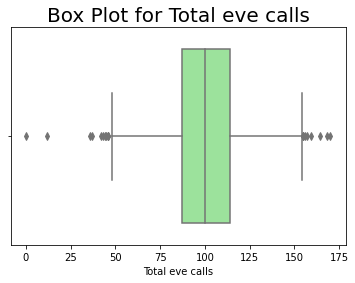

In [81]:
sns.boxplot(x=churn['Total eve calls'],orient='h',color='lightgreen').set_title('Box Plot for Total eve calls',fontsize=20)

In [82]:
fig = px.box(churn, y="Total eve calls")
fig.show()

In [83]:
Q1=churn['Total eve calls'].quantile(0.25)
Q3=churn['Total eve calls'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

27.0


In [84]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

154.5 46.5


In [85]:
upper_outlier = churn[churn['Total eve calls']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
808     HI             115        415                   0                1   
1353    MD              54        415                   0                0   
1792    SC              41        408                   0                0   
2507    GA              98        408                   0                0   
2533    AR             127        415                   1                0   
2581    NY             150        415                   0                1   
2675    WI              68        415                   0                0   
2726    FL             127        415                   0                0   
2888    PA             134        408                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
808                    33.0              145.0             72.0   
1353                    0.0              273.8            113.0   
1792                    0.0              237.8             92.0   
2507                    0.0              169.9             77.0   
2533                    0.0              143.2             60.0   
2581                   35.0              139.6             72.0   
2675                    0.0              148.8             70.0   
2726                    0.0              266.6            106.0   
2888                    0.0              205.3            122.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
808              24.65              194.5              157             16.53   
1353             46.55              119.6              156             10.17   
1792             40.43              223.5              155             19.00   
2507             28.88              138.3              155             11.76   
2533             24.34              179.5              159             15.26   
2581             23.73              332.8              170             28.29   
2675             25.30              246.5              164             20.95   
2726             45.32              264.8              168             22.51   
2888             34.90              240.5              155             20.44   

      Total night minutes  Total night calls  Total night charge  \
808                 242.3                138               10.90   
1353                267.6                117               12.04   
1792                217.4                 90                9.78   
2507                142.6                105                6.42   
2533                171.8                122                7.73   
2581                213.8                105                9.62   
2675                129.8                103                5.84   
2726                207.2                119                9.32   
2888                179.1                107                8.06   

      Total intl minutes  Total intl calls  Total intl charge  \
808                 14.2                 3               3.83   
1353                11.7                 3               3.16   
1792                10.2                 6               2.75   
2507                 8.5                 7               2.30   
2533                 6.2                 4               1.67   
2581                 8.8                 2               2.38   
2675                12.1                 3               3.27   
2726                 5.9                 2               1.59   
2888                 5.0                 9               1.35   

      Customer service calls  Churn  
808                        2  False  
1353                       1  False  
1792                       2  False  
2507                       1  False  
2533                       4   True  
2581                       2  False  
2675                       3  False  
2726                       1   True  
2888                       1  False

In [86]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 9


In [87]:
lower_outlier = churn[churn['Total eve calls']<lower_limit]
lower_outlier

State  Account length  Area code  International plan  Voice mail plan  \
126     OK              96        415                   0                0   
382     AR              74        510                   0                0   
760     AR               5        415                   0                0   
991     IA              42        415                   0                0   
1280    CT              74        408                   0                0   
1369    NM             161        408                   0                0   
1469    CO              86        408                   0                0   
2298    MA             105        415                   0                1   
2358    UT              97        415                   0                0   
2796    WV             153        408                   0                1   
3172    VA             163        415                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
126                     0.0              260.4            115.0   
382                     0.0              148.5            111.0   
760                     0.0              199.2            106.0   
991                     0.0              155.4            127.0   
1280                    0.0              157.1             95.0   
1369                    0.0              107.5            121.0   
1469                    0.0              171.8            106.0   
2298                   21.0              147.0            112.0   
2358                    0.0              209.2            134.0   
2796                   28.0              235.6             74.0   
3172                    0.0              202.9            100.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
126              44.27             146.00               46             12.41   
382              25.25             146.50               42             12.45   
760              33.86             187.30               12             15.92   
991              26.42             164.10               45             13.95   
1280             26.71             213.10               36             18.11   
1369             18.28             256.40               46             21.79   
1469             29.21             301.70               44             25.64   
2298             24.99             197.30               43             16.77   
2358             35.56              63.55                0              0.00   
2796             40.05             227.90               37             19.37   
3172             34.49             178.60               46             15.18   

      Total night minutes  Total night calls  Total night charge  \
126                 269.5                 87               12.13   
382                 289.2                 83               13.01   
760                 214.0                 85                9.63   
991                 157.7                128                7.10   
1280                280.4                 77               12.62   
1369                247.2                131               11.12   
1469                139.4                108                6.27   
2298                267.4                 93               12.03   
2358                175.4                 94                7.89   
2796                170.3                103                7.66   
3172                203.8                116                9.17   

      Total intl minutes  Total intl calls  Total intl charge  \
126                 11.5                 4               3.11   
382                  9.9                 6               2.67   
760                 13.3                 3               3.59   
991                  9.0                 3               2.43   
1280                 7.6                 3               2.05   
1369                12.6                 3               3.40   
1469                 9.7      

In [88]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 11


In [89]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 20


In [90]:
churn['Total eve calls']=np.where(
    churn['Total eve calls']>upper_limit,
    upper_limit,
    np.where(
        churn['Total eve calls']<lower_limit,
        lower_limit,
        churn['Total eve calls']
    )
)

Text(0.5, 1.0, 'Box Plot for Total eve charge')

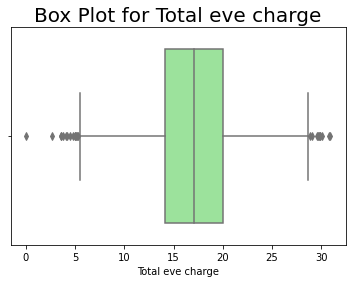

In [91]:
sns.boxplot(x=churn['Total eve charge'],orient='h',color='lightgreen').set_title('Box Plot for Total eve charge',fontsize=20)

In [92]:
fig = px.box(churn, y="Total eve charge")
fig.show()

In [93]:
Q1=churn['Total eve charge'].quantile(0.25)
Q3=churn['Total eve charge'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

5.84


In [94]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

28.759999999999998 5.4


In [95]:
upper_outlier = churn[churn['Total eve charge']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
6       MA             121        510                   0                1   
465     IN             113        415                   0                0   
1269    AR              99        510                   1                0   
1731    NV              94        408                   1                0   
2054    MD             102        415                   0                0   
2202    NC             130        408                   1                0   
2467    CO             181        510                   0                1   
2666    LA             117        408                   0                0   
2727    RI             121        408                   0                0   
3119    IN              46        415                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
6                      24.0              218.2             88.0   
465                     0.0              209.4            151.0   
1269                    0.0              242.3            102.0   
1731                    0.0               89.5             94.0   
2054                    0.0              129.5             56.0   
2202                    0.0              216.2            106.0   
2467                   40.0              105.2             61.0   
2666                    0.0              184.5             97.0   
2727                    0.0              170.4            108.0   
3119                   34.0              191.4            102.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
6                37.09             338.35            108.0             29.62   
465              35.60             338.35            113.0             29.52   
1269             41.19             338.35            102.0             29.83   
1731             15.22             338.35            106.0             28.89   
2054             22.02             338.35            118.0             30.11   
2202             36.75             338.35             86.0             30.91   
2467             17.88             338.35             79.0             29.01   
2666             31.37             338.35             80.0             29.89   
2727             28.97             338.35             68.0             29.79   
3119             32.54             338.35             96.0             30.75   

      Total night minutes  Total night calls  Total night charge  \
6                   212.6                118                9.57   
465                 246.0                116               11.07   
1269                163.1                 93                7.34   
1731                172.9                 76                7.78   
2054                145.5                 93                6.55   
2202                126.7                123                5.70   
2467                165.7                 97                7.46   
2666                215.8                 90                9.71   
2727                297.0                 87               13.37   
3119                147.5                132                6.64   

      Total intl minutes  Total intl calls  Total intl charge  \
6                    7.5                 7               2.03   
465                  7.4                 2               2.00   
1269                11.3                 3               3.05   
1731                 7.9                 1               2.13   
2054                10.9                 3               2.94   
2202                16.9                 2               4.56   
2467                 6.3                 3               1.70   
2666                 8.7                 4               2.35   
2727                11.2                 3               3.02   
3119                 7.2                 2               1.94   

      Customer service calls  Churn  
6                       

In [96]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 10


In [97]:
lower_outlier = churn[churn['Total eve charge']<lower_limit]
lower_outlier

State  Account length  Area code  International plan  Voice mail plan  \
3       OH              84        408                   1                0   
27      LA             172        408                   0                0   
429     OK             125        415                   0                1   
472     NH             114        415                   0                0   
647     MN              80        415                   0                0   
671     WA             166        408                   0                0   
704     MN             103        415                   0                0   
835     AK              50        408                   0                0   
938     NE             149        415                   0                0   
1555    TX              38        510                   0                0   
2358    UT              97        415                   0                0   
2852    MO             167        415                   1                0   
2929    IL              48        510                   0                0   
2951    WY              71        415                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
3                       0.0              299.4             71.0   
27                      0.0              212.0            121.0   
429                    36.0              201.3            117.0   
472                     0.0              169.6             85.0   
647                     0.0              105.8            110.0   
671                     0.0              274.3            110.0   
704                     0.0              198.5            112.0   
835                     0.0              183.6            107.0   
938                     0.0              156.0             56.0   
1555                    0.0              149.0             92.0   
2358                    0.0              209.2            134.0   
2852                    0.0              244.8             91.0   
2929                    0.0              128.2             71.0   
2951                    0.0              243.7            124.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
3                50.90              63.55             88.0              5.26   
27               36.04              63.55            115.0              2.65   
429              34.22              63.55             78.0              3.59   
472              28.83              63.55             86.0              5.01   
647              17.99              63.55             88.0              3.73   
671              46.63              63.55            109.0              4.50   
704              33.75              63.55             90.0              3.61   
835              31.21              63.55            118.0              4.98   
938              26.52              63.55            116.0              4.76   
1555             25.33              63.55             78.0              4.18   
2358             35.56              63.55             46.5              0.00   
2852             41.62              63.55            105.0              5.17   
2929             21.79              63.55             78.0              4.09   
2951             41.43              63.55             90.0              5.10   

      Total night minutes  Total night calls  Total night charge  \
3                   196.9                 89                8.86   
27                  293.3                 78               13.20   
429                 125.7                104                5.66   
472                 179.3                124                8.07   
647                 189.6                 87                8.53   
671                 246.1                119               11.07   
704                 179.2                124                8.06   
835                 202.6                 99                9.12   
938            

In [98]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 14


In [99]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 24


In [100]:
churn['Total eve charge']=np.where(
    churn['Total eve charge']>upper_limit,
    upper_limit,
    np.where(
        churn['Total eve charge']<lower_limit,
        lower_limit,
        churn['Total eve charge']
    )
)

Text(0.5, 1.0, 'Box Plot for Total night minutes')

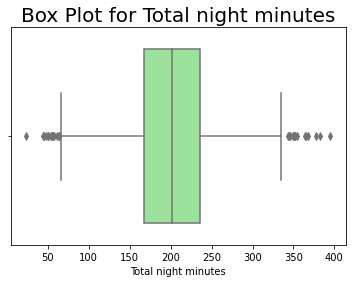

In [101]:
sns.boxplot(x=churn['Total night minutes'],orient='h',color='lightgreen').set_title('Box Plot for Total night minutes',fontsize=20)

In [102]:
fig = px.box(churn, y="Total night minutes")
fig.show()

In [103]:
Q1=churn['Total night minutes'].quantile(0.25)
Q3=churn['Total night minutes'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

68.30000000000001


In [104]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

337.75 64.54999999999998


In [105]:
upper_outlier = churn[churn['Total night minutes']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
201     VA             108        408                   0                0   
361     WI              85        408                   1                0   
729     PA              52        408                   0                0   
733     WI              80        415                   0                0   
972     OH             147        415                   1                1   
1035    NE              89        415                   0                1   
1137    ID              55        510                   0                1   
2098    UT             116        415                   0                1   
2142    VA             172        510                   0                0   
2219    IN              96        415                   0                1   
2454    LA              94        415                   0                0   
2495    GA              73        408                   0                0   
2848    CA              75        510                   0                1   
2919    MO              86        415                   0                0   
3116    AR             153        408                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
201                     0.0              198.5             99.0   
361                     0.0              165.4            107.0   
729                     0.0              215.9             67.0   
733                     0.0              239.9            121.0   
972                    24.0              219.9            118.0   
1035                   29.0              163.5             80.0   
1137                    8.0              222.5            104.0   
2098                   24.0              232.9             90.0   
2142                    0.0              169.8            123.0   
2219                   23.0              183.1             88.0   
2454                    0.0              212.1             98.0   
2495                    0.0              157.6             92.0   
2848                   38.0              163.6            132.0   
2919                    0.0               83.5             96.0   
3116                    0.0              154.6             56.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
201              33.75              267.8             60.0             22.76   
361              28.12              196.0            126.0             16.66   
729              36.70              217.0            108.0             18.45   
733              40.78              142.3             51.0             12.10   
972              37.38              208.5            116.0             17.72   
1035             27.80              274.8            136.0             23.36   
1137             37.83              171.5             94.0             14.58   
2098             39.59              152.1             94.0             12.93   
2142             28.87              183.1             94.0             15.56   
2219             31.13              147.4             89.0             12.53   
2454             36.06              189.4             89.0             16.10   
2495             26.79              198.3             87.0             16.86   
2848             27.81              146.7            113.0             12.47   
2919             14.20              221.1             63.0             18.79   
3116             26.28              263.0             84.0             22.36   

      Total night minutes  Total night calls  Total night charge  \
201                 354.9                 75               15.97   
361                 349.2                110               15.71   
729                 342.8                130               15.43   
733                 364.3                106               16.39   
972                 352.5                111               15.

In [106]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 15


In [107]:
lower_outlier = churn[churn['Total night minutes']<lower_limit]
lower_outlier

State  Account length  Area code  International plan  Voice mail plan  \
94      NJ              64        510                   0                0   
698     WY              42        408                   0                0   
786     MI              45        510                   0                1   
792     NC             165        415                   0                0   
849     MO             164        408                   0                1   
878     IA             152        415                   0                0   
1031    CT             100        415                   0                0   
1893    PA             176        415                   0                0   
1923    VA             123        408                   0                0   
2221    KS             123        415                   0                0   
2423    OR             101        415                   0                0   
2598    OK             146        510                   0                0   
2939    AK              76        415                   0                1   
3137    OH             135        415                   0                0   
3290    ND              27        415                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
94                      0.0              162.6             83.0   
698                     0.0              146.3             84.0   
786                    26.0               91.7            104.0   
792                     0.0              207.7            109.0   
849                    25.0              219.1             88.0   
878                     0.0              206.3             98.0   
1031                    0.0              235.8            130.0   
1893                    0.0              169.5            151.0   
1923                    0.0              154.3            107.0   
2221                    0.0              140.0            106.0   
2423                    0.0              118.6             89.0   
2598                    0.0              138.4            104.0   
2939                   22.0              160.1            107.0   
3137                    0.0              173.4            107.0   
3290                    0.0              227.4             67.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
94               27.64              152.3            109.0             12.95   
698              24.87              255.9            113.0             21.75   
786              15.59              150.6            119.0             12.80   
792              35.31              164.8             94.0             14.01   
849              37.25              151.5             99.0             12.88   
878              35.07              292.8             82.0             24.89   
1031             40.09              176.0             69.0             14.96   
1893             28.82              112.9             84.0              9.60   
1923             26.23              183.0            111.0             15.56   
2221             23.80              153.7            101.0             13.06   
2423             20.16              199.6             97.0             16.97   
2598             23.53              158.9            122.0             13.51   
2939             27.22              168.7            136.0             14.34   
3137             29.48              222.0             84.0             18.87   
3290             38.66              248.0            115.0             21.08   

      Total night minutes  Total night calls  Total night charge  \
94                   57.5                122                2.59   
698                  45.0                117                2.03   
786                  63.3                103                2.85   
792                  54.5                 91                2.45   
849                  50.1                 60                2.

In [108]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 15


In [109]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 30


In [110]:
churn['Total night minutes']=np.where(
    churn['Total night minutes']>upper_limit,
    upper_limit,
    np.where(
        churn['Total night minutes']<lower_limit,
        lower_limit,
        churn['Total night minutes']
    )
)

Text(0.5, 1.0, 'Box Plot for Total night calls')

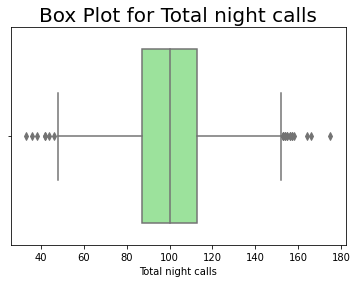

In [111]:
sns.boxplot(x=churn['Total night calls'],orient='h',color='lightgreen').set_title('Box Plot for Total night calls',fontsize=20)

In [112]:
fig = px.box(churn, y="Total night calls")
fig.show()

In [113]:
Q1=churn['Total night calls'].quantile(0.25)
Q3=churn['Total night calls'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

26.0


In [114]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

152.0 48.0


In [115]:
upper_outlier = churn[churn['Total night calls']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
347     OR              49        510                   0                0   
471     TX              90        408                   1                0   
713     CT              23        510                   0                0   
947     VT             100        415                   0                1   
1017    ME              79        415                   0                0   
1382    MT              71        510                   0                1   
1432    KY             124        415                   0                0   
1844    NE              34        415                   0                0   
2198    MI              86        408                   0                0   
2206    OK             127        510                   0                1   
2546    WY              41        510                   0                0   
2573    ID             103        415                   0                0   
2587    DE              75        510                   0                1   
2763    RI             129        415                   0                1   
2899    ID             118        415                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
347                     0.0             119.40             69.0   
471                     0.0             221.80             97.0   
713                     0.0             321.60            107.0   
947                    25.0             215.90             90.0   
1017                    0.0             213.60            110.0   
1382                   23.0             175.70             82.0   
1432                    0.0             194.00            103.0   
1844                    0.0             193.70             74.0   
2198                    0.0             148.20             71.0   
2206                   27.0              34.65            113.0   
2546                    0.0             223.80             67.0   
2573                    0.0              70.90            134.0   
2587                   28.0             200.60             96.0   
2763                   33.0             119.60            104.0   
2899                    0.0             140.40            112.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
347              20.30              273.3             92.0             23.23   
471              37.71              203.8            134.0             17.32   
713              54.67              251.6            115.0             21.39   
947              36.70              257.9             92.0             21.92   
1017             36.31              234.9            121.0             19.97   
1382             29.87              258.9            136.0             22.01   
1432             32.98              241.0            116.0             20.49   
1844             32.93              126.9             84.0             10.79   
2198             25.19              285.1             91.0             24.23   
2206              5.89              254.0            102.0             21.59   
2546             38.05              244.8             74.0             20.81   
2573             12.05              134.5            112.0             11.43   
2587             34.10              164.1            111.0             13.95   
2763             20.33              278.7             88.0             23.69   
2899             23.87              187.1             60.0             15.90   

      Total night minutes  Total night calls  Total night charge  \
347                 214.4                153                9.65   
471                 215.8                154                9.71   
713                 141.1                158                6.35   
947                 180.2                157                8.11   
1017                229.6                157               10.

In [116]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 15


In [117]:
lower_outlier = churn[churn['Total night calls']<lower_limit]
lower_outlier

State  Account length  Area code  International plan  Voice mail plan  \
252     MA              39        408                   0                0   
271     KY             151        408                   0                1   
322     TN              98        415                   0                1   
2138    OK              15        415                   0                0   
2336    DE              97        415                   0                1   
2398    VA             105        415                   0                0   
2729    AL             121        408                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
252                     0.0               60.4            154.5   
271                    17.0              214.7             97.0   
322                    22.0              278.3             89.0   
2138                    0.0              121.1            130.0   
2336                   32.0              183.4             94.0   
2398                    0.0              259.3             96.0   
2729                   35.0               68.7             95.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
252              10.27              306.2            120.0             26.03   
271              36.50              138.5             90.0             11.77   
322              47.31               93.4            143.0              7.94   
2138             20.59              216.0             86.0             18.36   
2336             31.18              269.1            120.0             22.87   
2398             44.08              175.2             97.0             14.89   
2729             11.68              209.2             69.0             17.78   

      Total night minutes  Total night calls  Total night charge  \
252                 123.9                 46                5.58   
271                 169.1                 44                7.61   
322                 107.6                 42                4.84   
2138                235.1                 33               10.58   
2336                203.5                 38                9.16   
2398                222.4                 36               10.01   
2729                197.4                 42                8.88   

      Total intl minutes  Total intl calls  Total intl charge  \
252                 12.4                 3               3.35   
271                  8.6                 4               2.32   
322                  9.7                 5               2.62   
2138                16.1                 5               4.35   
2336                 6.7                 4               1.81   
2398                12.0                 5               3.24   
2729                11.4                 4               3.08   

      Customer service calls  Churn  
252                        1  False  
271                        1  False  
322                        0  False  
2138                       2  False  
2336                       5  False  
2398                       3  False  
2729                       1  False

In [118]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 7


In [119]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 22


In [120]:
churn['Total night calls']=np.where(
    churn['Total night calls']>upper_limit,
    upper_limit,
    np.where(
        churn['Total night calls']<lower_limit,
        lower_limit,
        churn['Total night calls']
    )
)

Text(0.5, 1.0, 'Box Plot for Total night charge')

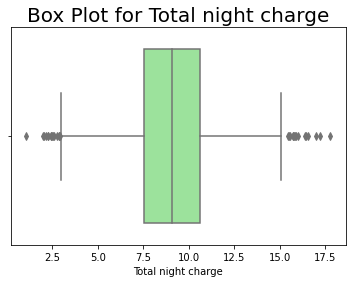

In [121]:
sns.boxplot(x=churn['Total night charge'],orient='h',color='lightgreen').set_title('Box Plot for Total night charge',fontsize=20)

In [122]:
fig = px.box(churn, y="Total night charge")
fig.show()

In [123]:
Q1=churn['Total night charge'].quantile(0.25)
Q3=churn['Total night charge'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

3.0700000000000003


In [124]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

15.195 2.914999999999999


In [125]:
upper_outlier = churn[churn['Total night charge']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
201     VA             108        408                   0                0   
361     WI              85        408                   1                0   
729     PA              52        408                   0                0   
733     WI              80        415                   0                0   
972     OH             147        415                   1                1   
1035    NE              89        415                   0                1   
1137    ID              55        510                   0                1   
2098    UT             116        415                   0                1   
2142    VA             172        510                   0                0   
2219    IN              96        415                   0                1   
2454    LA              94        415                   0                0   
2495    GA              73        408                   0                0   
2848    CA              75        510                   0                1   
2919    MO              86        415                   0                0   
3116    AR             153        408                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
201                     0.0              198.5             99.0   
361                     0.0              165.4            107.0   
729                     0.0              215.9             67.0   
733                     0.0              239.9            121.0   
972                    24.0              219.9            118.0   
1035                   29.0              163.5             80.0   
1137                    8.0              222.5            104.0   
2098                   24.0              232.9             90.0   
2142                    0.0              169.8            123.0   
2219                   23.0              183.1             88.0   
2454                    0.0              212.1             98.0   
2495                    0.0              157.6             92.0   
2848                   38.0              163.6            132.0   
2919                    0.0               83.5             96.0   
3116                    0.0              154.6             56.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
201              33.75              267.8             60.0             22.76   
361              28.12              196.0            126.0             16.66   
729              36.70              217.0            108.0             18.45   
733              40.78              142.3             51.0             12.10   
972              37.38              208.5            116.0             17.72   
1035             27.80              274.8            136.0             23.36   
1137             37.83              171.5             94.0             14.58   
2098             39.59              152.1             94.0             12.93   
2142             28.87              183.1             94.0             15.56   
2219             31.13              147.4             89.0             12.53   
2454             36.06              189.4             89.0             16.10   
2495             26.79              198.3             87.0             16.86   
2848             27.81              146.7            113.0             12.47   
2919             14.20              221.1             63.0             18.79   
3116             26.28              263.0             84.0             22.36   

      Total night minutes  Total night calls  Total night charge  \
201                337.75               75.0               15.97   
361                337.75              110.0               15.71   
729                337.75              130.0               15.43   
733                337.75              106.0               16.39   
972                337.75              111.0               15.

In [126]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 15


In [127]:
lower_outlier = churn[churn['Total night charge']<lower_limit]
lower_outlier

State  Account length  Area code  International plan  Voice mail plan  \
94      NJ              64        510                   0                0   
698     WY              42        408                   0                0   
786     MI              45        510                   0                1   
792     NC             165        415                   0                0   
849     MO             164        408                   0                1   
878     IA             152        415                   0                0   
1031    CT             100        415                   0                0   
1893    PA             176        415                   0                0   
1923    VA             123        408                   0                0   
2221    KS             123        415                   0                0   
2423    OR             101        415                   0                0   
2598    OK             146        510                   0                0   
2939    AK              76        415                   0                1   
3137    OH             135        415                   0                0   
3290    ND              27        415                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
94                      0.0              162.6             83.0   
698                     0.0              146.3             84.0   
786                    26.0               91.7            104.0   
792                     0.0              207.7            109.0   
849                    25.0              219.1             88.0   
878                     0.0              206.3             98.0   
1031                    0.0              235.8            130.0   
1893                    0.0              169.5            151.0   
1923                    0.0              154.3            107.0   
2221                    0.0              140.0            106.0   
2423                    0.0              118.6             89.0   
2598                    0.0              138.4            104.0   
2939                   22.0              160.1            107.0   
3137                    0.0              173.4            107.0   
3290                    0.0              227.4             67.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
94               27.64              152.3            109.0             12.95   
698              24.87              255.9            113.0             21.75   
786              15.59              150.6            119.0             12.80   
792              35.31              164.8             94.0             14.01   
849              37.25              151.5             99.0             12.88   
878              35.07              292.8             82.0             24.89   
1031             40.09              176.0             69.0             14.96   
1893             28.82              112.9             84.0              9.60   
1923             26.23              183.0            111.0             15.56   
2221             23.80              153.7            101.0             13.06   
2423             20.16              199.6             97.0             16.97   
2598             23.53              158.9            122.0             13.51   
2939             27.22              168.7            136.0             14.34   
3137             29.48              222.0             84.0             18.87   
3290             38.66              248.0            115.0             21.08   

      Total night minutes  Total night calls  Total night charge  \
94                  64.55              122.0                2.59   
698                 64.55              117.0                2.03   
786                 64.55              103.0                2.85   
792                 64.55               91.0                2.45   
849                 64.55               60.0                2.

In [128]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 15


In [129]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 30


In [130]:
churn['Total night charge']=np.where(
    churn['Total night charge']>upper_limit,
    upper_limit,
    np.where(
        churn['Total night charge']<lower_limit,
        lower_limit,
        churn['Total night charge']
    )
)

Text(0.5, 1.0, 'Box Plot for Total intl minutes')

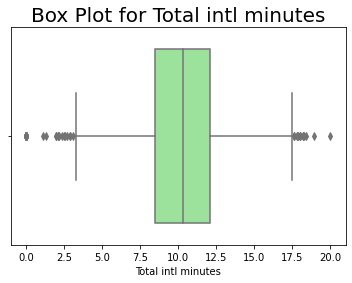

In [131]:
sns.boxplot(x=churn['Total intl minutes'],orient='h',color='lightgreen').set_title('Box Plot for Total intl minutes',fontsize=20)

In [132]:
fig = px.box(churn, y="Total intl minutes")
fig.show()

In [133]:
Q1=churn['Total intl minutes'].quantile(0.25)
Q3=churn['Total intl minutes'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

3.5999999999999996


In [134]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

17.5 3.1000000000000005


In [135]:
upper_outlier = churn[churn['Total intl minutes']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
93      ME              36        510                   1                1   
176     FL              70        510                   1                0   
251     ID             128        408                   0                0   
298     MD              45        415                   0                0   
430     NE             194        408                   0                0   
1117    MI              81        415                   1                0   
1437    OR              53        415                   0                0   
1592    CA              77        510                   0                0   
1794    OH              83        415                   0                1   
1912    IL             100        415                   0                0   
2040    CO              81        408                   0                0   
2643    OK             172        408                   0                0   
2937    UT              73        415                   0                0   
3212    ID             130        415                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
93                     42.0              196.8             89.0   
176                     0.0              226.7             98.0   
251                     0.0              125.2             99.0   
298                     0.0               78.2            127.0   
430                     0.0               48.4            101.0   
1117                    0.0              149.4             68.0   
1437                    0.0              184.8             98.0   
1592                    0.0              175.5             86.0   
1794                   25.0              191.3             95.0   
1912                    0.0              191.9             95.0   
2040                    0.0              115.3             99.0   
2643                    0.0              203.9            109.0   
2937                    0.0              182.3            115.0   
3212                    0.0              263.7            113.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
93               33.46              254.9            122.0             21.67   
176              38.54              228.1            115.0             19.39   
251              21.28              205.4            107.0             17.46   
298              13.29              253.4            108.0             21.54   
430               8.23              281.1            138.0             23.89   
1117             25.40              171.9             98.0             14.61   
1437             31.42              216.4            125.0             18.39   
1592             29.84              205.1             78.0             17.43   
1794             32.52              250.7            136.0             21.31   
1912             32.62              200.9            101.0             17.08   
2040             19.60              224.7            117.0             19.10   
2643             34.66              234.0            123.0             19.89   
2937             30.99              199.2             97.0             16.93   
3212             44.83              186.5            103.0             15.85   

      Total night minutes  Total night calls  Total night charge  \
93                  138.3              126.0                6.22   
176                  73.2               93.0                3.29   
251                 254.4              111.0               11.45   
298                 255.0              100.0               11.48   
430                 218.5               87.0                9.83   
1117                214.5               97.0                9.65   
1437                141.1              116.0                6.35   
1592                245.2              100.0               11.03   
1794           

In [136]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 14


In [137]:
lower_outlier = churn[churn['Total intl minutes']<lower_limit]
lower_outlier

State  Account length  Area code  International plan  Voice mail plan  \
145     KS              70        408                   0                0   
278     IN              98        408                   0                1   
393     VT             165        510                   0                0   
477     HI              87        408                   0                1   
559     MO             106        415                   0                0   
600     WY             161        415                   1                0   
694     WI              62        415                   0                0   
814     KS              70        415                   0                0   
853     OH             114        415                   0                0   
868     HI             157        415                   0                0   
1103    VA             115        415                   0                0   
1751    AL             121        415                   0                0   
1764    LA             133        415                   0                0   
1815    WY              94        408                   0                0   
1890    FL              98        408                   0                0   
1903    ND             101        415                   0                0   
2025    NY              86        510                   0                0   
2148    WV             145        415                   0                0   
2203    NM             158        408                   0                0   
2339    CA              87        415                   0                1   
2347    MA              58        408                   0                0   
2359    IL              98        510                   1                0   
2421    LA             123        415                   0                1   
2578    SD             221        510                   0                1   
2587    DE              75        510                   0                1   
2705    IN              65        415                   0                0   
2740    OR              94        415                   0                0   
2990    VT             137        510                   0                0   
3071    NE              77        415                   0                0   
3291    NH             123        408                   0                0   
3320    NY             120        510                   0                1   
3325    CA             127        510                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
145                     0.0              232.1            122.0   
278                    21.0               64.6             98.0   
393                     0.0              242.9            126.0   
477                    28.0              151.4             95.0   
559                     0.0              114.4            104.0   
600                     0.0              189.6             78.0   
694                     0.0              281.0             66.0   
814                     0.0              222.8            114.0   
853                     0.0              191.5             88.0   
868                     0.0              276.2             95.0   
1103                    0.0              132.0             90.0   
1751                    0.0              168.9            128.0   
1764                    0.0              216.2             67.0   
1815                    0.0              207.0            109.0   
1890                    0.0              288.1            101.0   
1903                    0.0              217.7            118.0   
2025                    0.0               70.7            125.0   
2148                    0.0              129.4             97.0   
2203                    0.0              172.4            114.0   
2339                   19.0              165.8            122.0   
2347                   

In [138]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 32


In [139]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 46


In [140]:
churn['Total intl minutes']=np.where(
    churn['Total intl minutes']>upper_limit,
    upper_limit,
    np.where(
        churn['Total intl minutes']<lower_limit,
        lower_limit,
        churn['Total intl minutes']
    )
)

Text(0.5, 1.0, 'Box Plot for Total intl calls')

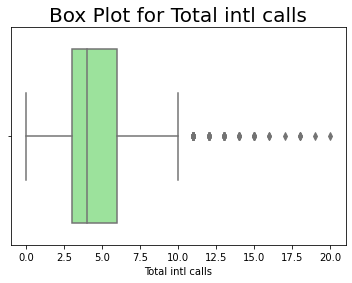

In [141]:
sns.boxplot(x=churn['Total intl calls'],orient='h',color='lightgreen').set_title('Box Plot for Total intl calls',fontsize=20)

In [142]:
fig = px.box(churn, y="Total intl calls")
fig.show()

In [143]:
Q1=churn['Total intl calls'].quantile(0.25)
Q3=churn['Total intl calls'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

3.0


In [144]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

10.5 -1.5


In [145]:
upper_outlier = churn[churn['Total intl calls']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
19      AZ             130        415                   0                0   
35      MD             135        408                   1                1   
125     RI              56        415                   0                0   
148     NY              67        408                   0                1   
151     NM              73        415                   0                0   
...    ...             ...        ...                 ...              ...   
3056    SD              91        415                   0                0   
3094    VA              75        415                   0                0   
3195    NJ             182        415                   0                0   
3247    NM             112        415                   0                0   
3309    MA              87        408                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
19                      0.0              183.0            112.0   
35                     41.0              173.1             85.0   
125                     0.0              226.0            112.0   
148                    36.0              115.6            111.0   
151                     0.0              214.3            145.0   
...                     ...                ...              ...   
3056                    0.0              153.0            123.0   
3094                    0.0              224.7            116.0   
3195                    0.0              279.1            124.0   
3247                    0.0               81.6             94.0   
3309                    0.0              186.9             79.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
19               31.11               72.9             99.0              6.20   
35               29.43              203.9            107.0             17.33   
125              38.42              248.5            118.0             21.12   
148              19.65              237.7             94.0             20.20   
151              36.43              268.5            135.0             22.82   
...                ...                ...              ...               ...   
3056             26.01              141.1            127.0             11.99   
3094             38.20              192.0             79.0             16.32   
3195             47.45              180.5            108.0             15.34   
3247             13.87              268.1            112.0             22.79   
3309             31.77              182.6            105.0             15.52   

      Total night minutes  Total night calls  Total night charge  \
19                  181.8               78.0                8.18   
35                  122.2               78.0                5.50   
125                 140.5              142.0                6.32   
148                 169.9              103.0                7.65   
151                 241.2               92.0               10.85   
...                   ...                ...                 ...   
3056                171.5               76.0                7.72   
3094                212.2               98.0                9.55   
3195                217.5              104.0                9.79   
3247                140.8               75.0                6.34   
3309                143.1               90.0                6.44   

      Total intl minutes  Total intl calls  Total intl charge  \
19                   9.5                19               2.57   
35                  14.6                15               3.94   
125                  6.9                11               1.86   
148                  9.9                12               2.67   
151                 10.8                13               2.92   
...                  ...               ...                ...   
3056                10.3      

In [146]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 78


In [147]:
lower_outlier = churn[churn['Total intl calls']<lower_limit]
lower_outlier

Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []

In [148]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 0


In [149]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 78


In [150]:
churn['Total intl calls']=np.where(
    churn['Total intl calls']>upper_limit,
    upper_limit,
    np.where(
        churn['Total intl calls']<lower_limit,
        lower_limit,
        churn['Total intl calls']
    )
)

Text(0.5, 1.0, 'Box Plot for Total intl charge')

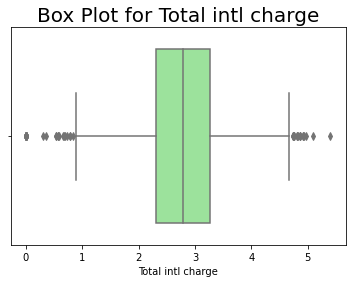

In [151]:
sns.boxplot(x=churn['Total intl charge'],orient='h',color='lightgreen').set_title('Box Plot for Total intl charge',fontsize=20)

In [152]:
fig = px.box(churn, y="Total intl charge")
fig.show()

In [153]:
Q1=churn['Total intl charge'].quantile(0.25)
Q3=churn['Total intl charge'].quantile(0.75)
iqr=Q3-Q1
print(iqr)

0.9700000000000002


In [154]:
upper_limit=Q3+1.5*iqr
lower_limit=Q1-1.5*iqr
print(upper_limit,lower_limit)

4.7250000000000005 0.8449999999999995


In [155]:
upper_outlier = churn[churn['Total intl charge']>upper_limit]
upper_outlier

State  Account length  Area code  International plan  Voice mail plan  \
93      ME              36        510                   1                1   
176     FL              70        510                   1                0   
251     ID             128        408                   0                0   
298     MD              45        415                   0                0   
402     MI              93        415                   1                0   
414     ID             148        510                   0                1   
430     NE             194        408                   0                0   
1117    MI              81        415                   1                0   
1437    OR              53        415                   0                0   
1592    CA              77        510                   0                0   
1794    OH              83        415                   0                1   
1912    IL             100        415                   0                0   
2040    CO              81        408                   0                0   
2472    MI              82        415                   0                0   
2643    OK             172        408                   0                0   
2937    UT              73        415                   0                0   
3212    ID             130        415                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
93                     42.0              196.8             89.0   
176                     0.0              226.7             98.0   
251                     0.0              125.2             99.0   
298                     0.0               78.2            127.0   
402                     0.0              216.9             61.0   
414                    14.0               93.6            137.0   
430                     0.0               48.4            101.0   
1117                    0.0              149.4             68.0   
1437                    0.0              184.8             98.0   
1592                    0.0              175.5             86.0   
1794                   25.0              191.3             95.0   
1912                    0.0              191.9             95.0   
2040                    0.0              115.3             99.0   
2472                    0.0              135.4            102.0   
2643                    0.0              203.9            109.0   
2937                    0.0              182.3            115.0   
3212                    0.0              263.7            113.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
93               33.46              254.9            122.0             21.67   
176              38.54              228.1            115.0             19.39   
251              21.28              205.4            107.0             17.46   
298              13.29              253.4            108.0             21.54   
402              36.87              207.4            120.0             17.63   
414              15.91              193.8             72.0             16.47   
430               8.23              281.1            138.0             23.89   
1117             25.40              171.9             98.0             14.61   
1437             31.42              216.4            125.0             18.39   
1592             29.84              205.1             78.0             17.43   
1794             32.52              250.7            136.0             21.31   
1912             32.62              200.9            101.0             17.08   
2040             19.60              224.7            117.0             19.10   
2472             23.02              237.1            122.0             20.15   
2643             34.66              234.0            123.0             19.89   
2937             30.99              199.2             97.0             16.93   
3212             44.83           

In [156]:
print('Count of upper outliers -',upper_outlier.shape[0])

Count of upper outliers - 17


In [157]:
lower_outlier = churn[churn['Total intl charge']<lower_limit]
lower_outlier

State  Account length  Area code  International plan  Voice mail plan  \
145     KS              70        408                   0                0   
278     IN              98        408                   0                1   
393     VT             165        510                   0                0   
477     HI              87        408                   0                1   
559     MO             106        415                   0                0   
600     WY             161        415                   1                0   
694     WI              62        415                   0                0   
814     KS              70        415                   0                0   
853     OH             114        415                   0                0   
868     HI             157        415                   0                0   
1103    VA             115        415                   0                0   
1751    AL             121        415                   0                0   
1764    LA             133        415                   0                0   
1815    WY              94        408                   0                0   
1890    FL              98        408                   0                0   
1903    ND             101        415                   0                0   
2025    NY              86        510                   0                0   
2148    WV             145        415                   0                0   
2203    NM             158        408                   0                0   
2339    CA              87        415                   0                1   
2347    MA              58        408                   0                0   
2359    IL              98        510                   1                0   
2421    LA             123        415                   0                1   
2578    SD             221        510                   0                1   
2587    DE              75        510                   0                1   
2705    IN              65        415                   0                0   
2740    OR              94        415                   0                0   
2990    VT             137        510                   0                0   
3071    NE              77        415                   0                0   
3291    NH             123        408                   0                0   
3320    NY             120        510                   0                1   
3325    CA             127        510                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
145                     0.0              232.1            122.0   
278                    21.0               64.6             98.0   
393                     0.0              242.9            126.0   
477                    28.0              151.4             95.0   
559                     0.0              114.4            104.0   
600                     0.0              189.6             78.0   
694                     0.0              281.0             66.0   
814                     0.0              222.8            114.0   
853                     0.0              191.5             88.0   
868                     0.0              276.2             95.0   
1103                    0.0              132.0             90.0   
1751                    0.0              168.9            128.0   
1764                    0.0              216.2             67.0   
1815                    0.0              207.0            109.0   
1890                    0.0              288.1            101.0   
1903                    0.0              217.7            118.0   
2025                    0.0               70.7            125.0   
2148                    0.0              129.4             97.0   
2203                    0.0              172.4            114.0   
2339                   19.0              165.8            122.0   
2347                   

In [158]:
print('Count of lower outliers -',lower_outlier.shape[0])

Count of lower outliers - 32


In [159]:
print('Total outliers -',(upper_outlier.shape[0]+lower_outlier.shape[0]))

Total outliers - 49


In [160]:
churn['Total intl charge']=np.where(
    churn['Total intl charge']>upper_limit,
    upper_limit,
    np.where(
        churn['Total intl charge']<lower_limit,
        lower_limit,
        churn['Total intl charge']
    )
)

### Count Plot -

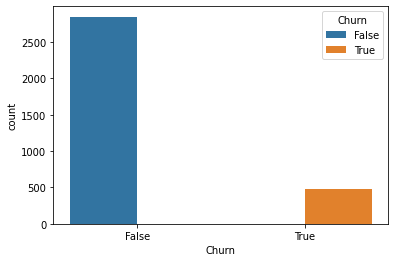

In [161]:
sns.countplot(x='Churn',hue='Churn',data=churn)

In [162]:
px.histogram(churn, x='Churn', color="Churn", barmode='group')

### Strip Plots and Violin Plots -

Text(0.5, 1.0, 'Strip Plot for Number vmail messages')

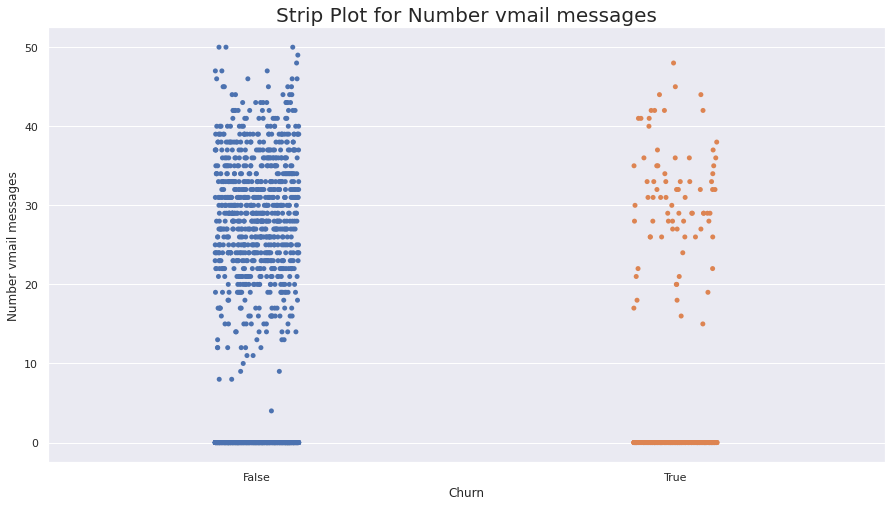

In [163]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Number vmail messages").set_title('Strip Plot for Number vmail messages',fontsize=20)

In [164]:
fig = px.strip(churn, x="Churn", y="Number vmail messages")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Number vmail messages')

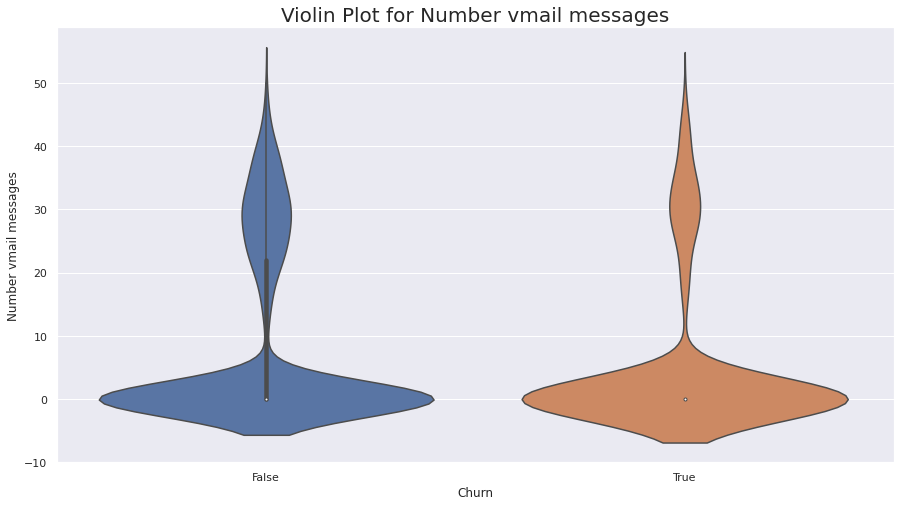

In [165]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Number vmail messages").set_title('Violin Plot for Number vmail messages',fontsize=20)

In [166]:
fig = px.violin(churn, x="Churn", y="Number vmail messages")
fig.show()

Text(0.5, 1.0, 'Strip Plot for Total day minutes')

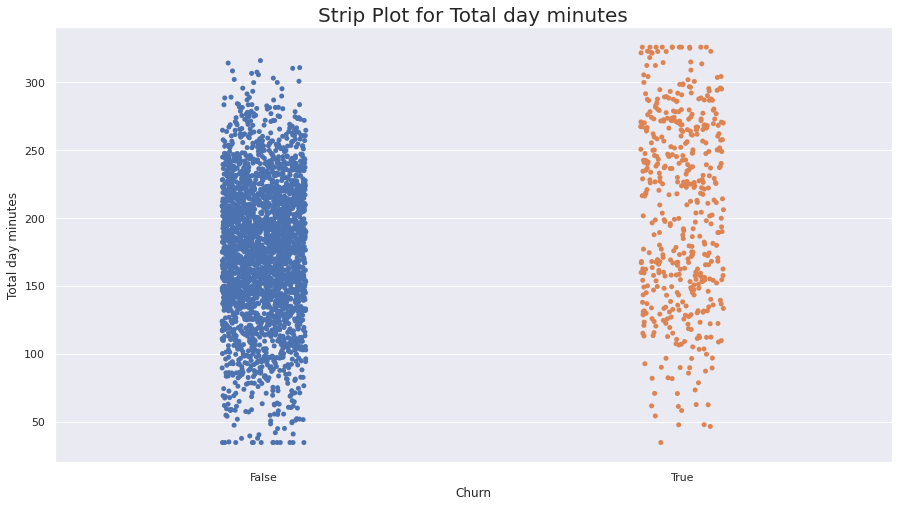

In [167]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Total day minutes").set_title('Strip Plot for Total day minutes',fontsize=20)

In [168]:
fig = px.strip(churn, x="Churn", y="Total day minutes")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Total day minutes')

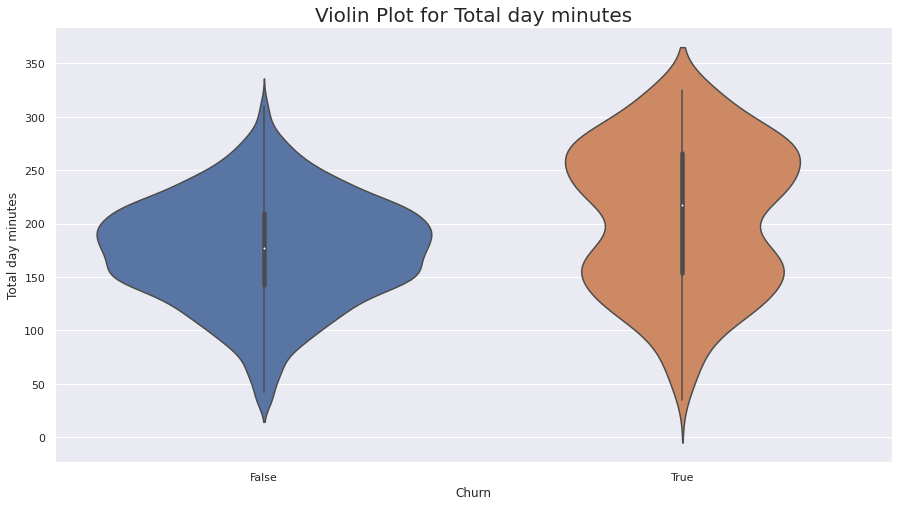

In [169]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Total day minutes").set_title('Violin Plot for Total day minutes',fontsize=20)

In [170]:
fig = px.violin(churn, x="Churn", y="Total day minutes")
fig.show()

Text(0.5, 1.0, 'Strip Plot for Total day calls')

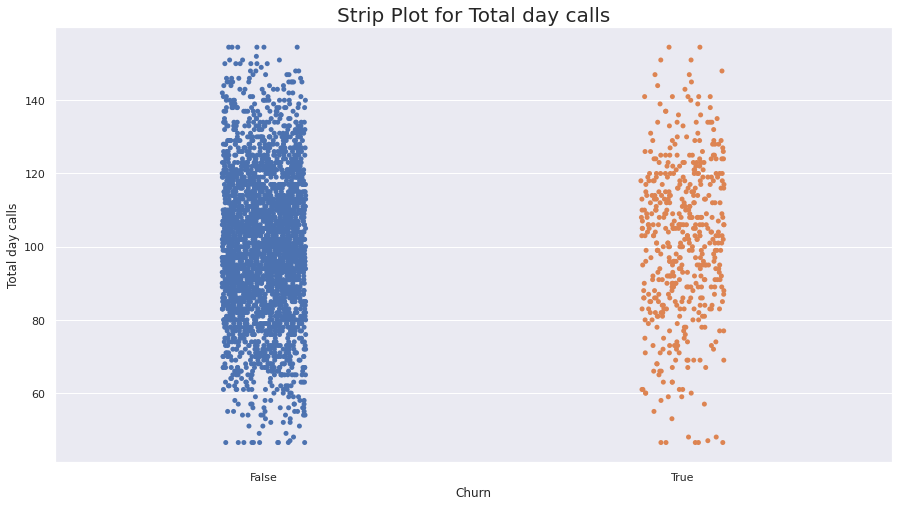

In [171]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Total day calls").set_title('Strip Plot for Total day calls',fontsize=20)

In [172]:
fig = px.strip(churn, x="Churn", y="Total day calls")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Total day calls')

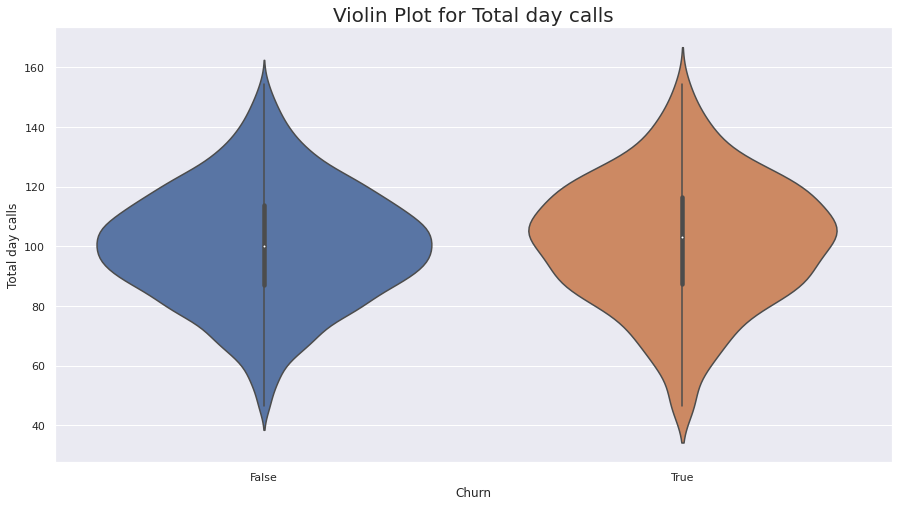

In [173]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Total day calls").set_title('Violin Plot for Total day calls',fontsize=20)

In [174]:
fig = px.violin(churn, x="Churn", y="Total day calls")
fig.show()

Text(0.5, 1.0, 'Strip Plot for Total day charge')

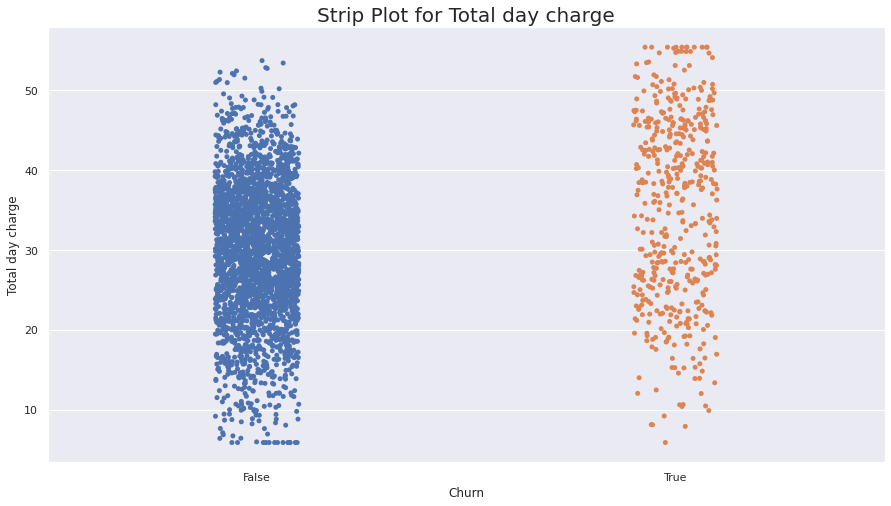

In [175]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Total day charge").set_title('Strip Plot for Total day charge',fontsize=20)

In [176]:
fig = px.strip(churn, x="Churn", y="Total day charge")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Total day charge')

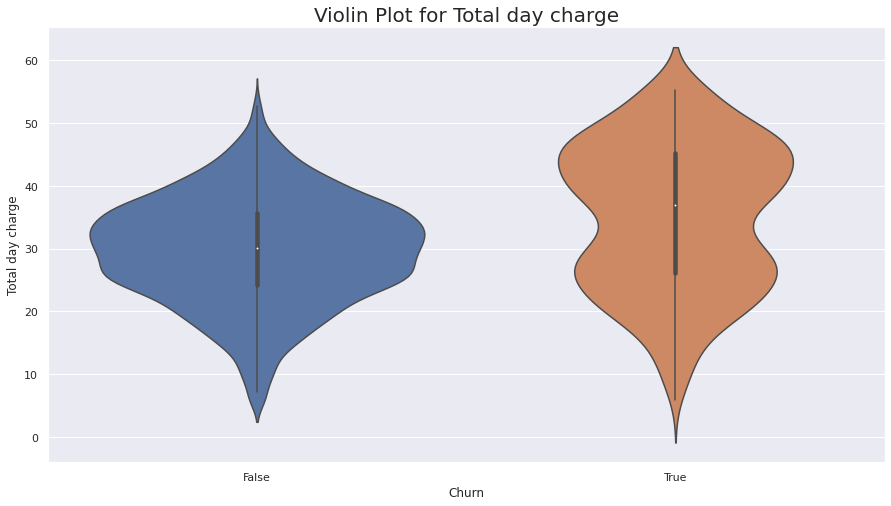

In [177]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Total day charge").set_title('Violin Plot for Total day charge',fontsize=20)

In [178]:
fig = px.violin(churn, x="Churn", y="Total day charge")
fig.show()

Text(0.5, 1.0, 'Strip Plot for Total eve minutes')

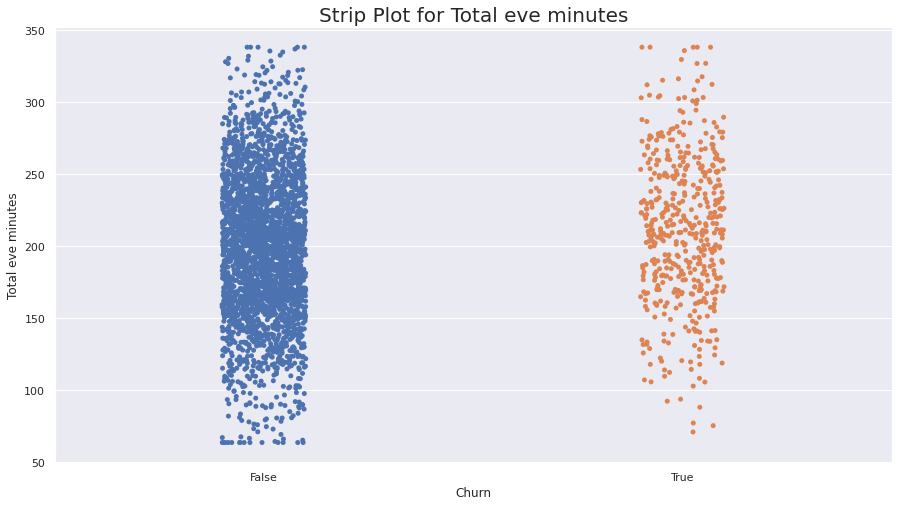

In [179]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Total eve minutes").set_title('Strip Plot for Total eve minutes',fontsize=20)

In [180]:
fig = px.strip(churn, x="Churn", y="Total eve minutes")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Total eve minutes')

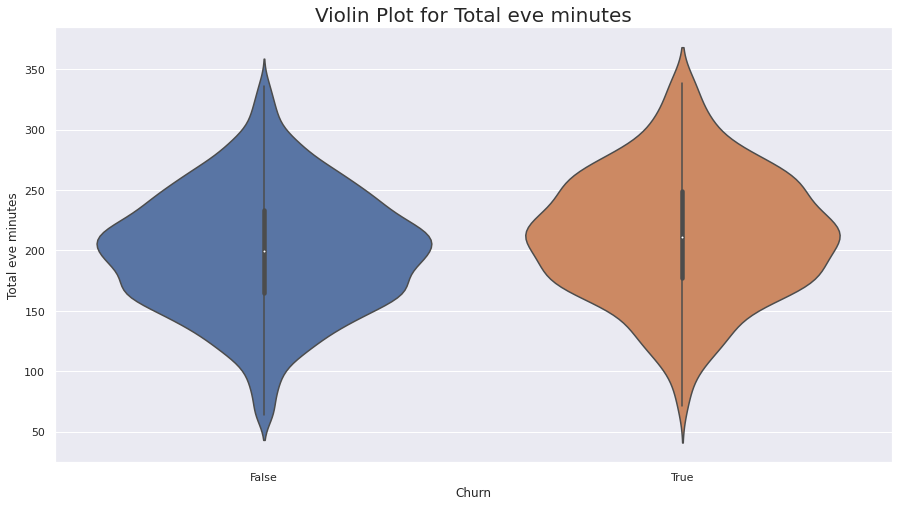

In [181]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Total eve minutes").set_title('Violin Plot for Total eve minutes',fontsize=20)

In [182]:
fig = px.violin(churn, x="Churn", y="Total eve minutes")
fig.show()

Text(0.5, 1.0, 'Strip Plot for Total eve calls')

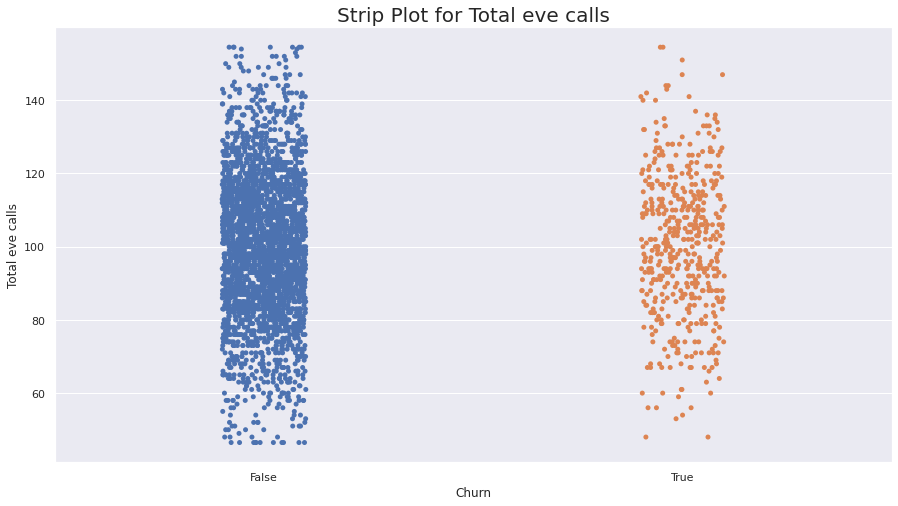

In [183]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Total eve calls").set_title('Strip Plot for Total eve calls',fontsize=20)

In [184]:
fig = px.strip(churn, x="Churn", y="Total eve calls")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Total eve calls')

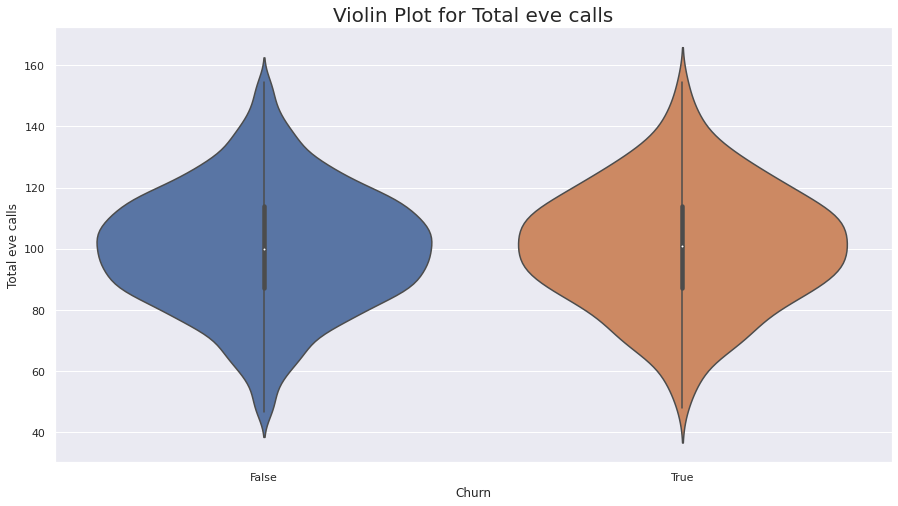

In [185]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Total eve calls").set_title('Violin Plot for Total eve calls',fontsize=20)

In [186]:
fig = px.violin(churn, x="Churn", y="Total eve calls")
fig.show()

Text(0.5, 1.0, 'Strip Plot for Total eve charge')

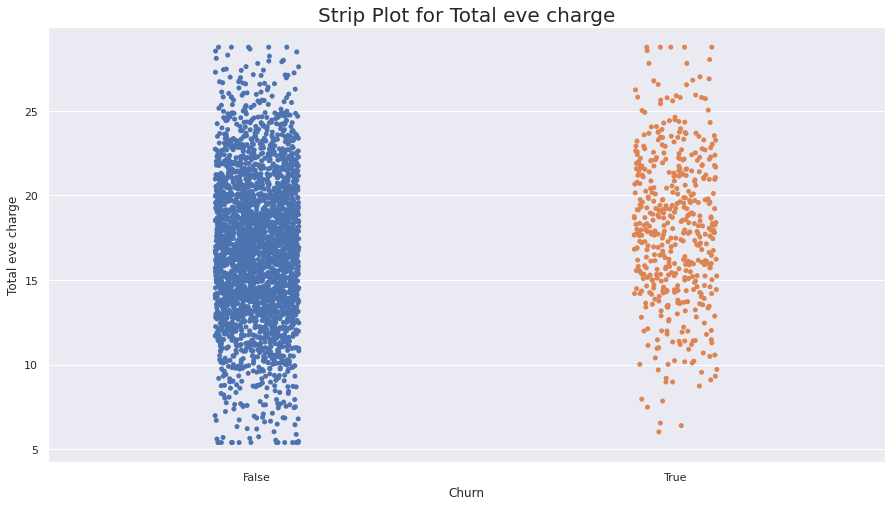

In [187]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Total eve charge").set_title('Strip Plot for Total eve charge',fontsize=20)

In [188]:
fig = px.strip(churn, x="Churn", y="Total eve charge")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Total eve charge')

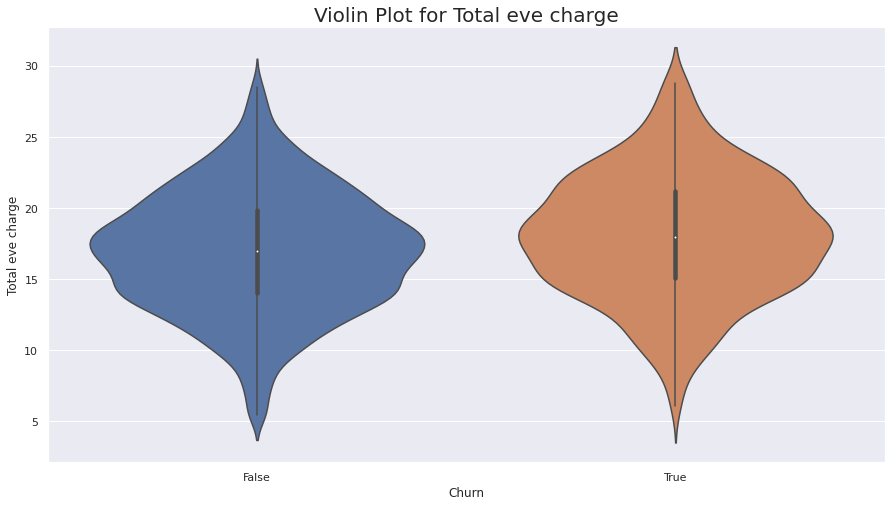

In [189]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Total eve charge").set_title('Violin Plot for Total eve charge',fontsize=20)

In [190]:
fig = px.violin(churn, x="Churn", y="Total night minutes")
fig.show()

Text(0.5, 1.0, 'Strip Plot for Total night minutes')

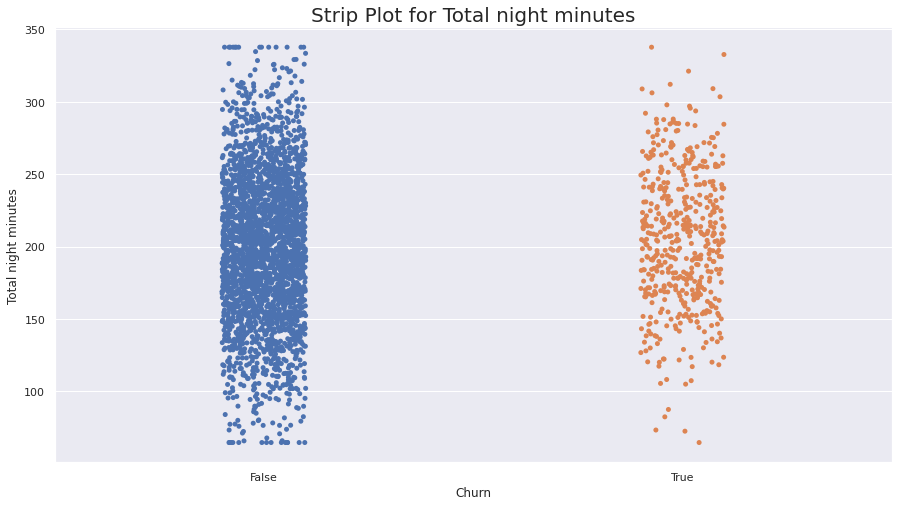

In [191]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Total night minutes").set_title('Strip Plot for Total night minutes',fontsize=20)

In [192]:
fig = px.strip(churn, x="Churn", y="Total night minutes")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Total night minutes')

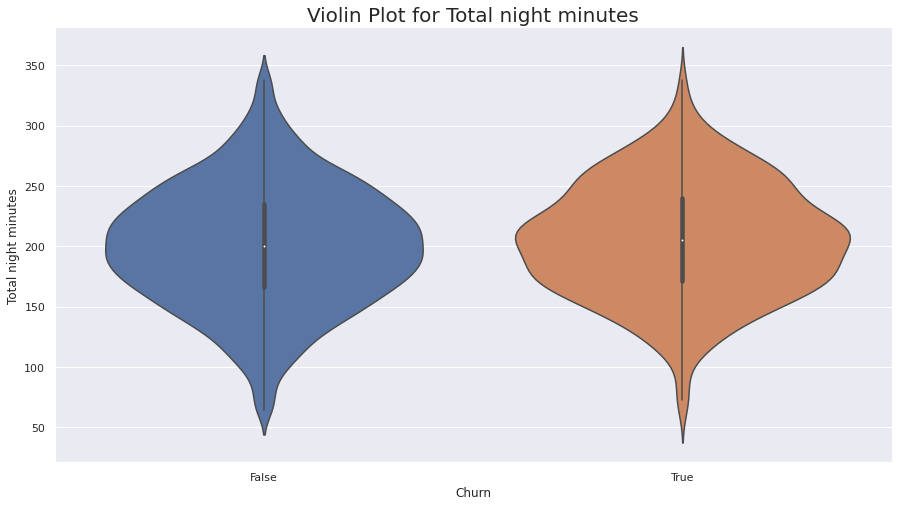

In [193]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Total night minutes").set_title('Violin Plot for Total night minutes',fontsize=20)

In [194]:
fig = px.violin(churn, x="Churn", y="Total night minutes")
fig.show()

Text(0.5, 1.0, 'Strip Plot for Total night calls')

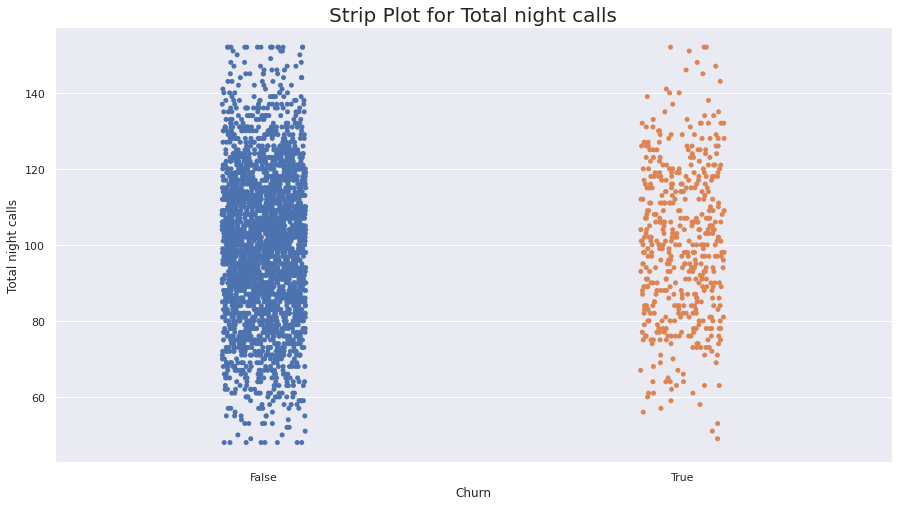

In [195]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Total night calls").set_title('Strip Plot for Total night calls',fontsize=20)

In [196]:
fig = px.strip(churn, x="Churn", y="Total night calls")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Total night calls')

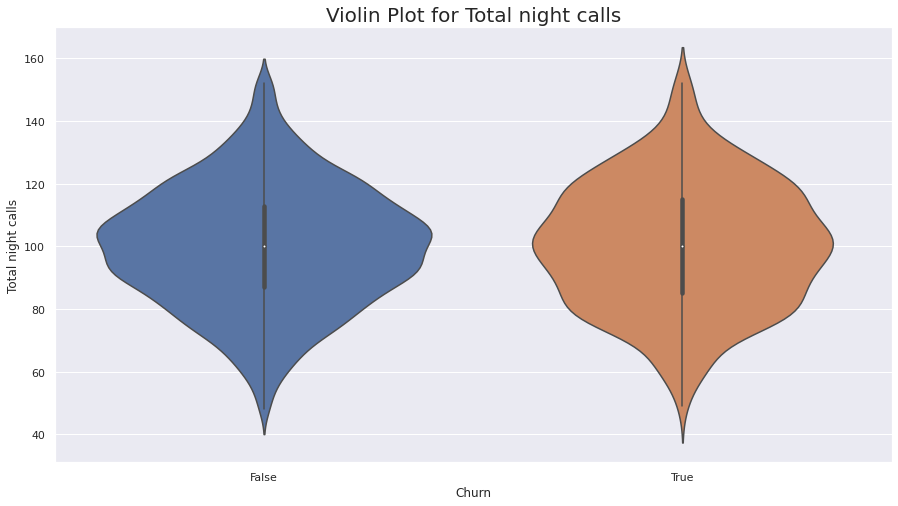

In [197]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Total night calls").set_title('Violin Plot for Total night calls',fontsize=20)

In [198]:
fig = px.violin(churn, x="Churn", y="Total night calls")
fig.show()

Text(0.5, 1.0, 'Strip Plot for Total night charge')

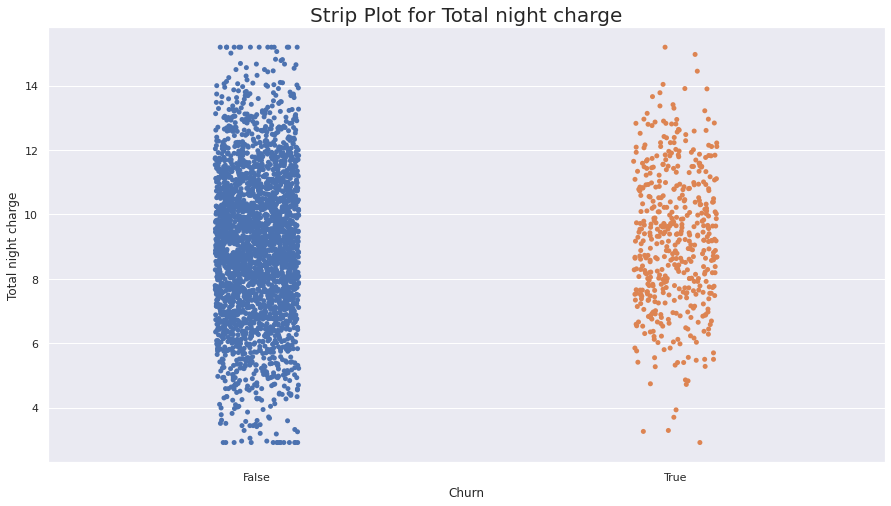

In [199]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Total night charge").set_title('Strip Plot for Total night charge',fontsize=20)

In [200]:
fig = px.strip(churn, x="Churn", y="Total night charge")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Total night charge')

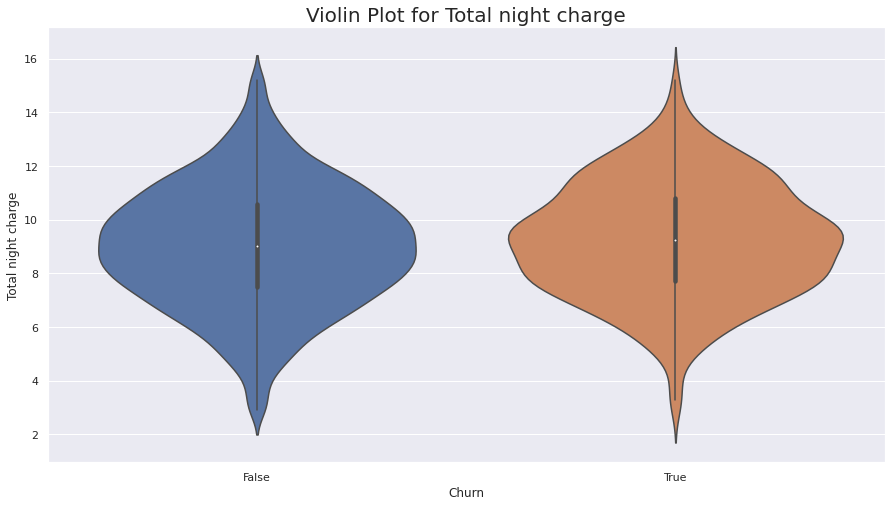

In [201]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Total night charge").set_title('Violin Plot for Total night charge',fontsize=20)

In [202]:
fig = px.violin(churn, x="Churn", y="Total night charge")
fig.show()

Text(0.5, 1.0, 'Strip Plot for Total intl minutes')

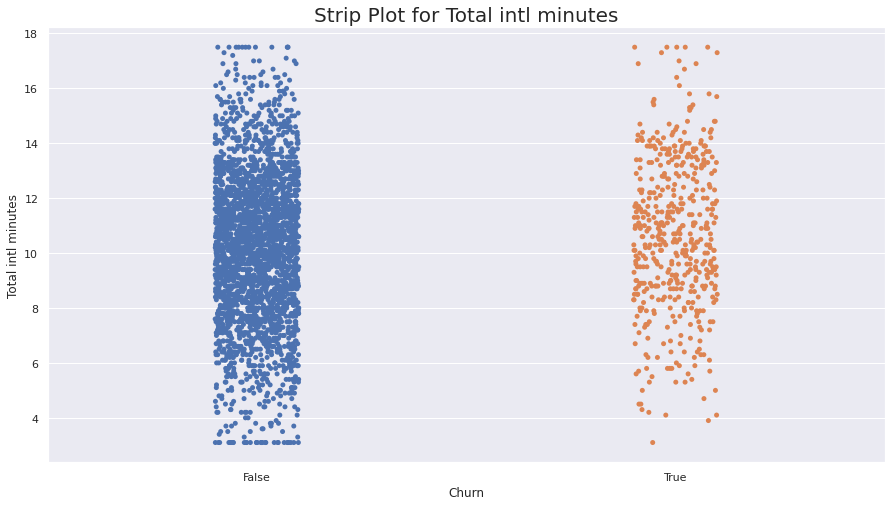

In [203]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Total intl minutes").set_title('Strip Plot for Total intl minutes',fontsize=20)

In [204]:
fig = px.strip(churn, x="Churn", y="Total intl minutes")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Total intl minutes')

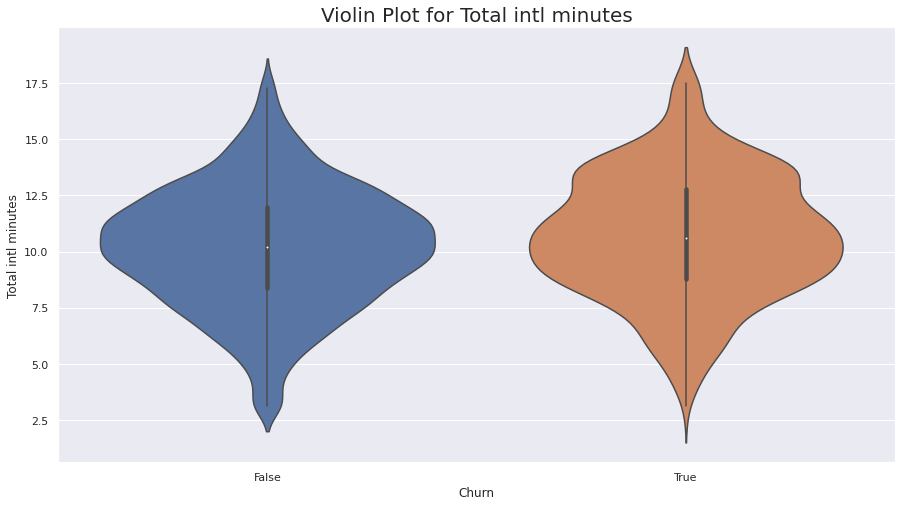

In [205]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Total intl minutes").set_title('Violin Plot for Total intl minutes',fontsize=20)

In [206]:
fig = px.violin(churn, x="Churn", y="Total intl minutes")
fig.show()

Text(0.5, 1.0, 'Strip Plot for Total intl calls')

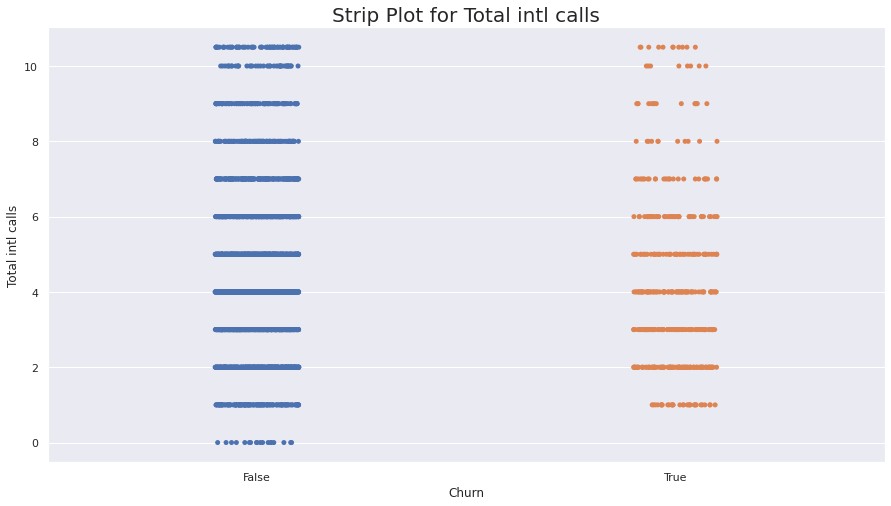

In [207]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Total intl calls").set_title('Strip Plot for Total intl calls',fontsize=20)

In [208]:
fig = px.strip(churn, x="Churn", y="Total intl calls")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Total intl calls')

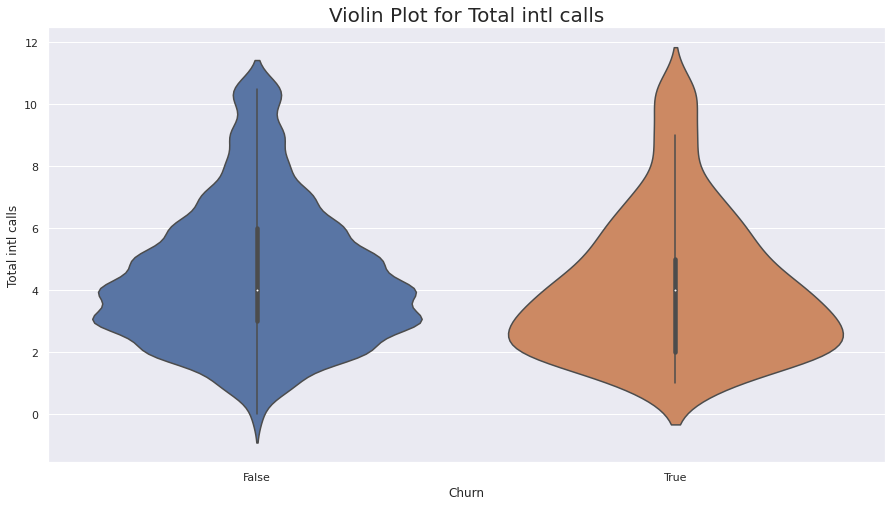

In [209]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Total intl calls").set_title('Violin Plot for Total intl calls',fontsize=20)

In [210]:
fig = px.violin(churn, x="Churn", y="Total intl calls")
fig.show()

Text(0.5, 1.0, 'Strip Plot for Total intl charge')

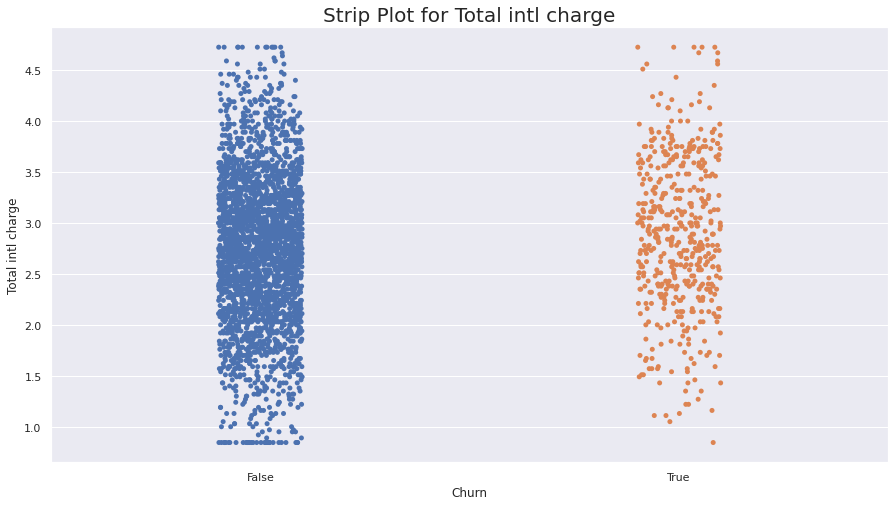

In [211]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Total intl charge").set_title('Strip Plot for Total intl charge',fontsize=20)

In [212]:
fig = px.strip(churn, x="Churn", y="Total intl charge")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Total intl charge')

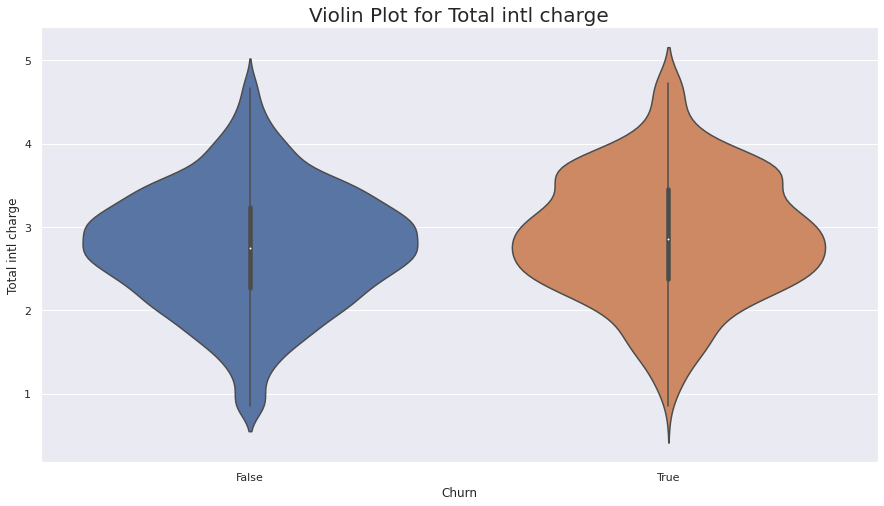

In [213]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Total intl charge").set_title('Violin Plot for Total intl charge',fontsize=20)

In [214]:
fig = px.violin(churn, x="Churn", y="Total intl charge")
fig.show()

Text(0.5, 1.0, 'Strip Plot for Customer service calls')

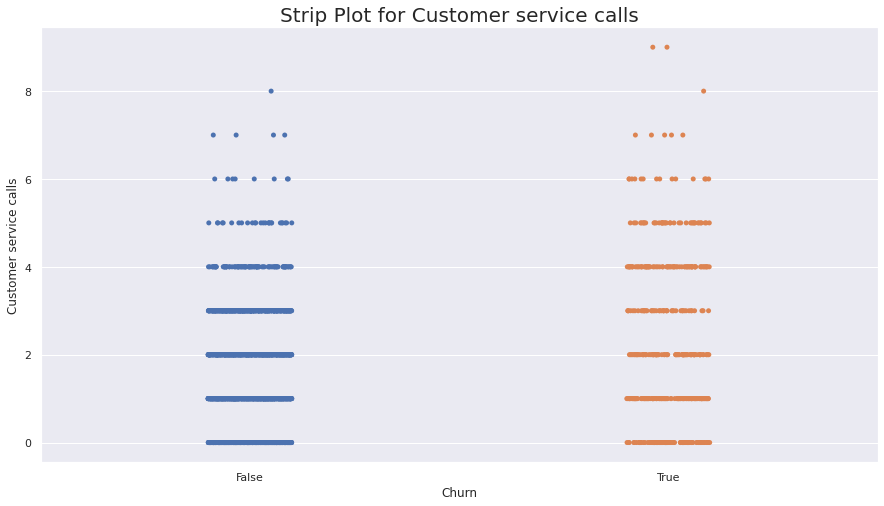

In [215]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.stripplot(data=churn,x="Churn",y="Customer service calls").set_title('Strip Plot for Customer service calls',fontsize=20)

In [216]:
fig = px.strip(churn, x="Churn", y="Customer service calls")
fig.show()

Text(0.5, 1.0, 'Violin Plot for Customer service calls')

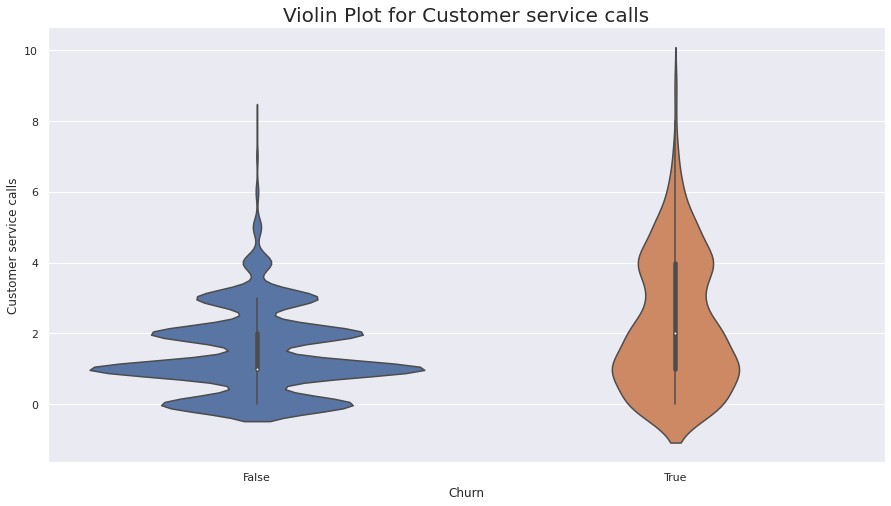

In [217]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.violinplot(data=churn,x="Churn", y="Customer service calls").set_title('Violin Plot for Customer service calls',fontsize=20)

In [218]:
fig = px.violin(churn, x="Churn", y="Customer service calls")
fig.show()

### Relation of the columns 'International plan' and 'Voice mail plan' with the target column 'Churn'.

In [219]:
px.histogram(churn, x='Churn', color="International plan", barmode='group')

In [220]:
px.histogram(churn, x='Churn', color="Voice mail plan", barmode='group')

### Statewise comparison of Customer churning  

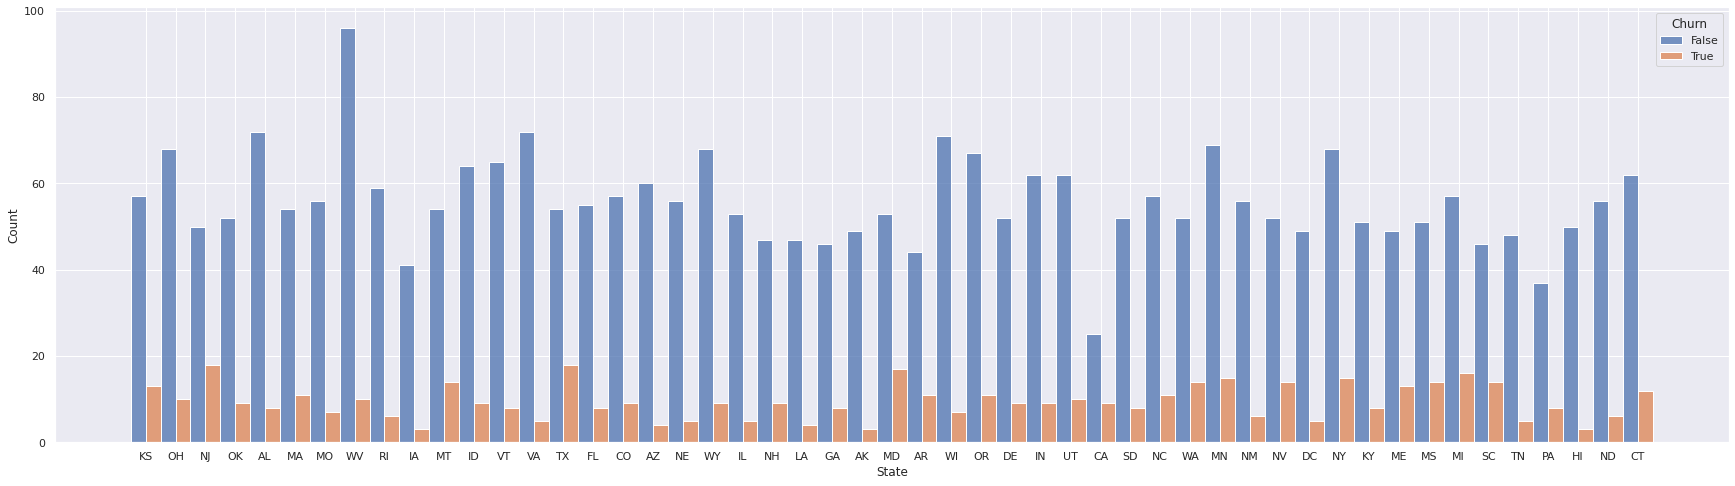

In [221]:
sns.set(rc = {'figure.figsize':(30,8)})
sns.histplot(churn, hue='Churn', x="State", multiple="dodge")

### Feature Selection using Heat Map

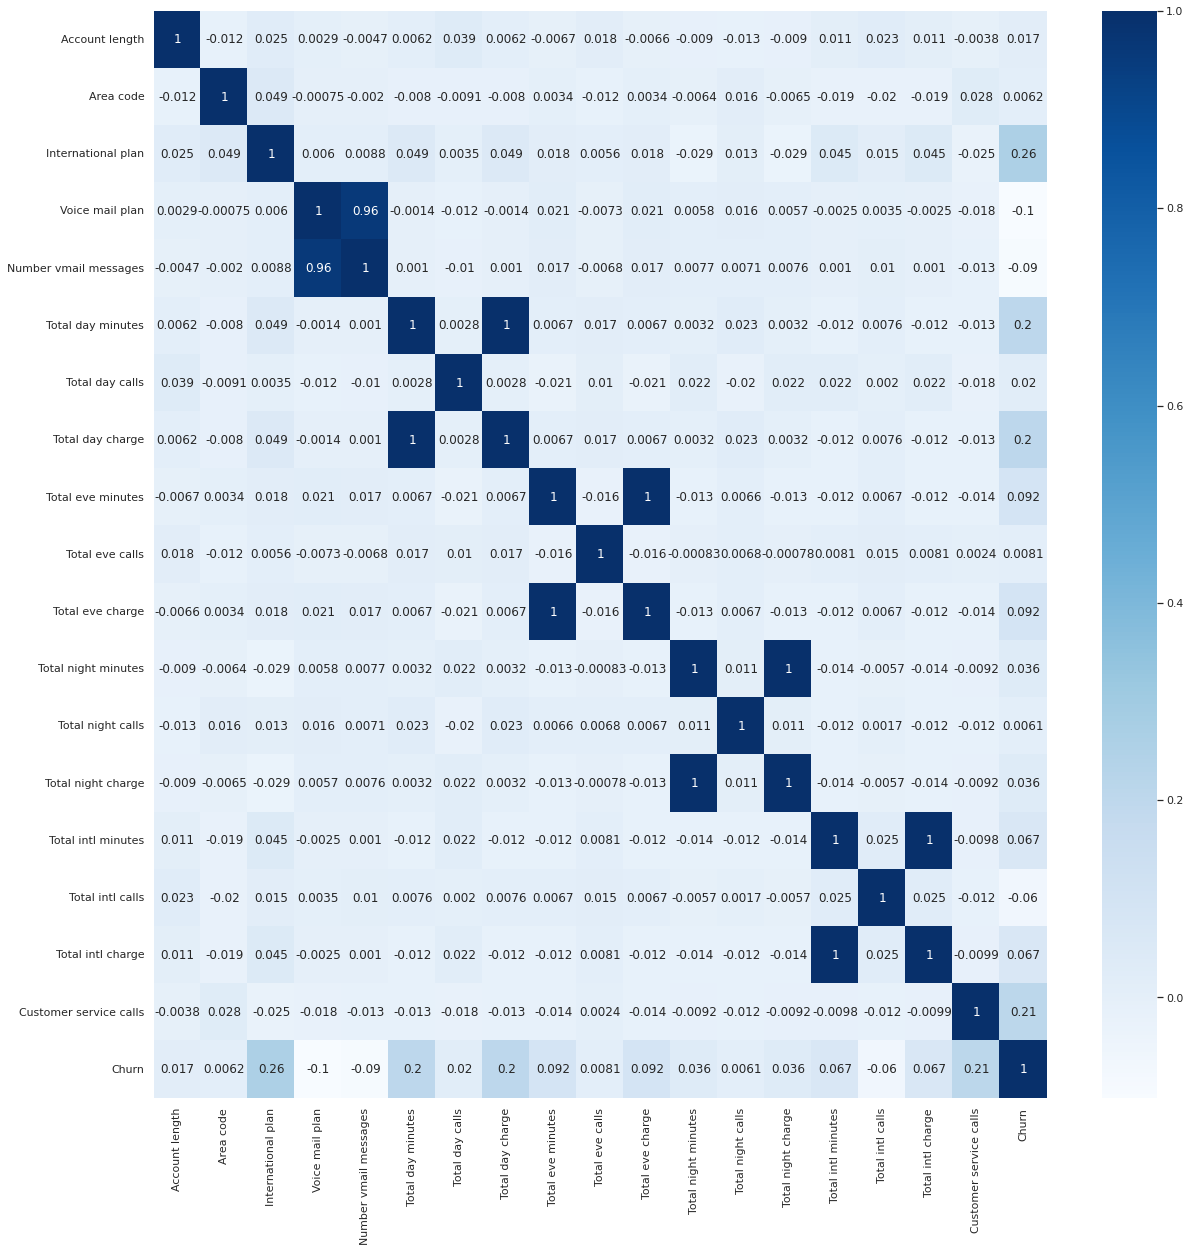

In [222]:
plt.figure(figsize=(20,20))
sns.heatmap(churn.corr(),cbar=True,annot=True,cmap='Blues')
results_path = 'results.png'
plt.savefig(results_path)

Removing Unnecessary columns -

In [223]:
X = churn.drop(['Account length','Area code','State','Number vmail messages','Total day minutes','Total eve minutes','Total night minutes','Total intl minutes','Churn'],axis=1)
Y = churn['Churn']

Splitting the dataset in training and test data in the ratio of 80:20.

In [224]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y , test_size=0.2,random_state=3)

Normalizing the training and test dataset.

In [225]:
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Data Augmentation for the dataset.

In [226]:
sm=SMOTE(random_state=42)
X_train, Y_train=sm.fit_resample(X_train, Y_train)

In [227]:
X_Full=np.hstack((X_train,Y_train.values.reshape(-1,1)))

In [228]:
S_df=pd.DataFrame(X_Full,columns=[1,2,3,4,5,6,7,8,9,10,11,'Churn'])
S_df.shape

(4562, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



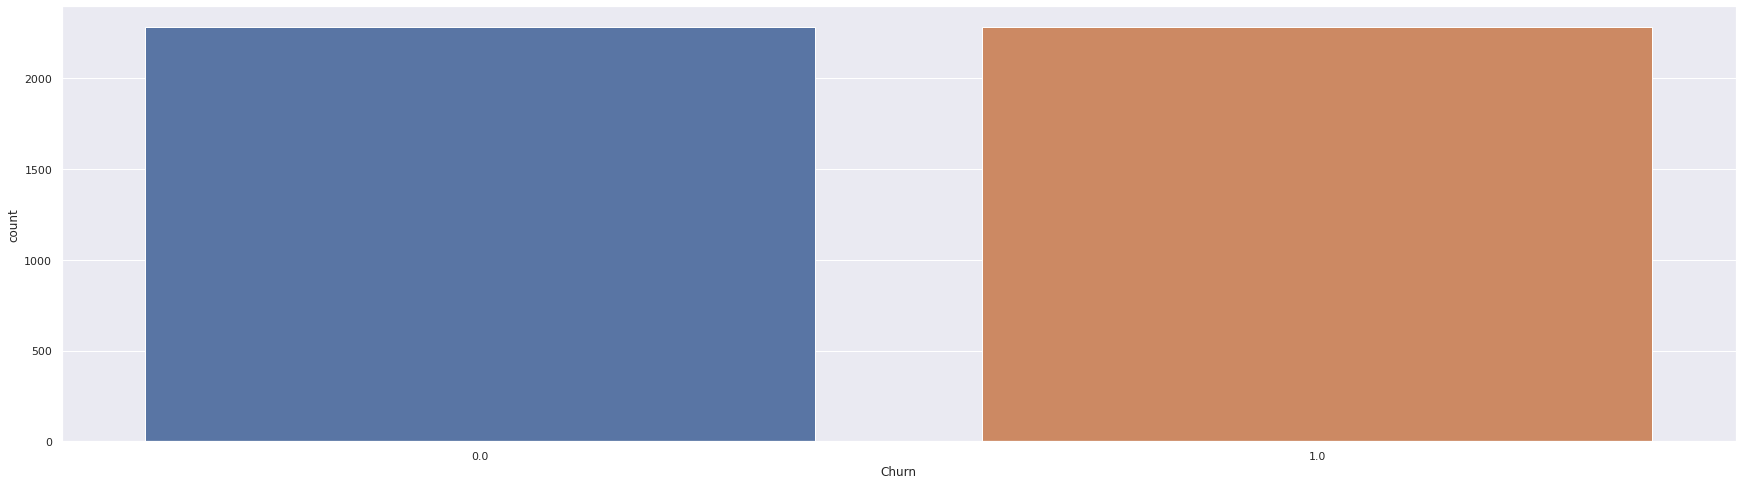

In [229]:
sns.countplot('Churn', data=S_df)
plt.show()

Equal number of instances for each category after data augmentation. 

In [230]:
acc_DF = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

#### SVM

In [231]:
svm_model = SVC(kernel='linear',random_state=0)
svm_model.fit(X_train,Y_train)
Svm_test_pred = svm_model.predict(X_test)
Svm_test_acc = metrics.accuracy_score(Y_test, Svm_test_pred)
print("Accuracy for Test Data:",Svm_test_acc)
Svm_train_pred = svm_model.predict(X_train)
Svm_train_acc = metrics.accuracy_score(Y_train, Svm_train_pred)
print("Accuracy for Training Data:",Svm_train_acc)

Accuracy for Test Data: 0.7406296851574213
Accuracy for Training Data: 0.7722490135905304


In [232]:
acc_DF.loc[len(acc_DF.index)] = ['SVM', Svm_train_acc, Svm_test_acc]

In [233]:
print(confusion_matrix(Y_test,Svm_test_pred))
print(classification_report(Y_test,Svm_test_pred))

[[414 155]
 [ 18  80]]
              precision    recall  f1-score   support

       False       0.96      0.73      0.83       569
        True       0.34      0.82      0.48        98

    accuracy                           0.74       667
   macro avg       0.65      0.77      0.65       667
weighted avg       0.87      0.74      0.78       667



In [234]:
print(confusion_matrix(Y_train,Svm_train_pred))
print(classification_report(Y_train,Svm_train_pred))

[[1711  570]
 [ 469 1812]]
              precision    recall  f1-score   support

       False       0.78      0.75      0.77      2281
        True       0.76      0.79      0.78      2281

    accuracy                           0.77      4562
   macro avg       0.77      0.77      0.77      4562
weighted avg       0.77      0.77      0.77      4562



#### Linear Discriminant Analysis -

In [235]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
lda_test_pred = lda.predict(X_test)
lda_test_acc = metrics.accuracy_score(Y_test, lda_test_pred)
print("Accuracy for Test Data:", lda_test_acc)
lda_train_pred = lda.predict(X_train)
lda_train_acc = metrics.accuracy_score(Y_train, lda_train_pred)
print("Accuracy for Training Data:", lda_train_acc)

Accuracy for Test Data: 0.7571214392803598
Accuracy for Training Data: 0.7683033757124068


In [236]:
acc_DF.loc[len(acc_DF.index)] = ['Linear Discriminant Analysis', lda_train_acc, lda_test_acc]

In [237]:
print(confusion_matrix(Y_train,lda_train_pred))
print(classification_report(Y_train,lda_train_pred))

[[1744  537]
 [ 520 1761]]
              precision    recall  f1-score   support

       False       0.77      0.76      0.77      2281
        True       0.77      0.77      0.77      2281

    accuracy                           0.77      4562
   macro avg       0.77      0.77      0.77      4562
weighted avg       0.77      0.77      0.77      4562



In [238]:
print(confusion_matrix(Y_test,lda_test_pred))
print(classification_report(Y_test,lda_test_pred))

[[426 143]
 [ 19  79]]
              precision    recall  f1-score   support

       False       0.96      0.75      0.84       569
        True       0.36      0.81      0.49        98

    accuracy                           0.76       667
   macro avg       0.66      0.78      0.67       667
weighted avg       0.87      0.76      0.79       667



#### Logistic Regression

In [239]:
lrmodel = LogisticRegression(penalty='l2',tol=0.0001,solver='liblinear',max_iter=100,random_state=0)
lrmodel.fit(X_train,Y_train)
lr_test_pred = lrmodel.predict(X_test)
lr_test_acc = metrics.accuracy_score(Y_test, lr_test_pred)
print("Accuracy for Test Data:",lr_test_acc)
lr_train_pred = lrmodel.predict(X_train)
lr_train_acc = metrics.accuracy_score(Y_train, lr_train_pred)
print("Accuracy for Training Data:",lr_train_acc)

Accuracy for Test Data: 0.7586206896551724
Accuracy for Training Data: 0.7691801841297676


In [240]:
acc_DF.loc[len(acc_DF.index)] = ['Logistic Regression', lr_train_acc, lr_test_acc]

In [241]:
print(confusion_matrix(Y_test,lr_test_pred))
print(classification_report(Y_test,lr_test_pred))

[[427 142]
 [ 19  79]]
              precision    recall  f1-score   support

       False       0.96      0.75      0.84       569
        True       0.36      0.81      0.50        98

    accuracy                           0.76       667
   macro avg       0.66      0.78      0.67       667
weighted avg       0.87      0.76      0.79       667



In [242]:
print(confusion_matrix(Y_train,lr_train_pred))
print(classification_report(Y_train,lr_train_pred))

[[1749  532]
 [ 521 1760]]
              precision    recall  f1-score   support

       False       0.77      0.77      0.77      2281
        True       0.77      0.77      0.77      2281

    accuracy                           0.77      4562
   macro avg       0.77      0.77      0.77      4562
weighted avg       0.77      0.77      0.77      4562



#### Ensemble Learning Model using Linear Discriminant, Random Forest classifier, XGBClassifier and Logistic Regression -

Ensemble learning model - Voting

In [243]:
model_1 = LinearDiscriminantAnalysis()
model_2 = LogisticRegression(penalty='l2',tol=0.0001,solver='liblinear',max_iter=100,random_state=0)
model_3 = XGBClassifier()
model_4 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)

In [244]:
final_model1 = VotingClassifier(estimators=[('lda',model_1),('lr', model_2), ('xgb', model_3), ('rf', model_4)], voting='hard')
final_model1.fit(X_train, Y_train)
En1_test_pred = final_model1.predict(X_test)
En1_test_acc = metrics.accuracy_score(Y_test, En1_test_pred)
print("Accuracy for Test Data:", En1_test_acc)
En1_train_pred = final_model1.predict(X_train)
En1_train_acc = metrics.accuracy_score(Y_train, En1_train_pred)
print("Accuracy for Training Data:", En1_train_acc)

Accuracy for Test Data: 0.9370314842578711
Accuracy for Training Data: 0.8781236299868479


In [245]:
acc_DF.loc[len(acc_DF.index)] = ['Ensemble (LDA, LR, XGB, RFC)', En1_train_acc, En1_test_acc]

In [246]:
print(confusion_matrix(Y_test,En1_test_pred))
print(classification_report(Y_test,En1_test_pred))

[[549  20]
 [ 22  76]]
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       569
        True       0.79      0.78      0.78        98

    accuracy                           0.94       667
   macro avg       0.88      0.87      0.87       667
weighted avg       0.94      0.94      0.94       667



In [247]:
print(confusion_matrix(Y_train,En1_train_pred))
print(classification_report(Y_train,En1_train_pred))

[[2235   46]
 [ 510 1771]]
              precision    recall  f1-score   support

       False       0.81      0.98      0.89      2281
        True       0.97      0.78      0.86      2281

    accuracy                           0.88      4562
   macro avg       0.89      0.88      0.88      4562
weighted avg       0.89      0.88      0.88      4562



#### XGB Classifier

In [248]:
xgbCF = XGBClassifier()
xgbCF.fit(X_train,Y_train)
xgb_test_pred = xgbCF.predict(X_test)
xgb_test_acc = metrics.accuracy_score(Y_test, xgb_test_pred)
print("Accuracy for Test Data:",xgb_test_acc)
xgb_train_pred = xgbCF.predict(X_train)
xgb_train_acc = metrics.accuracy_score(Y_train, xgb_train_pred)
print("Accuracy for Training Data:",xgb_train_acc)

Accuracy for Test Data: 0.9430284857571214
Accuracy for Training Data: 0.958790004384042


In [249]:
acc_DF.loc[len(acc_DF.index)] = ['XGB Classifier', xgb_train_acc, xgb_test_acc]

In [250]:
print(confusion_matrix(Y_test,xgb_test_pred))
print(classification_report(Y_test,xgb_test_pred))

[[548  21]
 [ 17  81]]
              precision    recall  f1-score   support

       False       0.97      0.96      0.97       569
        True       0.79      0.83      0.81        98

    accuracy                           0.94       667
   macro avg       0.88      0.89      0.89       667
weighted avg       0.94      0.94      0.94       667



In [251]:
print(confusion_matrix(Y_train,xgb_train_pred))
print(classification_report(Y_train,xgb_train_pred))

[[2228   53]
 [ 135 2146]]
              precision    recall  f1-score   support

       False       0.94      0.98      0.96      2281
        True       0.98      0.94      0.96      2281

    accuracy                           0.96      4562
   macro avg       0.96      0.96      0.96      4562
weighted avg       0.96      0.96      0.96      4562



#### Ensemble Learning Model using Random Forest classifier and XGBClassifier -

In [252]:
model_1 = XGBClassifier()
model_2 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)

In [253]:
final_model2 = VotingClassifier(estimators=[('xgb', model_1), ('rf', model_2)], voting='hard')
final_model2.fit(X_train, Y_train)
En2_test_pred = final_model2.predict(X_test)
En2_test_acc = metrics.accuracy_score(Y_test, En2_test_pred)
print("Accuracy for Test Data:", En2_test_acc)
En2_train_pred = final_model2.predict(X_train)
En2_train_acc = metrics.accuracy_score(Y_train, En2_train_pred)
print("Accuracy for Training Data:", En2_train_acc)

Accuracy for Test Data: 0.9505247376311844
Accuracy for Training Data: 0.9704077159140728


In [254]:
acc_DF.loc[len(acc_DF.index)] = ['Ensemble (XGB, RFC)', En2_train_acc, En2_test_acc]

In [255]:
print(confusion_matrix(Y_test,En2_test_pred))
print(classification_report(Y_test,En2_test_pred))

[[554  15]
 [ 18  80]]
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       569
        True       0.84      0.82      0.83        98

    accuracy                           0.95       667
   macro avg       0.91      0.89      0.90       667
weighted avg       0.95      0.95      0.95       667



In [256]:
print(confusion_matrix(Y_train,En2_train_pred))
print(classification_report(Y_train,En2_train_pred))

[[2281    0]
 [ 135 2146]]
              precision    recall  f1-score   support

       False       0.94      1.00      0.97      2281
        True       1.00      0.94      0.97      2281

    accuracy                           0.97      4562
   macro avg       0.97      0.97      0.97      4562
weighted avg       0.97      0.97      0.97      4562



#### Random Forest Classifier

In [257]:
Rfmodel = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
Rfmodel.fit(X_train,Y_train)
Rf_test_pred = Rfmodel.predict(X_test)
Rf_test_acc = metrics.accuracy_score(Y_test, Rf_test_pred)
print("Accuracy for Test Data:",Rf_test_acc)
Rf_train_pred = Rfmodel.predict(X_train)
Rf_train_acc = metrics.accuracy_score(Y_train, Rf_train_pred)
print("Accuracy for Training Data:",Rf_train_acc)

Accuracy for Test Data: 0.9550224887556222
Accuracy for Training Data: 1.0


In [258]:
acc_DF.loc[len(acc_DF.index)] = ['Random Forest Classifier', Rf_train_acc, Rf_test_acc]

In [259]:
print(confusion_matrix(Y_test,Rf_test_pred))
print(classification_report(Y_test,Rf_test_pred))

[[551  18]
 [ 12  86]]
              precision    recall  f1-score   support

       False       0.98      0.97      0.97       569
        True       0.83      0.88      0.85        98

    accuracy                           0.96       667
   macro avg       0.90      0.92      0.91       667
weighted avg       0.96      0.96      0.96       667



In [260]:
print(confusion_matrix(Y_train,Rf_train_pred))
print(classification_report(Y_train,Rf_train_pred))

[[2281    0]
 [   0 2281]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2281
        True       1.00      1.00      1.00      2281

    accuracy                           1.00      4562
   macro avg       1.00      1.00      1.00      4562
weighted avg       1.00      1.00      1.00      4562



#### Comparison of Models

In [261]:
acc_DF

Model  Train Accuracy  Test Accuracy
0                           SVM        0.772249       0.740630
1  Linear Discriminant Analysis        0.768303       0.757121
2           Logistic Regression        0.769180       0.758621
3  Ensemble (LDA, LR, XGB, RFC)        0.878124       0.937031
4                XGB Classifier        0.958790       0.943028
5           Ensemble (XGB, RFC)        0.970408       0.950525
6      Random Forest Classifier        1.000000       0.955022

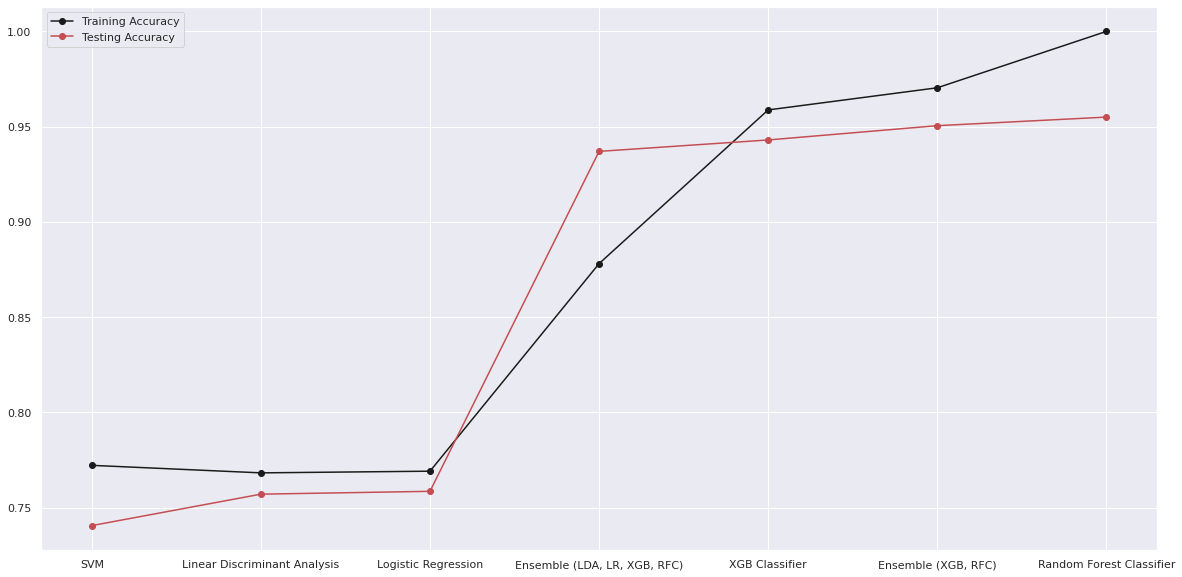

In [262]:
plt.figure(figsize=(20,10))
plt.plot(acc_DF['Model'], acc_DF['Train Accuracy'],'ko-',label='Training Accuracy')
plt.plot(acc_DF['Model'], acc_DF['Test Accuracy'],'ro-',label='Testing Accuracy')
plt.legend()

### Feature Selection by selecting K-best features using f_classif score function

In [263]:
X = churn.drop(['State','Churn'],axis=1)
Y = churn['Churn']

In [264]:
fs = SelectKBest(score_func=f_classif, k=10)
X_selected = fs.fit_transform(X, Y)

In [265]:
X

Account length  Area code  International plan  Voice mail plan  \
0                128        415                   0                1   
1                107        415                   0                1   
2                137        415                   0                0   
3                 84        408                   1                0   
4                 75        415                   1                0   
...              ...        ...                 ...              ...   
3328             114        415                   0                1   
3329             106        408                   0                1   
3330              60        415                   0                0   
3331             159        415                   0                0   
3332             184        510                   1                0   

      Number vmail messages  Total day minutes  Total day calls  \
0                      25.0              265.1            110.0   
1                      26.0              161.6            123.0   
2                       0.0              243.4            114.0   
3                       0.0              299.4             71.0   
4                       0.0              166.7            113.0   
...                     ...                ...              ...   
3328                   26.0              137.1             88.0   
3329                   29.0               83.6            131.0   
3330                    0.0              193.9            118.0   
3331                    0.0              169.8            114.0   
3332                    0.0              213.8            105.0   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07             197.40             99.0             16.78   
1                27.47             195.50            103.0             16.62   
2                41.38             121.20            110.0             10.30   
3                50.90              63.55             88.0              5.40   
4                28.34             148.30            122.0             12.61   
...                ...                ...              ...               ...   
3328             23.31             155.70            125.0             13.23   
3329             14.21             203.90            131.0             17.33   
3330             32.96              85.00            110.0              7.23   
3331             28.87             197.70            105.0             16.80   
3332             36.35             159.60             84.0             13.57   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7               91.0               11.01   
1                   254.4              103.0               11.45   
2                   162.6              104.0                7.32   
3                   196.9               89.0                8.86   
4                   186.9              121.0                8.41   
...                   ...                ...                 ...   
3328                247.6               94.0               11.14   
3329                229.5               73.0               10.33   
3330                210.1              134.0                9.45   
3331                193.7               82.0                8.72   
3332                139.2              137.0                6.26   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0               3.0               2.70   
1                   13.7               3.0               3.70   
2                   12.2               5.0               3.29   
3                    6.6               7.0               1.78   
4                   10.1               3.0               2.73   
...                  ...               ...                ...   
3328                11.5               7.0               3.11   
3329                 8.1              

In [266]:
X_selected[0]

array([  0.  ,   1.  ,  25.  , 265.1 ,  45.07, 197.4 ,  16.78,  10.  ,
         2.7 ,   1.  ])

By comparing the data in 'X' and 'X_selected', we can conclude that the features selected are - 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total intl minutes', 'Total intl charge' and 'Customer service calls'.

**Implmenting Prediction models -**

Splitting the dataset in training and test data in the ratio of 80:20.

In [267]:
X_train, X_test, Y_train, Y_test=train_test_split(X_selected, Y , test_size=0.2,random_state=3)

Normalizing the training and test dataset.

In [268]:
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Data Augmentation for the dataset.

In [269]:
sm=SMOTE(random_state=42)
X_train, Y_train=sm.fit_resample(X_train, Y_train)

In [270]:
X_Full=np.hstack((X_train,Y_train.values.reshape(-1,1)))

In [271]:
S_df=pd.DataFrame(X_Full,columns=[1,2,3,4,5,6,7,8,9,10,'Churn'])
S_df.shape

(4562, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



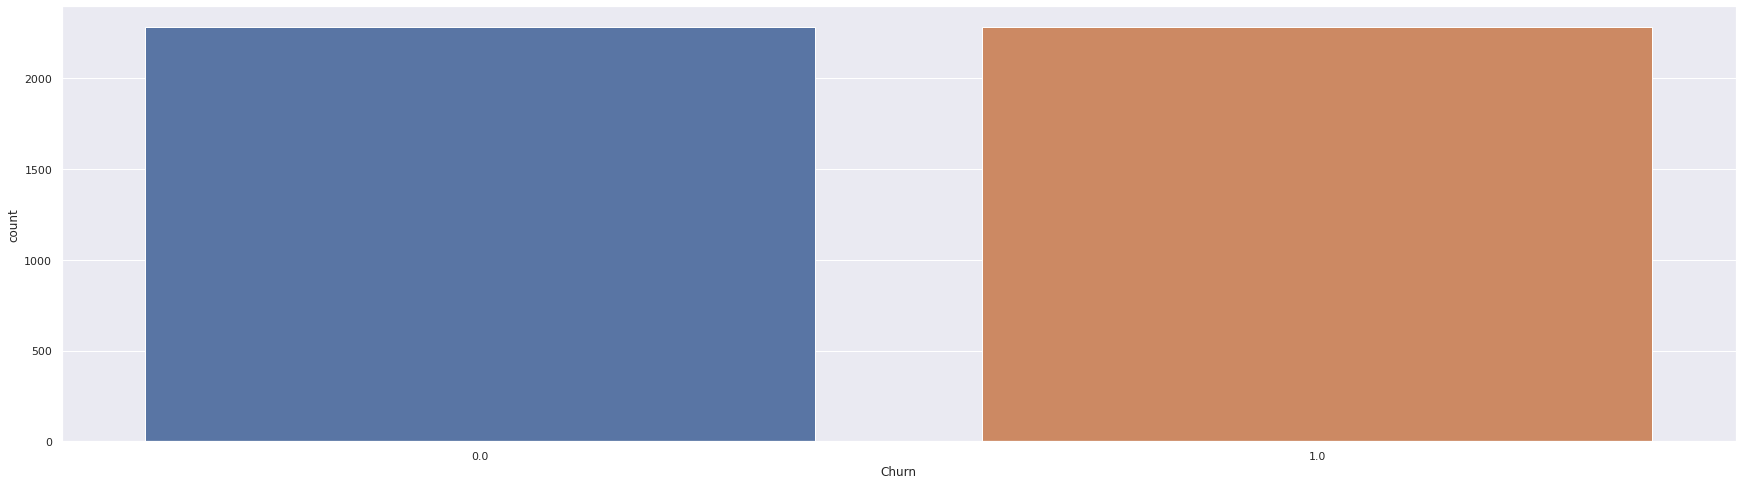

In [272]:
sns.countplot('Churn', data=S_df)
plt.show()

Equal number of instances for each category after data augmentation. 

In [273]:
acc_DF = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

#### SVM

In [274]:
svm_model = SVC(kernel='linear',random_state=0)
svm_model.fit(X_train,Y_train)
Svm_test_pred = svm_model.predict(X_test)
Svm_test_acc = metrics.accuracy_score(Y_test, Svm_test_pred)
print("Accuracy for Test Data:",Svm_test_acc)
Svm_train_pred = svm_model.predict(X_train)
Svm_train_acc = metrics.accuracy_score(Y_train, Svm_train_pred)
print("Accuracy for Training Data:",Svm_train_acc)

Accuracy for Test Data: 0.7421289355322339
Accuracy for Training Data: 0.7661113546690048


In [275]:
acc_DF.loc[len(acc_DF.index)] = ['SVM', Svm_train_acc, Svm_test_acc]

In [276]:
print(confusion_matrix(Y_test,Svm_test_pred))
print(classification_report(Y_test,Svm_test_pred))

[[414 155]
 [ 17  81]]
              precision    recall  f1-score   support

       False       0.96      0.73      0.83       569
        True       0.34      0.83      0.49        98

    accuracy                           0.74       667
   macro avg       0.65      0.78      0.66       667
weighted avg       0.87      0.74      0.78       667



In [277]:
print(confusion_matrix(Y_train,Svm_train_pred))
print(classification_report(Y_train,Svm_train_pred))

[[1709  572]
 [ 495 1786]]
              precision    recall  f1-score   support

       False       0.78      0.75      0.76      2281
        True       0.76      0.78      0.77      2281

    accuracy                           0.77      4562
   macro avg       0.77      0.77      0.77      4562
weighted avg       0.77      0.77      0.77      4562



#### Linear Discriminant Analysis -

In [278]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
lda_test_pred = lda.predict(X_test)
lda_test_acc = metrics.accuracy_score(Y_test, lda_test_pred)
print("Accuracy for Test Data:", lda_test_acc)
lda_train_pred = lda.predict(X_train)
lda_train_acc = metrics.accuracy_score(Y_train, lda_train_pred)
print("Accuracy for Training Data:", lda_train_acc)

Accuracy for Test Data: 0.7541229385307346
Accuracy for Training Data: 0.765234546251644


In [279]:
acc_DF.loc[len(acc_DF.index)] = ['Linear Discriminant Analysis', lda_train_acc, lda_test_acc]

In [280]:
print(confusion_matrix(Y_train,lda_train_pred))
print(classification_report(Y_train,lda_train_pred))

[[1757  524]
 [ 547 1734]]
              precision    recall  f1-score   support

       False       0.76      0.77      0.77      2281
        True       0.77      0.76      0.76      2281

    accuracy                           0.77      4562
   macro avg       0.77      0.77      0.77      4562
weighted avg       0.77      0.77      0.77      4562



In [281]:
print(confusion_matrix(Y_test,lda_test_pred))
print(classification_report(Y_test,lda_test_pred))

[[426 143]
 [ 21  77]]
              precision    recall  f1-score   support

       False       0.95      0.75      0.84       569
        True       0.35      0.79      0.48        98

    accuracy                           0.75       667
   macro avg       0.65      0.77      0.66       667
weighted avg       0.86      0.75      0.79       667



#### Logistic Regression

In [282]:
lrmodel = LogisticRegression(penalty='l2',tol=0.0001,solver='liblinear',max_iter=100,random_state=0)
lrmodel.fit(X_train,Y_train)
lr_test_pred = lrmodel.predict(X_test)
lr_test_acc = metrics.accuracy_score(Y_test, lr_test_pred)
print("Accuracy for Test Data:",lr_test_acc)
lr_train_pred = lrmodel.predict(X_train)
lr_train_acc = metrics.accuracy_score(Y_train, lr_train_pred)
print("Accuracy for Training Data:",lr_train_acc)

Accuracy for Test Data: 0.7511244377811095
Accuracy for Training Data: 0.7654537483559842


In [283]:
acc_DF.loc[len(acc_DF.index)] = ['Logistic Regression', lr_train_acc, lr_test_acc]

In [284]:
print(confusion_matrix(Y_test,lr_test_pred))
print(classification_report(Y_test,lr_test_pred))

[[423 146]
 [ 20  78]]
              precision    recall  f1-score   support

       False       0.95      0.74      0.84       569
        True       0.35      0.80      0.48        98

    accuracy                           0.75       667
   macro avg       0.65      0.77      0.66       667
weighted avg       0.87      0.75      0.78       667



In [285]:
print(confusion_matrix(Y_train,lr_train_pred))
print(classification_report(Y_train,lr_train_pred))

[[1754  527]
 [ 543 1738]]
              precision    recall  f1-score   support

       False       0.76      0.77      0.77      2281
        True       0.77      0.76      0.76      2281

    accuracy                           0.77      4562
   macro avg       0.77      0.77      0.77      4562
weighted avg       0.77      0.77      0.77      4562



#### Ensemble Learning Model using Linear Discriminant, Random Forest classifier, XGBClassifier and Logistic Regression -

Ensemble learning model - Voting

In [286]:
model_1 = LinearDiscriminantAnalysis()
model_2 = LogisticRegression(penalty='l2',tol=0.0001,solver='liblinear',max_iter=100,random_state=0)
model_3 = XGBClassifier()
model_4 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)

In [287]:
final_model1 = VotingClassifier(estimators=[('lda',model_1),('lr', model_2), ('xgb', model_3), ('rf', model_4)], voting='hard')
final_model1.fit(X_train, Y_train)
En1_test_pred = final_model1.predict(X_test)
En1_test_acc = metrics.accuracy_score(Y_test, En1_test_pred)
print("Accuracy for Test Data:", En1_test_acc)
En1_train_pred = final_model1.predict(X_train)
En1_train_acc = metrics.accuracy_score(Y_train, En1_train_pred)
print("Accuracy for Training Data:", En1_train_acc)

Accuracy for Test Data: 0.896551724137931
Accuracy for Training Data: 0.8568610258658483


In [288]:
acc_DF.loc[len(acc_DF.index)] = ['Ensemble (LDA, LR, XGB, RFC)', En1_train_acc, En1_test_acc]

In [289]:
print(confusion_matrix(Y_test,En1_test_pred))
print(classification_report(Y_test,En1_test_pred))

[[527  42]
 [ 27  71]]
              precision    recall  f1-score   support

       False       0.95      0.93      0.94       569
        True       0.63      0.72      0.67        98

    accuracy                           0.90       667
   macro avg       0.79      0.83      0.81       667
weighted avg       0.90      0.90      0.90       667



In [290]:
print(confusion_matrix(Y_train,En1_train_pred))
print(classification_report(Y_train,En1_train_pred))

[[2166  115]
 [ 538 1743]]
              precision    recall  f1-score   support

       False       0.80      0.95      0.87      2281
        True       0.94      0.76      0.84      2281

    accuracy                           0.86      4562
   macro avg       0.87      0.86      0.86      4562
weighted avg       0.87      0.86      0.86      4562



#### XGB Classifier

In [291]:
xgbCF = XGBClassifier()
xgbCF.fit(X_train,Y_train)
xgb_test_pred = xgbCF.predict(X_test)
xgb_test_acc = metrics.accuracy_score(Y_test, xgb_test_pred)
print("Accuracy for Test Data:",xgb_test_acc)
xgb_train_pred = xgbCF.predict(X_train)
xgb_train_acc = metrics.accuracy_score(Y_train, xgb_train_pred)
print("Accuracy for Training Data:",xgb_train_acc)

Accuracy for Test Data: 0.9130434782608695
Accuracy for Training Data: 0.9300745287154757


In [292]:
acc_DF.loc[len(acc_DF.index)] = ['XGB Classifier', xgb_train_acc, xgb_test_acc]

In [293]:
print(confusion_matrix(Y_test,xgb_test_pred))
print(classification_report(Y_test,xgb_test_pred))

[[527  42]
 [ 16  82]]
              precision    recall  f1-score   support

       False       0.97      0.93      0.95       569
        True       0.66      0.84      0.74        98

    accuracy                           0.91       667
   macro avg       0.82      0.88      0.84       667
weighted avg       0.93      0.91      0.92       667



In [294]:
print(confusion_matrix(Y_train,xgb_train_pred))
print(classification_report(Y_train,xgb_train_pred))

[[2146  135]
 [ 184 2097]]
              precision    recall  f1-score   support

       False       0.92      0.94      0.93      2281
        True       0.94      0.92      0.93      2281

    accuracy                           0.93      4562
   macro avg       0.93      0.93      0.93      4562
weighted avg       0.93      0.93      0.93      4562



#### Ensemble Learning Model using Random Forest classifier and XGBClassifier -

In [295]:
model_1 = XGBClassifier()
model_2 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)

In [296]:
final_model2 = VotingClassifier(estimators=[('xgb', model_1), ('rf', model_2)], voting='hard')
final_model2.fit(X_train, Y_train)
En2_test_pred = final_model2.predict(X_test)
En2_test_acc = metrics.accuracy_score(Y_test, En2_test_pred)
print("Accuracy for Test Data:", En2_test_acc)
En2_train_pred = final_model2.predict(X_train)
En2_train_acc = metrics.accuracy_score(Y_train, En2_train_pred)
print("Accuracy for Training Data:", En2_train_acc)

Accuracy for Test Data: 0.9265367316341829
Accuracy for Training Data: 0.9596668128014029


In [297]:
acc_DF.loc[len(acc_DF.index)] = ['Ensemble (XGB, RFC)', En2_train_acc, En2_test_acc]

In [298]:
print(confusion_matrix(Y_test,En2_test_pred))
print(classification_report(Y_test,En2_test_pred))

[[544  25]
 [ 24  74]]
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       569
        True       0.75      0.76      0.75        98

    accuracy                           0.93       667
   macro avg       0.85      0.86      0.85       667
weighted avg       0.93      0.93      0.93       667



In [299]:
print(confusion_matrix(Y_train,En2_train_pred))
print(classification_report(Y_train,En2_train_pred))

[[2281    0]
 [ 184 2097]]
              precision    recall  f1-score   support

       False       0.93      1.00      0.96      2281
        True       1.00      0.92      0.96      2281

    accuracy                           0.96      4562
   macro avg       0.96      0.96      0.96      4562
weighted avg       0.96      0.96      0.96      4562



#### Random Forest Classifier

In [300]:
Rfmodel = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
Rfmodel.fit(X_train,Y_train)
Rf_test_pred = Rfmodel.predict(X_test)
Rf_test_acc = metrics.accuracy_score(Y_test, Rf_test_pred)
print("Accuracy for Test Data:",Rf_test_acc)
Rf_train_pred = Rfmodel.predict(X_train)
Rf_train_acc = metrics.accuracy_score(Y_train, Rf_train_pred)
print("Accuracy for Training Data:",Rf_train_acc)

Accuracy for Test Data: 0.9160419790104948
Accuracy for Training Data: 1.0


In [301]:
acc_DF.loc[len(acc_DF.index)] = ['Random Forest Classifier', Rf_train_acc, Rf_test_acc]

In [302]:
print(confusion_matrix(Y_test,Rf_test_pred))
print(classification_report(Y_test,Rf_test_pred))

[[536  33]
 [ 23  75]]
              precision    recall  f1-score   support

       False       0.96      0.94      0.95       569
        True       0.69      0.77      0.73        98

    accuracy                           0.92       667
   macro avg       0.83      0.85      0.84       667
weighted avg       0.92      0.92      0.92       667



In [303]:
print(confusion_matrix(Y_train,Rf_train_pred))
print(classification_report(Y_train,Rf_train_pred))

[[2281    0]
 [   0 2281]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2281
        True       1.00      1.00      1.00      2281

    accuracy                           1.00      4562
   macro avg       1.00      1.00      1.00      4562
weighted avg       1.00      1.00      1.00      4562



#### Comparison of Models

In [304]:
acc_DF

Model  Train Accuracy  Test Accuracy
0                           SVM        0.766111       0.742129
1  Linear Discriminant Analysis        0.765235       0.754123
2           Logistic Regression        0.765454       0.751124
3  Ensemble (LDA, LR, XGB, RFC)        0.856861       0.896552
4                XGB Classifier        0.930075       0.913043
5           Ensemble (XGB, RFC)        0.959667       0.926537
6      Random Forest Classifier        1.000000       0.916042

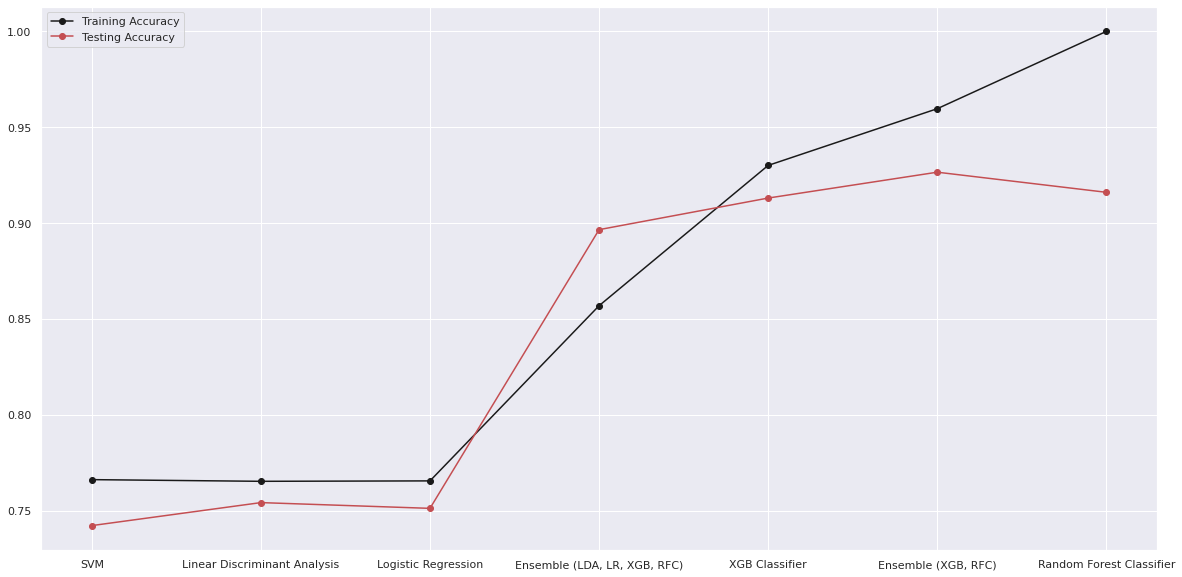

In [305]:
plt.figure(figsize=(20,10))
plt.plot(acc_DF['Model'], acc_DF['Train Accuracy'],'ko-',label='Training Accuracy')
plt.plot(acc_DF['Model'], acc_DF['Test Accuracy'],'ro-',label='Testing Accuracy')
plt.legend()

### Feature Selection by selecting K-best features using chi2 

In [306]:
X = churn.drop(['State','Churn'],axis=1)
Y = churn['Churn']

In [307]:
fs = SelectKBest(chi2, k=10)
X_selected = fs.fit_transform(X, Y)

In [308]:
X.head()

Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                   25.0              265.1            110.0   
1                   26.0              161.6            123.0   
2                    0.0              243.4            114.0   
3                    0.0              299.4             71.0   
4                    0.0              166.7            113.0   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07             197.40             99.0             16.78   
1             27.47             195.50            103.0             16.62   
2             41.38             121.20            110.0             10.30   
3             50.90              63.55             88.0              5.40   
4             28.34             148.30            122.0             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7               91.0               11.01   
1                254.4              103.0               11.45   
2                162.6              104.0                7.32   
3                196.9               89.0                8.86   
4                186.9              121.0                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0               3.0               2.70   
1                13.7               3.0               3.70   
2                12.2               5.0               3.29   
3                 6.6               7.0               1.78   
4                10.1               3.0               2.73   

   Customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [309]:
X_selected[0]

array([128.  ,   0.  ,   1.  ,  25.  , 265.1 ,  45.07, 197.4 ,  16.78,
       244.7 ,   1.  ])

By comparing the data in 'X' and 'X_selected', we can conclude that the features selected are - 'Account length', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total night minutes' and 'Customer service calls'.

**Implmenting Prediction models -**

Splitting the dataset in training and test data in the ratio of 80:20.

In [310]:
X_train, X_test, Y_train, Y_test=train_test_split(X_selected, Y, test_size=0.2,random_state=3)

Normalizing the training and test dataset.

In [311]:
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Data Augmentation for the dataset.

In [312]:
sm=SMOTE(random_state=42)
X_train, Y_train=sm.fit_resample(X_train, Y_train)

In [313]:
X_Full=np.hstack((X_train,Y_train.values.reshape(-1,1)))

In [314]:
S_df=pd.DataFrame(X_Full,columns=[1,2,3,4,5,6,7,8,9,10,'Churn'])
S_df.shape

(4562, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



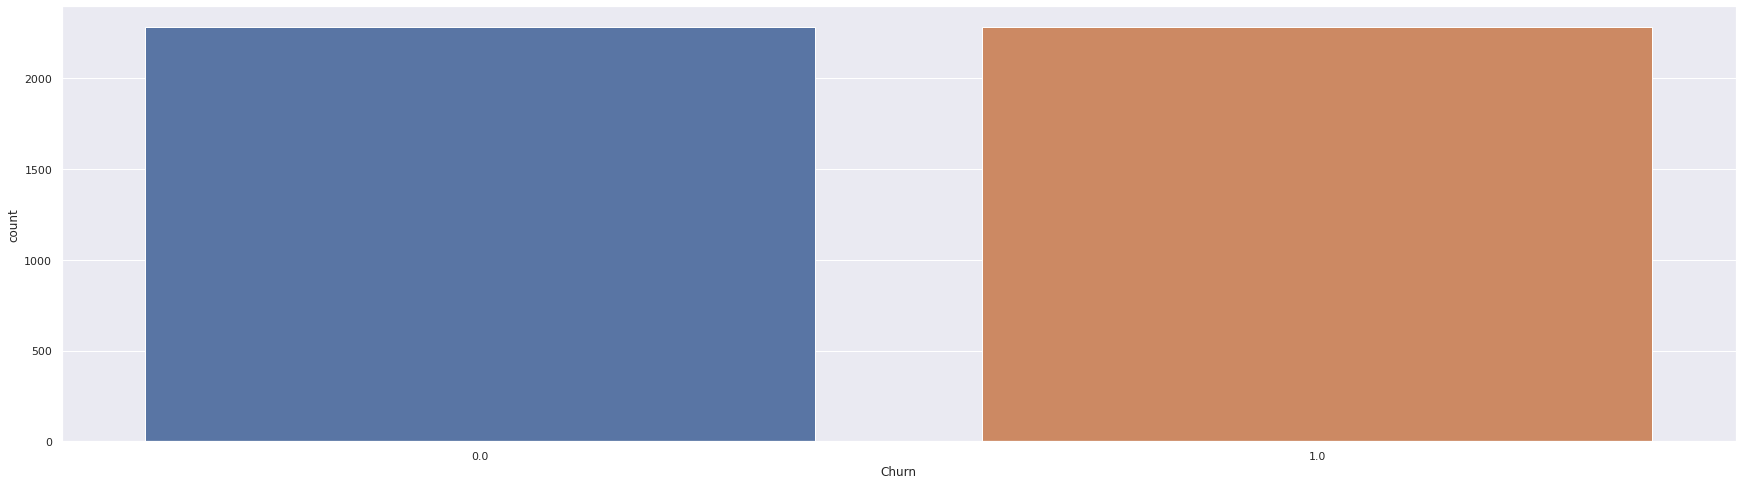

In [315]:
sns.countplot('Churn', data=S_df)
plt.show()

Equal number of instances for each category after data augmentation. 

In [316]:
acc_DF = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

#### SVM

In [317]:
svm_model = SVC(kernel='linear',random_state=0)
svm_model.fit(X_train,Y_train)
Svm_test_pred = svm_model.predict(X_test)
Svm_test_acc = metrics.accuracy_score(Y_test, Svm_test_pred)
print("Accuracy for Test Data:",Svm_test_acc)
Svm_train_pred = svm_model.predict(X_train)
Svm_train_acc = metrics.accuracy_score(Y_train, Svm_train_pred)
print("Accuracy for Training Data:",Svm_train_acc)

Accuracy for Test Data: 0.7361319340329835
Accuracy for Training Data: 0.7687417799210873


In [318]:
acc_DF.loc[len(acc_DF.index)] = ['SVM', Svm_train_acc, Svm_test_acc]

In [319]:
print(confusion_matrix(Y_test,Svm_test_pred))
print(classification_report(Y_test,Svm_test_pred))

[[412 157]
 [ 19  79]]
              precision    recall  f1-score   support

       False       0.96      0.72      0.82       569
        True       0.33      0.81      0.47        98

    accuracy                           0.74       667
   macro avg       0.65      0.77      0.65       667
weighted avg       0.86      0.74      0.77       667



In [320]:
print(confusion_matrix(Y_train,Svm_train_pred))
print(classification_report(Y_train,Svm_train_pred))

[[1703  578]
 [ 477 1804]]
              precision    recall  f1-score   support

       False       0.78      0.75      0.76      2281
        True       0.76      0.79      0.77      2281

    accuracy                           0.77      4562
   macro avg       0.77      0.77      0.77      4562
weighted avg       0.77      0.77      0.77      4562



#### Linear Discriminant Analysis -

In [321]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
lda_test_pred = lda.predict(X_test)
lda_test_acc = metrics.accuracy_score(Y_test, lda_test_pred)
print("Accuracy for Test Data:", lda_test_acc)
lda_train_pred = lda.predict(X_train)
lda_train_acc = metrics.accuracy_score(Y_train, lda_train_pred)
print("Accuracy for Training Data:", lda_train_acc)

Accuracy for Test Data: 0.7496251874062968
Accuracy for Training Data: 0.7654537483559842


In [322]:
acc_DF.loc[len(acc_DF.index)] = ['Linear Discriminant Analysis', lda_train_acc, lda_test_acc]

In [323]:
print(confusion_matrix(Y_train,lda_train_pred))
print(classification_report(Y_train,lda_train_pred))

[[1744  537]
 [ 533 1748]]
              precision    recall  f1-score   support

       False       0.77      0.76      0.77      2281
        True       0.76      0.77      0.77      2281

    accuracy                           0.77      4562
   macro avg       0.77      0.77      0.77      4562
weighted avg       0.77      0.77      0.77      4562



In [324]:
print(confusion_matrix(Y_test,lda_test_pred))
print(classification_report(Y_test,lda_test_pred))

[[421 148]
 [ 19  79]]
              precision    recall  f1-score   support

       False       0.96      0.74      0.83       569
        True       0.35      0.81      0.49        98

    accuracy                           0.75       667
   macro avg       0.65      0.77      0.66       667
weighted avg       0.87      0.75      0.78       667



#### Logistic Regression

In [325]:
lrmodel = LogisticRegression(penalty='l2',tol=0.0001,solver='liblinear',max_iter=100,random_state=0)
lrmodel.fit(X_train,Y_train)
lr_test_pred = lrmodel.predict(X_test)
lr_test_acc = metrics.accuracy_score(Y_test, lr_test_pred)
print("Accuracy for Test Data:",lr_test_acc)
lr_train_pred = lrmodel.predict(X_train)
lr_train_acc = metrics.accuracy_score(Y_train, lr_train_pred)
print("Accuracy for Training Data:",lr_train_acc)

Accuracy for Test Data: 0.7466266866566716
Accuracy for Training Data: 0.7639193336256028


In [326]:
acc_DF.loc[len(acc_DF.index)] = ['Logistic Regression', lr_train_acc, lr_test_acc]

In [327]:
print(confusion_matrix(Y_test,lr_test_pred))
print(classification_report(Y_test,lr_test_pred))

[[419 150]
 [ 19  79]]
              precision    recall  f1-score   support

       False       0.96      0.74      0.83       569
        True       0.34      0.81      0.48        98

    accuracy                           0.75       667
   macro avg       0.65      0.77      0.66       667
weighted avg       0.87      0.75      0.78       667



In [328]:
print(confusion_matrix(Y_train,lr_train_pred))
print(classification_report(Y_train,lr_train_pred))

[[1742  539]
 [ 538 1743]]
              precision    recall  f1-score   support

       False       0.76      0.76      0.76      2281
        True       0.76      0.76      0.76      2281

    accuracy                           0.76      4562
   macro avg       0.76      0.76      0.76      4562
weighted avg       0.76      0.76      0.76      4562



#### Ensemble Learning Model using Linear Discriminant, Random Forest classifier, XGBClassifier and Logistic Regression -

Ensemble learning model - Voting

In [329]:
model_1 = LinearDiscriminantAnalysis()
model_2 = LogisticRegression(penalty='l2',tol=0.0001,solver='liblinear',max_iter=100,random_state=0)
model_3 = XGBClassifier()
model_4 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)

In [330]:
final_model1 = VotingClassifier(estimators=[('lda',model_1),('lr', model_2), ('xgb', model_3), ('rf', model_4)], voting='hard')
final_model1.fit(X_train, Y_train)
En1_test_pred = final_model1.predict(X_test)
En1_test_acc = metrics.accuracy_score(Y_test, En1_test_pred)
print("Accuracy for Test Data:", En1_test_acc)
En1_train_pred = final_model1.predict(X_train)
En1_train_acc = metrics.accuracy_score(Y_train, En1_train_pred)
print("Accuracy for Training Data:", En1_train_acc)

Accuracy for Test Data: 0.8860569715142429
Accuracy for Training Data: 0.8537921964050855


In [331]:
acc_DF.loc[len(acc_DF.index)] = ['Ensemble (LDA, LR, XGB, RFC)', En1_train_acc, En1_test_acc]

In [332]:
print(confusion_matrix(Y_test,En1_test_pred))
print(classification_report(Y_test,En1_test_pred))

[[520  49]
 [ 27  71]]
              precision    recall  f1-score   support

       False       0.95      0.91      0.93       569
        True       0.59      0.72      0.65        98

    accuracy                           0.89       667
   macro avg       0.77      0.82      0.79       667
weighted avg       0.90      0.89      0.89       667



In [333]:
print(confusion_matrix(Y_train,En1_train_pred))
print(classification_report(Y_train,En1_train_pred))

[[2141  140]
 [ 527 1754]]
              precision    recall  f1-score   support

       False       0.80      0.94      0.87      2281
        True       0.93      0.77      0.84      2281

    accuracy                           0.85      4562
   macro avg       0.86      0.85      0.85      4562
weighted avg       0.86      0.85      0.85      4562



#### XGB Classifier

In [334]:
xgbCF = XGBClassifier()
xgbCF.fit(X_train,Y_train)
xgb_test_pred = xgbCF.predict(X_test)
xgb_test_acc = metrics.accuracy_score(Y_test, xgb_test_pred)
print("Accuracy for Test Data:",xgb_test_acc)
xgb_train_pred = xgbCF.predict(X_train)
xgb_train_acc = metrics.accuracy_score(Y_train, xgb_train_pred)
print("Accuracy for Training Data:",xgb_train_acc)

Accuracy for Test Data: 0.8905547226386806
Accuracy for Training Data: 0.9296361245067952


In [335]:
acc_DF.loc[len(acc_DF.index)] = ['XGB Classifier', xgb_train_acc, xgb_test_acc]

In [336]:
print(confusion_matrix(Y_test,xgb_test_pred))
print(classification_report(Y_test,xgb_test_pred))

[[512  57]
 [ 16  82]]
              precision    recall  f1-score   support

       False       0.97      0.90      0.93       569
        True       0.59      0.84      0.69        98

    accuracy                           0.89       667
   macro avg       0.78      0.87      0.81       667
weighted avg       0.91      0.89      0.90       667



In [337]:
print(confusion_matrix(Y_train,xgb_train_pred))
print(classification_report(Y_train,xgb_train_pred))

[[2120  161]
 [ 160 2121]]
              precision    recall  f1-score   support

       False       0.93      0.93      0.93      2281
        True       0.93      0.93      0.93      2281

    accuracy                           0.93      4562
   macro avg       0.93      0.93      0.93      4562
weighted avg       0.93      0.93      0.93      4562



#### Ensemble Learning Model using Random Forest classifier and XGBClassifier -

In [338]:
model_1 = XGBClassifier()
model_2 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)

In [339]:
final_model2 = VotingClassifier(estimators=[('xgb', model_1), ('rf', model_2)], voting='hard')
final_model2.fit(X_train, Y_train)
En2_test_pred = final_model2.predict(X_test)
En2_test_acc = metrics.accuracy_score(Y_test, En2_test_pred)
print("Accuracy for Test Data:", En2_test_acc)
En2_train_pred = final_model2.predict(X_train)
En2_train_acc = metrics.accuracy_score(Y_train, En2_train_pred)
print("Accuracy for Training Data:", En2_train_acc)

Accuracy for Test Data: 0.9280359820089955
Accuracy for Training Data: 0.9649276633055678


In [340]:
acc_DF.loc[len(acc_DF.index)] = ['Ensemble (XGB, RFC)', En2_train_acc, En2_test_acc]

In [341]:
print(confusion_matrix(Y_test,En2_test_pred))
print(classification_report(Y_test,En2_test_pred))

[[541  28]
 [ 20  78]]
              precision    recall  f1-score   support

       False       0.96      0.95      0.96       569
        True       0.74      0.80      0.76        98

    accuracy                           0.93       667
   macro avg       0.85      0.87      0.86       667
weighted avg       0.93      0.93      0.93       667



In [342]:
print(confusion_matrix(Y_train,En2_train_pred))
print(classification_report(Y_train,En2_train_pred))

[[2281    0]
 [ 160 2121]]
              precision    recall  f1-score   support

       False       0.93      1.00      0.97      2281
        True       1.00      0.93      0.96      2281

    accuracy                           0.96      4562
   macro avg       0.97      0.96      0.96      4562
weighted avg       0.97      0.96      0.96      4562



#### Random Forest Classifier

In [343]:
Rfmodel = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
Rfmodel.fit(X_train,Y_train)
Rf_test_pred = Rfmodel.predict(X_test)
Rf_test_acc = metrics.accuracy_score(Y_test, Rf_test_pred)
print("Accuracy for Test Data:",Rf_test_acc)
Rf_train_pred = Rfmodel.predict(X_train)
Rf_train_acc = metrics.accuracy_score(Y_train, Rf_train_pred)
print("Accuracy for Training Data:",Rf_train_acc)

Accuracy for Test Data: 0.9265367316341829
Accuracy for Training Data: 1.0


In [344]:
acc_DF.loc[len(acc_DF.index)] = ['Random Forest Classifier', Rf_train_acc, Rf_test_acc]

In [345]:
print(confusion_matrix(Y_test,Rf_test_pred))
print(classification_report(Y_test,Rf_test_pred))

[[540  29]
 [ 20  78]]
              precision    recall  f1-score   support

       False       0.96      0.95      0.96       569
        True       0.73      0.80      0.76        98

    accuracy                           0.93       667
   macro avg       0.85      0.87      0.86       667
weighted avg       0.93      0.93      0.93       667



In [346]:
print(confusion_matrix(Y_train,Rf_train_pred))
print(classification_report(Y_train,Rf_train_pred))

[[2281    0]
 [   0 2281]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2281
        True       1.00      1.00      1.00      2281

    accuracy                           1.00      4562
   macro avg       1.00      1.00      1.00      4562
weighted avg       1.00      1.00      1.00      4562



#### Comparison of Models

In [347]:
acc_DF

Model  Train Accuracy  Test Accuracy
0                           SVM        0.768742       0.736132
1  Linear Discriminant Analysis        0.765454       0.749625
2           Logistic Regression        0.763919       0.746627
3  Ensemble (LDA, LR, XGB, RFC)        0.853792       0.886057
4                XGB Classifier        0.929636       0.890555
5           Ensemble (XGB, RFC)        0.964928       0.928036
6      Random Forest Classifier        1.000000       0.926537

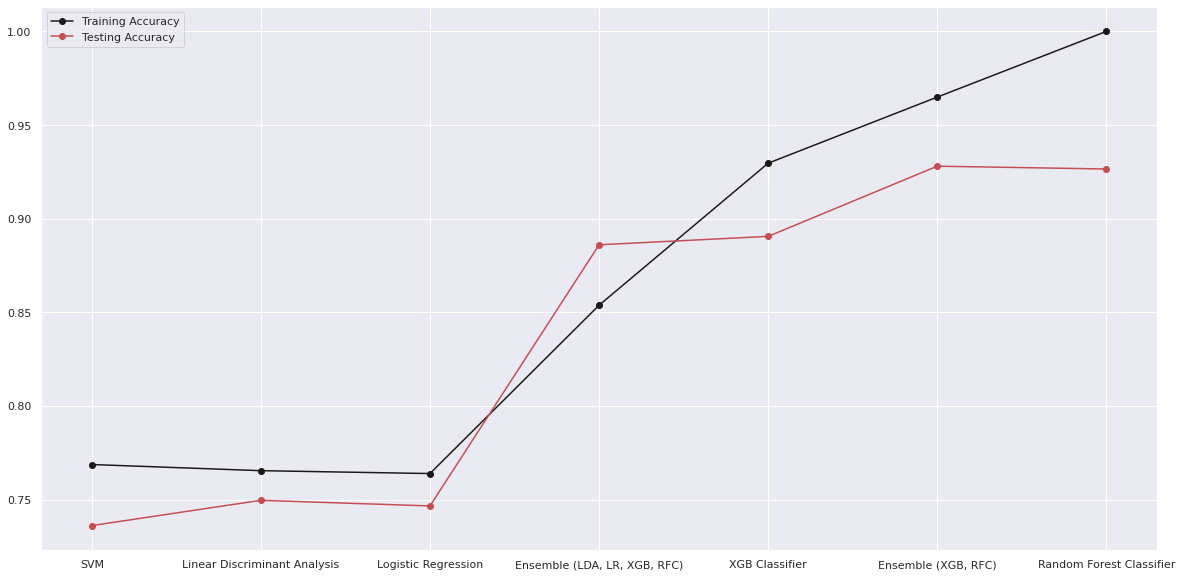

In [348]:
plt.figure(figsize=(20,10))
plt.plot(acc_DF['Model'], acc_DF['Train Accuracy'],'ko-',label='Training Accuracy')
plt.plot(acc_DF['Model'], acc_DF['Test Accuracy'],'ro-',label='Testing Accuracy')
plt.legend()

### Feature Selection based on the count of outliers in original data but without the outliers

Selecting top 10 columns with maximum number of outliers after outlier removal -

'Total intl calls', 'Total intl charge', 'Total intl minutes', 'Total night charge', 'Total night minutes', 'Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge' and 'Total day calls'.

In [349]:
X = churn.drop(['State','Churn','Area code','Number vmail messages','Account length','Total eve calls','Total night calls','International plan','Voice mail plan','Customer service calls'],axis=1)
Y = churn['Churn']

**Implmenting Prediction models -**

Splitting the dataset in training and test data in the ratio of 80:20.

In [350]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2,random_state=3)

Normalizing the training and test dataset.

In [351]:
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Data Augmentation for the dataset.

In [352]:
sm=SMOTE(random_state=42)
X_train, Y_train=sm.fit_resample(X_train, Y_train)

In [353]:
X_Full=np.hstack((X_train,Y_train.values.reshape(-1,1)))

In [354]:
S_df=pd.DataFrame(X_Full,columns=[1,2,3,4,5,6,7,8,9,10,'Churn'])
S_df.shape

(4562, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



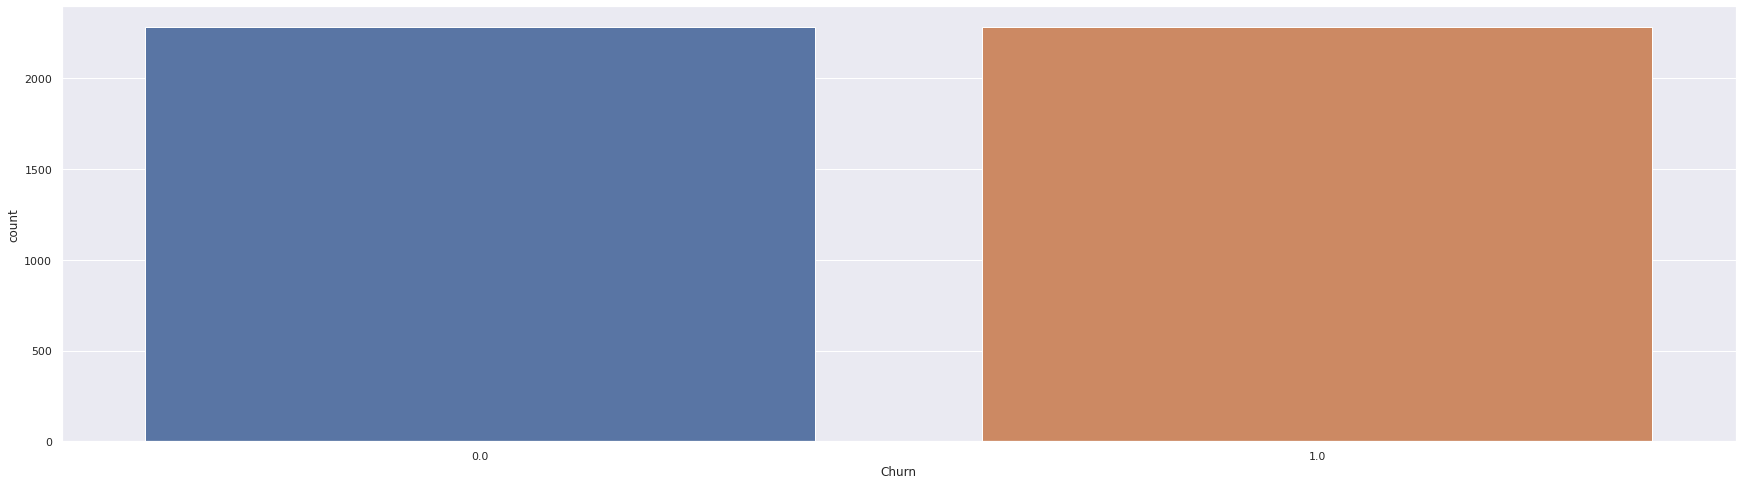

In [355]:
sns.countplot('Churn', data=S_df)
plt.show()

Equal number of instances for each category after data augmentation. 

In [356]:
acc_DF = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

#### SVM

In [357]:
svm_model = SVC(kernel='linear',random_state=0)
svm_model.fit(X_train,Y_train)
Svm_test_pred = svm_model.predict(X_test)
Svm_test_acc = metrics.accuracy_score(Y_test, Svm_test_pred)
print("Accuracy for Test Data:",Svm_test_acc)
Svm_train_pred = svm_model.predict(X_train)
Svm_train_acc = metrics.accuracy_score(Y_train, Svm_train_pred)
print("Accuracy for Training Data:",Svm_train_acc)

Accuracy for Test Data: 0.7001499250374813
Accuracy for Training Data: 0.6363437088996055


In [358]:
acc_DF.loc[len(acc_DF.index)] = ['SVM', Svm_train_acc, Svm_test_acc]

In [359]:
print(confusion_matrix(Y_test,Svm_test_pred))
print(classification_report(Y_test,Svm_test_pred))

[[418 151]
 [ 49  49]]
              precision    recall  f1-score   support

       False       0.90      0.73      0.81       569
        True       0.24      0.50      0.33        98

    accuracy                           0.70       667
   macro avg       0.57      0.62      0.57       667
weighted avg       0.80      0.70      0.74       667



In [360]:
print(confusion_matrix(Y_train,Svm_train_pred))
print(classification_report(Y_train,Svm_train_pred))

[[1598  683]
 [ 976 1305]]
              precision    recall  f1-score   support

       False       0.62      0.70      0.66      2281
        True       0.66      0.57      0.61      2281

    accuracy                           0.64      4562
   macro avg       0.64      0.64      0.63      4562
weighted avg       0.64      0.64      0.63      4562



#### Linear Discriminant Analysis -

In [361]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
lda_test_pred = lda.predict(X_test)
lda_test_acc = metrics.accuracy_score(Y_test, lda_test_pred)
print("Accuracy for Test Data:", lda_test_acc)
lda_train_pred = lda.predict(X_train)
lda_train_acc = metrics.accuracy_score(Y_train, lda_train_pred)
print("Accuracy for Training Data:", lda_train_acc)

Accuracy for Test Data: 0.6146926536731634
Accuracy for Training Data: 0.6288908373520385


In [362]:
acc_DF.loc[len(acc_DF.index)] = ['Linear Discriminant Analysis', lda_train_acc, lda_test_acc]

In [363]:
print(confusion_matrix(Y_train,lda_train_pred))
print(classification_report(Y_train,lda_train_pred))

[[1447  834]
 [ 859 1422]]
              precision    recall  f1-score   support

       False       0.63      0.63      0.63      2281
        True       0.63      0.62      0.63      2281

    accuracy                           0.63      4562
   macro avg       0.63      0.63      0.63      4562
weighted avg       0.63      0.63      0.63      4562



In [364]:
print(confusion_matrix(Y_test,lda_test_pred))
print(classification_report(Y_test,lda_test_pred))

[[359 210]
 [ 47  51]]
              precision    recall  f1-score   support

       False       0.88      0.63      0.74       569
        True       0.20      0.52      0.28        98

    accuracy                           0.61       667
   macro avg       0.54      0.58      0.51       667
weighted avg       0.78      0.61      0.67       667



#### Logistic Regression

In [365]:
lrmodel = LogisticRegression(penalty='l2',tol=0.0001,solver='liblinear',max_iter=100,random_state=0)
lrmodel.fit(X_train,Y_train)
lr_test_pred = lrmodel.predict(X_test)
lr_test_acc = metrics.accuracy_score(Y_test, lr_test_pred)
print("Accuracy for Test Data:",lr_test_acc)
lr_train_pred = lrmodel.predict(X_train)
lr_train_acc = metrics.accuracy_score(Y_train, lr_train_pred)
print("Accuracy for Training Data:",lr_train_acc)

Accuracy for Test Data: 0.6326836581709145
Accuracy for Training Data: 0.6247259973695748


In [366]:
acc_DF.loc[len(acc_DF.index)] = ['Logistic Regression', lr_train_acc, lr_test_acc]

In [367]:
print(confusion_matrix(Y_test,lr_test_pred))
print(classification_report(Y_test,lr_test_pred))

[[370 199]
 [ 46  52]]
              precision    recall  f1-score   support

       False       0.89      0.65      0.75       569
        True       0.21      0.53      0.30        98

    accuracy                           0.63       667
   macro avg       0.55      0.59      0.52       667
weighted avg       0.79      0.63      0.68       667



In [368]:
print(confusion_matrix(Y_train,lr_train_pred))
print(classification_report(Y_train,lr_train_pred))

[[1445  836]
 [ 876 1405]]
              precision    recall  f1-score   support

       False       0.62      0.63      0.63      2281
        True       0.63      0.62      0.62      2281

    accuracy                           0.62      4562
   macro avg       0.62      0.62      0.62      4562
weighted avg       0.62      0.62      0.62      4562



#### Ensemble Learning Model using Linear Discriminant, Random Forest classifier, XGBClassifier and Logistic Regression -

Ensemble learning model - Voting

In [369]:
model_1 = LinearDiscriminantAnalysis()
model_2 = LogisticRegression(penalty='l2',tol=0.0001,solver='liblinear',max_iter=100,random_state=0)
model_3 = XGBClassifier()
model_4 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)

In [370]:
final_model1 = VotingClassifier(estimators=[('lda',model_1),('lr', model_2), ('xgb', model_3), ('rf', model_4)], voting='hard')
final_model1.fit(X_train, Y_train)
En1_test_pred = final_model1.predict(X_test)
En1_test_acc = metrics.accuracy_score(Y_test, En1_test_pred)
print("Accuracy for Test Data:", En1_test_acc)
En1_train_pred = final_model1.predict(X_train)
En1_train_acc = metrics.accuracy_score(Y_train, En1_train_pred)
print("Accuracy for Training Data:", En1_train_acc)

Accuracy for Test Data: 0.8365817091454273
Accuracy for Training Data: 0.7803594914511179


In [371]:
acc_DF.loc[len(acc_DF.index)] = ['Ensemble (LDA, LR, XGB, RFC)', En1_train_acc, En1_test_acc]

In [372]:
print(confusion_matrix(Y_test,En1_test_pred))
print(classification_report(Y_test,En1_test_pred))

[[523  46]
 [ 63  35]]
              precision    recall  f1-score   support

       False       0.89      0.92      0.91       569
        True       0.43      0.36      0.39        98

    accuracy                           0.84       667
   macro avg       0.66      0.64      0.65       667
weighted avg       0.82      0.84      0.83       667



In [373]:
print(confusion_matrix(Y_train,En1_train_pred))
print(classification_report(Y_train,En1_train_pred))

[[2133  148]
 [ 854 1427]]
              precision    recall  f1-score   support

       False       0.71      0.94      0.81      2281
        True       0.91      0.63      0.74      2281

    accuracy                           0.78      4562
   macro avg       0.81      0.78      0.77      4562
weighted avg       0.81      0.78      0.77      4562



#### XGB Classifier

In [374]:
xgbCF = XGBClassifier()
xgbCF.fit(X_train,Y_train)
xgb_test_pred = xgbCF.predict(X_test)
xgb_test_acc = metrics.accuracy_score(Y_test, xgb_test_pred)
print("Accuracy for Test Data:",xgb_test_acc)
xgb_train_pred = xgbCF.predict(X_train)
xgb_train_acc = metrics.accuracy_score(Y_train, xgb_train_pred)
print("Accuracy for Training Data:",xgb_train_acc)

Accuracy for Test Data: 0.8320839580209896
Accuracy for Training Data: 0.8776852257781674


In [375]:
acc_DF.loc[len(acc_DF.index)] = ['XGB Classifier', xgb_train_acc, xgb_test_acc]

In [376]:
print(confusion_matrix(Y_test,xgb_test_pred))
print(classification_report(Y_test,xgb_test_pred))

[[515  54]
 [ 58  40]]
              precision    recall  f1-score   support

       False       0.90      0.91      0.90       569
        True       0.43      0.41      0.42        98

    accuracy                           0.83       667
   macro avg       0.66      0.66      0.66       667
weighted avg       0.83      0.83      0.83       667



In [377]:
print(confusion_matrix(Y_train,xgb_train_pred))
print(classification_report(Y_train,xgb_train_pred))

[[2061  220]
 [ 338 1943]]
              precision    recall  f1-score   support

       False       0.86      0.90      0.88      2281
        True       0.90      0.85      0.87      2281

    accuracy                           0.88      4562
   macro avg       0.88      0.88      0.88      4562
weighted avg       0.88      0.88      0.88      4562



#### Ensemble Learning Model using Random Forest classifier and XGBClassifier -

In [378]:
model_1 = XGBClassifier()
model_2 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)

In [379]:
final_model2 = VotingClassifier(estimators=[('xgb', model_1), ('rf', model_2)], voting='hard')
final_model2.fit(X_train, Y_train)
En2_test_pred = final_model2.predict(X_test)
En2_test_acc = metrics.accuracy_score(Y_test, En2_test_pred)
print("Accuracy for Test Data:", En2_test_acc)
En2_train_pred = final_model2.predict(X_train)
En2_train_acc = metrics.accuracy_score(Y_train, En2_train_pred)
print("Accuracy for Training Data:", En2_train_acc)

Accuracy for Test Data: 0.8680659670164917
Accuracy for Training Data: 0.9256904866286716


In [380]:
acc_DF.loc[len(acc_DF.index)] = ['Ensemble (XGB, RFC)', En2_train_acc, En2_test_acc]

In [381]:
print(confusion_matrix(Y_test,En2_test_pred))
print(classification_report(Y_test,En2_test_pred))

[[543  26]
 [ 62  36]]
              precision    recall  f1-score   support

       False       0.90      0.95      0.93       569
        True       0.58      0.37      0.45        98

    accuracy                           0.87       667
   macro avg       0.74      0.66      0.69       667
weighted avg       0.85      0.87      0.86       667



In [382]:
print(confusion_matrix(Y_train,En2_train_pred))
print(classification_report(Y_train,En2_train_pred))

[[2280    1]
 [ 338 1943]]
              precision    recall  f1-score   support

       False       0.87      1.00      0.93      2281
        True       1.00      0.85      0.92      2281

    accuracy                           0.93      4562
   macro avg       0.94      0.93      0.93      4562
weighted avg       0.94      0.93      0.93      4562



#### Random Forest Classifier

In [383]:
Rfmodel = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
Rfmodel.fit(X_train,Y_train)
Rf_test_pred = Rfmodel.predict(X_test)
Rf_test_acc = metrics.accuracy_score(Y_test, Rf_test_pred)
print("Accuracy for Test Data:",Rf_test_acc)
Rf_train_pred = Rfmodel.predict(X_train)
Rf_train_acc = metrics.accuracy_score(Y_train, Rf_train_pred)
print("Accuracy for Training Data:",Rf_train_acc)

Accuracy for Test Data: 0.8380809595202399
Accuracy for Training Data: 0.9997807978956598


In [384]:
acc_DF.loc[len(acc_DF.index)] = ['Random Forest Classifier', Rf_train_acc, Rf_test_acc]

In [385]:
print(confusion_matrix(Y_test,Rf_test_pred))
print(classification_report(Y_test,Rf_test_pred))

[[520  49]
 [ 59  39]]
              precision    recall  f1-score   support

       False       0.90      0.91      0.91       569
        True       0.44      0.40      0.42        98

    accuracy                           0.84       667
   macro avg       0.67      0.66      0.66       667
weighted avg       0.83      0.84      0.83       667



In [386]:
print(confusion_matrix(Y_train,Rf_train_pred))
print(classification_report(Y_train,Rf_train_pred))

[[2280    1]
 [   0 2281]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2281
        True       1.00      1.00      1.00      2281

    accuracy                           1.00      4562
   macro avg       1.00      1.00      1.00      4562
weighted avg       1.00      1.00      1.00      4562



#### Comparison of Models

In [387]:
acc_DF

Model  Train Accuracy  Test Accuracy
0                           SVM        0.636344       0.700150
1  Linear Discriminant Analysis        0.628891       0.614693
2           Logistic Regression        0.624726       0.632684
3  Ensemble (LDA, LR, XGB, RFC)        0.780359       0.836582
4                XGB Classifier        0.877685       0.832084
5           Ensemble (XGB, RFC)        0.925690       0.868066
6      Random Forest Classifier        0.999781       0.838081

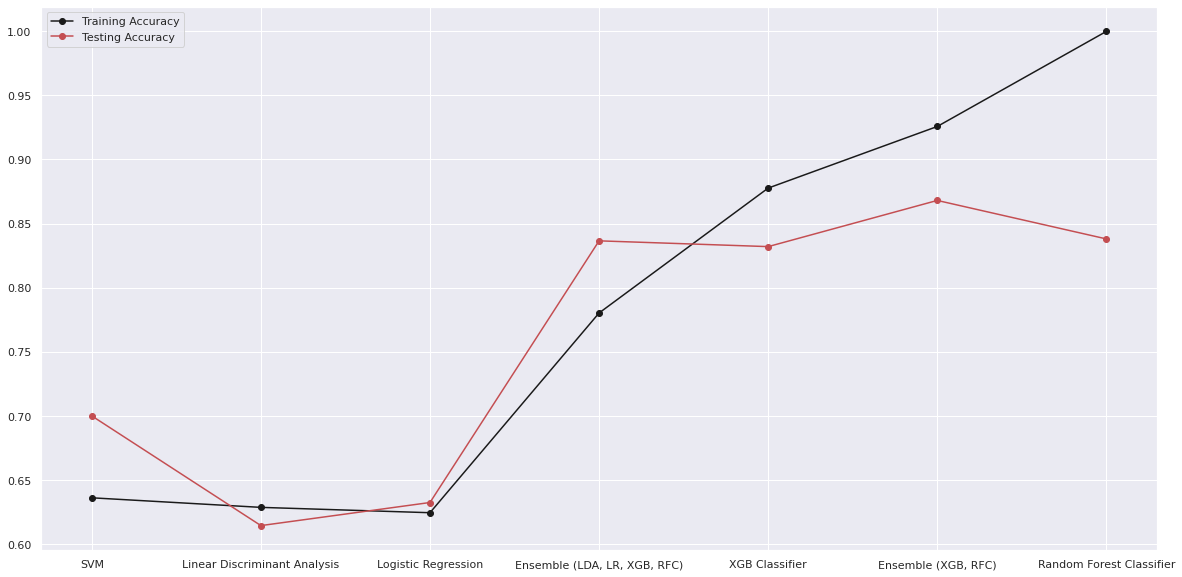

In [388]:
plt.figure(figsize=(20,10))
plt.plot(acc_DF['Model'], acc_DF['Train Accuracy'],'ko-',label='Training Accuracy')
plt.plot(acc_DF['Model'], acc_DF['Test Accuracy'],'ro-',label='Testing Accuracy')
plt.legend()

### Feature Selection based on Variance Threshold

To select only 10 columns.

In [389]:
X = churn.drop(['Churn','State'],axis=1)
selector = VarianceThreshold(threshold=19)
X = selector.fit_transform(X)

In [390]:
churn.head()

State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                   25.0              265.1            110.0   
1                   26.0              161.6            123.0   
2                    0.0              243.4            114.0   
3                    0.0              299.4             71.0   
4                    0.0              166.7            113.0   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07             197.40             99.0             16.78   
1             27.47             195.50            103.0             16.62   
2             41.38             121.20            110.0             10.30   
3             50.90              63.55             88.0              5.40   
4             28.34             148.30            122.0             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7               91.0               11.01   
1                254.4              103.0               11.45   
2                162.6              104.0                7.32   
3                196.9               89.0                8.86   
4                186.9              121.0                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0               3.0               2.70   
1                13.7               3.0               3.70   
2                12.2               5.0               3.29   
3                 6.6               7.0               1.78   
4                10.1               3.0               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [391]:
X[0]

array([128.  , 415.  ,  25.  , 265.1 , 110.  ,  45.07, 197.4 ,  99.  ,
       244.7 ,  91.  ])

By comparing the original data and the selected data, we can conclude that the columns selected were - 'Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total night minutes' and 'Total night calls'.

In [392]:
Y = churn['Churn']

**Implmenting Prediction models -**

Splitting the dataset in training and test data in the ratio of 80:20.

In [393]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2,random_state=3)

Normalizing the training and test dataset.

In [394]:
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Data Augmentation for the dataset.

In [395]:
sm=SMOTE(random_state=42)
X_train, Y_train=sm.fit_resample(X_train, Y_train)

In [396]:
X_Full=np.hstack((X_train,Y_train.values.reshape(-1,1)))

In [397]:
S_df=pd.DataFrame(X_Full,columns=[1,2,3,4,5,6,7,8,9,10,'Churn'])
S_df.shape

(4562, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



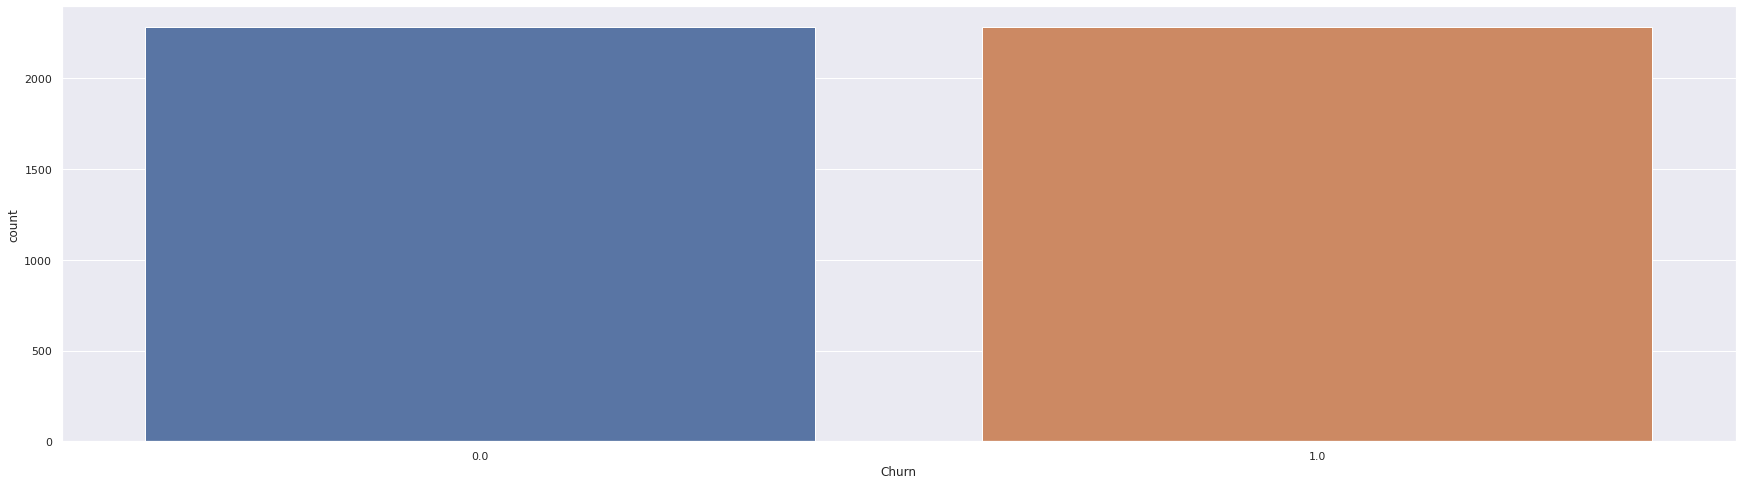

In [398]:
sns.countplot('Churn', data=S_df)
plt.show()

Equal number of instances for each category after data augmentation. 

In [399]:
acc_DF = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

#### SVM

In [400]:
svm_model = SVC(kernel='linear',random_state=0)
svm_model.fit(X_train,Y_train)
Svm_test_pred = svm_model.predict(X_test)
Svm_test_acc = metrics.accuracy_score(Y_test, Svm_test_pred)
print("Accuracy for Test Data:",Svm_test_acc)
Svm_train_pred = svm_model.predict(X_train)
Svm_train_acc = metrics.accuracy_score(Y_train, Svm_train_pred)
print("Accuracy for Training Data:",Svm_train_acc)

Accuracy for Test Data: 0.6866566716641679
Accuracy for Training Data: 0.6280140289346777


In [401]:
acc_DF.loc[len(acc_DF.index)] = ['SVM', Svm_train_acc, Svm_test_acc]

In [402]:
print(confusion_matrix(Y_test,Svm_test_pred))
print(classification_report(Y_test,Svm_test_pred))

[[412 157]
 [ 52  46]]
              precision    recall  f1-score   support

       False       0.89      0.72      0.80       569
        True       0.23      0.47      0.31        98

    accuracy                           0.69       667
   macro avg       0.56      0.60      0.55       667
weighted avg       0.79      0.69      0.73       667



In [403]:
print(confusion_matrix(Y_train,Svm_train_pred))
print(classification_report(Y_train,Svm_train_pred))

[[1657  624]
 [1073 1208]]
              precision    recall  f1-score   support

       False       0.61      0.73      0.66      2281
        True       0.66      0.53      0.59      2281

    accuracy                           0.63      4562
   macro avg       0.63      0.63      0.62      4562
weighted avg       0.63      0.63      0.62      4562



#### Linear Discriminant Analysis -

In [404]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
lda_test_pred = lda.predict(X_test)
lda_test_acc = metrics.accuracy_score(Y_test, lda_test_pred)
print("Accuracy for Test Data:", lda_test_acc)
lda_train_pred = lda.predict(X_train)
lda_train_acc = metrics.accuracy_score(Y_train, lda_train_pred)
print("Accuracy for Training Data:", lda_train_acc)

Accuracy for Test Data: 0.6146926536731634
Accuracy for Training Data: 0.5986409469530908


In [405]:
acc_DF.loc[len(acc_DF.index)] = ['Linear Discriminant Analysis', lda_train_acc, lda_test_acc]

In [406]:
print(confusion_matrix(Y_train,lda_train_pred))
print(classification_report(Y_train,lda_train_pred))

[[1421  860]
 [ 971 1310]]
              precision    recall  f1-score   support

       False       0.59      0.62      0.61      2281
        True       0.60      0.57      0.59      2281

    accuracy                           0.60      4562
   macro avg       0.60      0.60      0.60      4562
weighted avg       0.60      0.60      0.60      4562



In [407]:
print(confusion_matrix(Y_test,lda_test_pred))
print(classification_report(Y_test,lda_test_pred))

[[359 210]
 [ 47  51]]
              precision    recall  f1-score   support

       False       0.88      0.63      0.74       569
        True       0.20      0.52      0.28        98

    accuracy                           0.61       667
   macro avg       0.54      0.58      0.51       667
weighted avg       0.78      0.61      0.67       667



#### Logistic Regression

In [408]:
lrmodel = LogisticRegression(penalty='l2',tol=0.0001,solver='liblinear',max_iter=100,random_state=0)
lrmodel.fit(X_train,Y_train)
lr_test_pred = lrmodel.predict(X_test)
lr_test_acc = metrics.accuracy_score(Y_test, lr_test_pred)
print("Accuracy for Test Data:",lr_test_acc)
lr_train_pred = lrmodel.predict(X_train)
lr_train_acc = metrics.accuracy_score(Y_train, lr_train_pred)
print("Accuracy for Training Data:",lr_train_acc)

Accuracy for Test Data: 0.6116941529235382
Accuracy for Training Data: 0.5968873301183691


In [409]:
acc_DF.loc[len(acc_DF.index)] = ['Logistic Regression', lr_train_acc, lr_test_acc]

In [410]:
print(confusion_matrix(Y_test,lr_test_pred))
print(classification_report(Y_test,lr_test_pred))

[[356 213]
 [ 46  52]]
              precision    recall  f1-score   support

       False       0.89      0.63      0.73       569
        True       0.20      0.53      0.29        98

    accuracy                           0.61       667
   macro avg       0.54      0.58      0.51       667
weighted avg       0.78      0.61      0.67       667



In [411]:
print(confusion_matrix(Y_train,lr_train_pred))
print(classification_report(Y_train,lr_train_pred))

[[1417  864]
 [ 975 1306]]
              precision    recall  f1-score   support

       False       0.59      0.62      0.61      2281
        True       0.60      0.57      0.59      2281

    accuracy                           0.60      4562
   macro avg       0.60      0.60      0.60      4562
weighted avg       0.60      0.60      0.60      4562



#### Ensemble Learning Model using Linear Discriminant, Random Forest classifier, XGBClassifier and Logistic Regression -

Ensemble learning model - Voting

In [412]:
model_1 = LinearDiscriminantAnalysis()
model_2 = LogisticRegression(penalty='l2',tol=0.0001,solver='liblinear',max_iter=100,random_state=0)
model_3 = XGBClassifier()
model_4 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)

In [413]:
final_model1 = VotingClassifier(estimators=[('lda',model_1),('lr', model_2), ('xgb', model_3), ('rf', model_4)], voting='hard')
final_model1.fit(X_train, Y_train)
En1_test_pred = final_model1.predict(X_test)
En1_test_acc = metrics.accuracy_score(Y_test, En1_test_pred)
print("Accuracy for Test Data:", En1_test_acc)
En1_train_pred = final_model1.predict(X_train)
En1_train_acc = metrics.accuracy_score(Y_train, En1_train_pred)
print("Accuracy for Training Data:", En1_train_acc)

Accuracy for Test Data: 0.8545727136431784
Accuracy for Training Data: 0.7680841736080667


In [414]:
acc_DF.loc[len(acc_DF.index)] = ['Ensemble (LDA, LR, XGB, RFC)', En1_train_acc, En1_test_acc]

In [415]:
print(confusion_matrix(Y_test,En1_test_pred))
print(classification_report(Y_test,En1_test_pred))

[[531  38]
 [ 59  39]]
              precision    recall  f1-score   support

       False       0.90      0.93      0.92       569
        True       0.51      0.40      0.45        98

    accuracy                           0.85       667
   macro avg       0.70      0.67      0.68       667
weighted avg       0.84      0.85      0.85       667



In [416]:
print(confusion_matrix(Y_train,En1_train_pred))
print(classification_report(Y_train,En1_train_pred))

[[2197   84]
 [ 974 1307]]
              precision    recall  f1-score   support

       False       0.69      0.96      0.81      2281
        True       0.94      0.57      0.71      2281

    accuracy                           0.77      4562
   macro avg       0.82      0.77      0.76      4562
weighted avg       0.82      0.77      0.76      4562



#### XGB Classifier

In [417]:
xgbCF = XGBClassifier()
xgbCF.fit(X_train,Y_train)
xgb_test_pred = xgbCF.predict(X_test)
xgb_test_acc = metrics.accuracy_score(Y_test, xgb_test_pred)
print("Accuracy for Test Data:",xgb_test_acc)
xgb_train_pred = xgbCF.predict(X_train)
xgb_train_acc = metrics.accuracy_score(Y_train, xgb_train_pred)
print("Accuracy for Training Data:",xgb_train_acc)

Accuracy for Test Data: 0.8215892053973014
Accuracy for Training Data: 0.8483121437965805


In [418]:
acc_DF.loc[len(acc_DF.index)] = ['XGB Classifier', xgb_train_acc, xgb_test_acc]

In [419]:
print(confusion_matrix(Y_test,xgb_test_pred))
print(classification_report(Y_test,xgb_test_pred))

[[507  62]
 [ 57  41]]
              precision    recall  f1-score   support

       False       0.90      0.89      0.89       569
        True       0.40      0.42      0.41        98

    accuracy                           0.82       667
   macro avg       0.65      0.65      0.65       667
weighted avg       0.83      0.82      0.82       667



In [420]:
print(confusion_matrix(Y_train,xgb_train_pred))
print(classification_report(Y_train,xgb_train_pred))

[[2148  133]
 [ 559 1722]]
              precision    recall  f1-score   support

       False       0.79      0.94      0.86      2281
        True       0.93      0.75      0.83      2281

    accuracy                           0.85      4562
   macro avg       0.86      0.85      0.85      4562
weighted avg       0.86      0.85      0.85      4562



#### Ensemble Learning Model using Random Forest classifier and XGBClassifier -

In [421]:
model_1 = XGBClassifier()
model_2 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)

In [422]:
final_model2 = VotingClassifier(estimators=[('xgb', model_1), ('rf', model_2)], voting='hard')
final_model2.fit(X_train, Y_train)
En2_test_pred = final_model2.predict(X_test)
En2_test_acc = metrics.accuracy_score(Y_test, En2_test_pred)
print("Accuracy for Test Data:", En2_test_acc)
En2_train_pred = final_model2.predict(X_train)
En2_train_acc = metrics.accuracy_score(Y_train, En2_train_pred)
print("Accuracy for Training Data:", En2_train_acc)

Accuracy for Test Data: 0.8680659670164917
Accuracy for Training Data: 0.8774660236738273


In [423]:
acc_DF.loc[len(acc_DF.index)] = ['Ensemble (XGB, RFC)', En2_train_acc, En2_test_acc]

In [424]:
print(confusion_matrix(Y_test,En2_test_pred))
print(classification_report(Y_test,En2_test_pred))

[[541  28]
 [ 60  38]]
              precision    recall  f1-score   support

       False       0.90      0.95      0.92       569
        True       0.58      0.39      0.46        98

    accuracy                           0.87       667
   macro avg       0.74      0.67      0.69       667
weighted avg       0.85      0.87      0.86       667



In [425]:
print(confusion_matrix(Y_train,En2_train_pred))
print(classification_report(Y_train,En2_train_pred))

[[2281    0]
 [ 559 1722]]
              precision    recall  f1-score   support

       False       0.80      1.00      0.89      2281
        True       1.00      0.75      0.86      2281

    accuracy                           0.88      4562
   macro avg       0.90      0.88      0.88      4562
weighted avg       0.90      0.88      0.88      4562



#### Random Forest Classifier

In [426]:
Rfmodel = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
Rfmodel.fit(X_train,Y_train)
Rf_test_pred = Rfmodel.predict(X_test)
Rf_test_acc = metrics.accuracy_score(Y_test, Rf_test_pred)
print("Accuracy for Test Data:",Rf_test_acc)
Rf_train_pred = Rfmodel.predict(X_train)
Rf_train_acc = metrics.accuracy_score(Y_train, Rf_train_pred)
print("Accuracy for Training Data:",Rf_train_acc)

Accuracy for Test Data: 0.8650674662668666
Accuracy for Training Data: 1.0


In [427]:
acc_DF.loc[len(acc_DF.index)] = ['Random Forest Classifier', Rf_train_acc, Rf_test_acc]

In [428]:
print(confusion_matrix(Y_test,Rf_test_pred))
print(classification_report(Y_test,Rf_test_pred))

[[539  30]
 [ 60  38]]
              precision    recall  f1-score   support

       False       0.90      0.95      0.92       569
        True       0.56      0.39      0.46        98

    accuracy                           0.87       667
   macro avg       0.73      0.67      0.69       667
weighted avg       0.85      0.87      0.85       667



In [429]:
print(confusion_matrix(Y_train,Rf_train_pred))
print(classification_report(Y_train,Rf_train_pred))

[[2281    0]
 [   0 2281]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2281
        True       1.00      1.00      1.00      2281

    accuracy                           1.00      4562
   macro avg       1.00      1.00      1.00      4562
weighted avg       1.00      1.00      1.00      4562



#### Comparison of Models

In [430]:
acc_DF

Model  Train Accuracy  Test Accuracy
0                           SVM        0.628014       0.686657
1  Linear Discriminant Analysis        0.598641       0.614693
2           Logistic Regression        0.596887       0.611694
3  Ensemble (LDA, LR, XGB, RFC)        0.768084       0.854573
4                XGB Classifier        0.848312       0.821589
5           Ensemble (XGB, RFC)        0.877466       0.868066
6      Random Forest Classifier        1.000000       0.865067

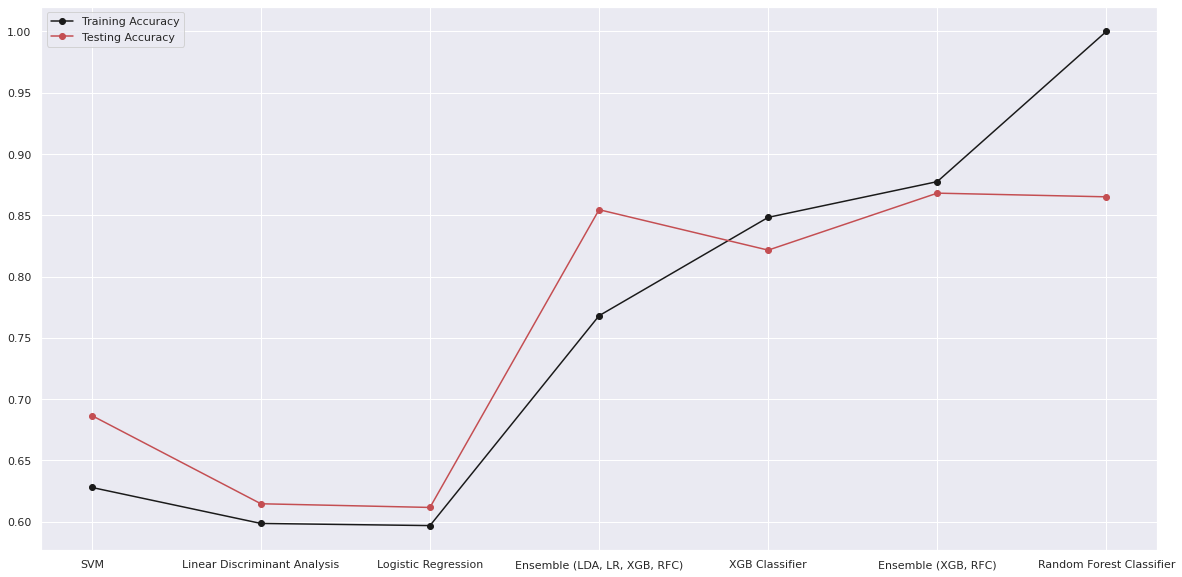

In [431]:
plt.figure(figsize=(20,10))
plt.plot(acc_DF['Model'], acc_DF['Train Accuracy'],'ko-',label='Training Accuracy')
plt.plot(acc_DF['Model'], acc_DF['Test Accuracy'],'ro-',label='Testing Accuracy')
plt.legend()